In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import matplotlib
import seaborn as sns

In [1]:
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_3.csv

--2025-03-13 11:15:25--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.189.207, 142.250.125.207, 173.194.206.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.189.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14174600 (14M) [application/octet-stream]
Saving to: ‘data/full_dataset/goemotions_1.csv’

goemotions_1.csv    100%[===================>]  13.52M  75.4MB/s    in 0.2s    

2025-03-13 11:15:25 (75.4 MB/s) - ‘data/full_dataset/goemotions_1.csv’ saved [14174600/14174600]

--2025-03-13 11:15:26--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.189.207, 142.250.125.207, 173.194.206.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.189.207|:443... connected.
HTTP request sent, awaiti

In [3]:
goemotions_1 = pd.read_csv('data/full_dataset/goemotions_1.csv')
goemotions_2 = pd.read_csv('data/full_dataset/goemotions_2.csv')
goemotions_3 = pd.read_csv('data/full_dataset/goemotions_3.csv')

combined_df = pd.concat([goemotions_1, goemotions_2, goemotions_3], ignore_index=True)
emotion_columns = combined_df.columns[9:]

combined_df['created_utc'] = pd.to_datetime(combined_df['created_utc'], unit='s', errors='coerce')
combined_df.to_csv('data/full_dataset/goemotions_combined.csv', index=False)

# 📌 DataAnalysis - Summary

## 🔹 1. Initialization (`__init__` method)
- 📥 **Loads** a dataset into a Pandas DataFrame.
- 🎭 **Identifies** emotion-related columns (assumed to start from index **9**).

---

## 🔹 2. Data Exploration Functions

### 📌 **Get Columns**
- 🔍 `get_columns()`  
  - Returns a **list of all column names** in the dataset.

### 🏷 **General Data Summary**
- 📌 `summary()`  
  - Displays a **general overview** of the dataset.
  - Prints **data types**, **non-null counts**, and **memory usage**.

### ❓ **Missing Values Check**
- 📌 `missing_values()`  
  - Identifies columns with **missing values**.
  - Displays **count of missing values per column**.

### 🔢 **Unique Values Count**
- 📌 `unique_values()`  
  - Counts the **number of unique values** in each column.

### 🎭 **Emotion Counts**
- 📌 `emotion_counts()`  
  - Computes **total occurrences** for each emotion.

---

## 🔹 3. Unimplemented Visualization Functions (Commented Out)
🚀 **(Potential Future Features)**:
- 📊 **Histograms for numeric columns**  
- 🎨 **Correlation heatmap between numeric features**

---

## 🔹 4. Main Execution (`__main__`)
- 📥 Loads dataset (`goemotions_combined.csv`).
- 🛠 **Performs multiple analyses**:
  - ✔️ **Column list extraction**
  - ✔️ **Summary statistics**
  - ✔️ **Missing values check**
  - ✔️ **Unique values analysis**
  - ✔️ **Emotion count computation**

---

### 🏆 **Key Takeaways**
✅ **Provides a structured overview** of the dataset.  
✅ **Identifies missing values & unique entries**.  
✅ **Counts occurrences of emotions** in the dataset.  
✅ **Flexible for future enhancements** (visualizations, correlations, etc.).


['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']
General summary of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211225 entries, 0 to 211224
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   text                  211225 non-null  object        
 1   id                    211225 non-null  object        
 2   author                211225 non-null  object        
 3   subreddit             211225 non-null  object        
 4   link_id               211225 non-null  object        
 

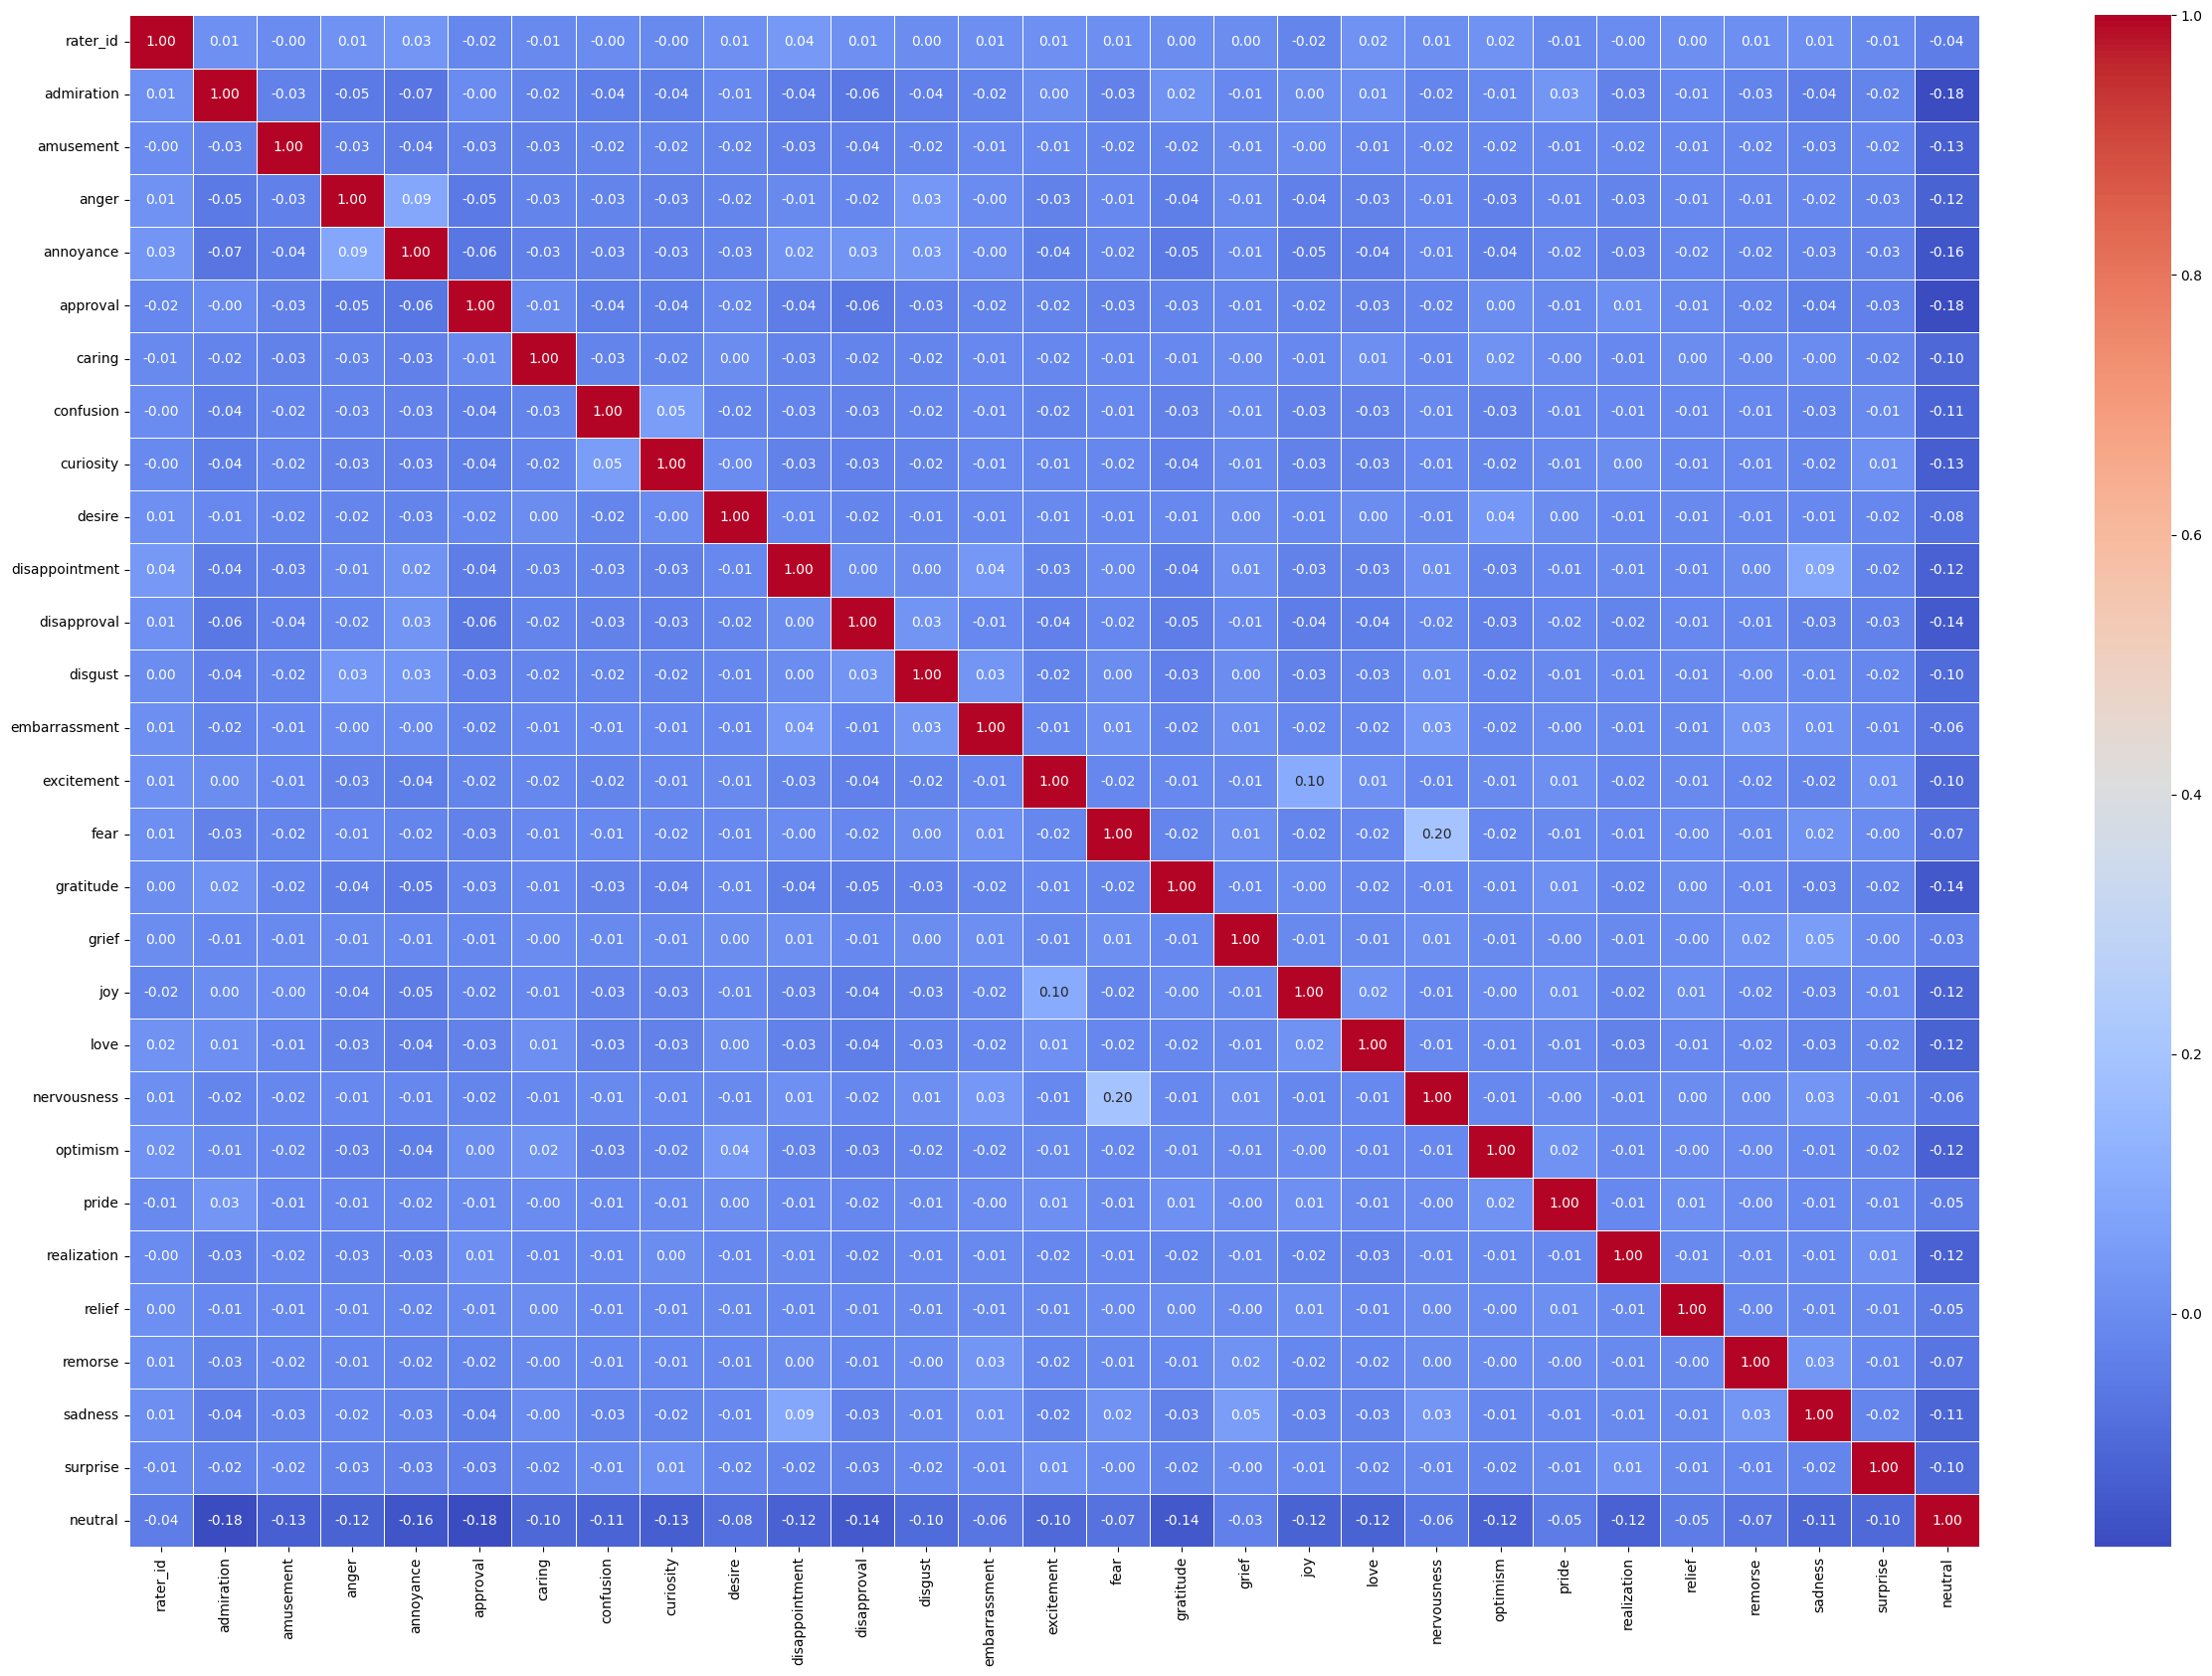

In [19]:
class DataAnalysis:
    def __init__(self, dataframe):
        # Initialize with the given dataframe
        self.df = dataframe
        self.emotion_columns =dataframe.columns[9:]

    def get_columns(self):
        return list(self.df.columns)
    # Display a general summary of the data
    def summary(self):
        print("General summary of the data:")
        print(self.df.info())

    # Display information about missing values in the dataframe
    def missing_values(self):
        missing_data = self.df.isnull().sum()
        missing_data = missing_data[missing_data > 0]
        if not missing_data.empty:
            print("\nMissing values in the following columns:")
            print(missing_data)
        else:
            print("\nNo missing values found.")

    def unique_values(self):
        # Count unique values for each column
        unique_counts = self.df.nunique()

        # Print the unique counts
        print("\nUnique counts for each column:")
        print(unique_counts)

    def emotion_counts(self):
        # Sum the values in the emotion columns
        emotion_counts = self.df[self.emotion_columns].sum()

        # Print the emotion counts
        print("\nEmotion counts for each emotion category:")
        print(emotion_counts)
    # Plot histograms for all numeric columns in the dataframe
    # def plot_histograms(self):
    #     # Select numeric columns
    #     numeric_columns = self.df.select_dtypes(include=['float64', 'int64']).columns
    #     print("\nHistograms for numeric columns:")
    #     # Plot histograms
    #     self.df[numeric_columns].hist(figsize=(10, 8), bins=30)
    #     plt.show()
    # #
    # # # Compute and display a correlation heatmap for the numeric columns
    # def correlation_heatmap(self):
    #     # Calculate correlation matrix
    #     correlation_matrix = self.df.corr()
    #     print("\nCorrelation between columns:")
    #     # Display heatmap
    #     sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    #     plt.show()


    def plot_correlation_heatmap(self, figsize=(30, 20), cmap='coolwarm'):
        """
        Computes and displays a correlation heatmap for numeric columns in the DataFrame.

        Parameters:
        - figsize (tuple): Size of the heatmap figure.
        - cmap (str): Colormap for the heatmap.
        """
        numeric_columns = self.df.select_dtypes(include=['float64', 'int64']).columns
        if numeric_columns.empty:
            print("No numeric columns for correlation heatmap.")
            return

        correlation_matrix = self.df[numeric_columns].corr()
        if correlation_matrix.isnull().all().all():
            print("Not enough data to compute correlations.")
            return

        print("\nCorrelation between numeric columns:")
        plt.figure(figsize=figsize)
        sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt='.2f', linewidths=0.5)
        plt.show()


# Example usage:
if __name__ == '__main__':
    # Read the combined dataset (assuming you have already downloaded it)


    # Create an instance of DataAnalysis and perform various analyses

    analysis = DataAnalysis(combined_df)
    print(analysis.get_columns())
    analysis.summary()  # Display summary statistics
    analysis.missing_values()  # Check for missing values
    analysis.unique_values()
    analysis.emotion_counts()
    analysis.plot_correlation_heatmap()

# 📌 EmotionAnalysis - Summary

## 🔹 1. Initialization (`__init__` method)
- 📥 **Loads** a dataset into a Pandas DataFrame.
- 🎭 **Identifies** emotion-related columns (assumed to start from index 9).

---

## 🔹 2. Emotion Analysis Functions

### 🔍 **Single Emotion Analysis**
- 📌 `get_ids_with_emotion(emotion_column, emotion_value=1)`  
  - Retrieves all **IDs** associated with a specific emotion (default = **1**).
  - Returns a **DataFrame** containing IDs and their emotion counts.

### 🎭 **Multi-Emotion Analysis**
- 📌 `get_ids_with_multiple_emotions()`  
  - Identifies **IDs** with more than one emotion.
  - Returns a **DataFrame** containing emotion counts per ID.

### 🎭 **Unique Emotion-ID Dictionary**
- 📌 `get_emotion_id_dict_for_unique()`  
  - Generates a **dictionary** mapping emotions to **IDs that appear only once** in the dataset.

---

## 🔹 3. Emotion Distribution & Correlation

### 📊 **Emotion Distribution for a User**
- 📌 `emotion_distribution_for_id(user_id)`  
  - Calculates **total emotion counts** for a specific **user ID**.
  - Returns a **Series** with emotion names as keys.

### 📈 **Emotion Correlation Matrix**
- 📌 `emotion_correlations()`  
  - Computes and **visualizes** correlations between emotions.
  - **Heatmap visualization** using `seaborn`.

---

## 🔹 4. Main Function (`main()`)
- 📥 Loads dataset (`goemotions_combined.csv`).
- 📊 Runs various **analysis functions**:
  - **Emotion distribution** per user.
  - **IDs with multiple emotions**.
  - **Correlation matrix of emotions**.

---

### 🏆 **Key Takeaways**
✅ **Efficiently processes** user emotion data.  
✅ **Supports multi-emotion** and **single-emotion** analysis.  
✅ **Provides strong visualization tools** for correlations.  
✅ **Enhances understanding** of user-emotion relationships.

IDs with Joy Emotion:            id  joy_count
0     eczb527          1
1     eczbdg4          3
2     eczbh7y          3
3     eczbjn8          1
4     eczbp9a          3
...       ...        ...
5713  efhb6jd          1
5714  efhbpqg          2
5715  efhcat1          2
5716  efhcbr7          1
5717  efhccs1          1

[5718 rows x 2 columns]
Multiple Emotions Count:          admiration  amusement  anger  annoyance  approval  caring  confusion  \
id                                                                              
eczb6r7           0          0      0          0         1       0          0   
eczb770           0          0      0          0         0       0          0   
eczbbmd           0          0      0          0         0       0          0   
eczbbwt           0          2      0          1         0       0          0   
eczbdg4           0          0      0          0         0       3          0   
...             ...        ...    ...        ...       ...   

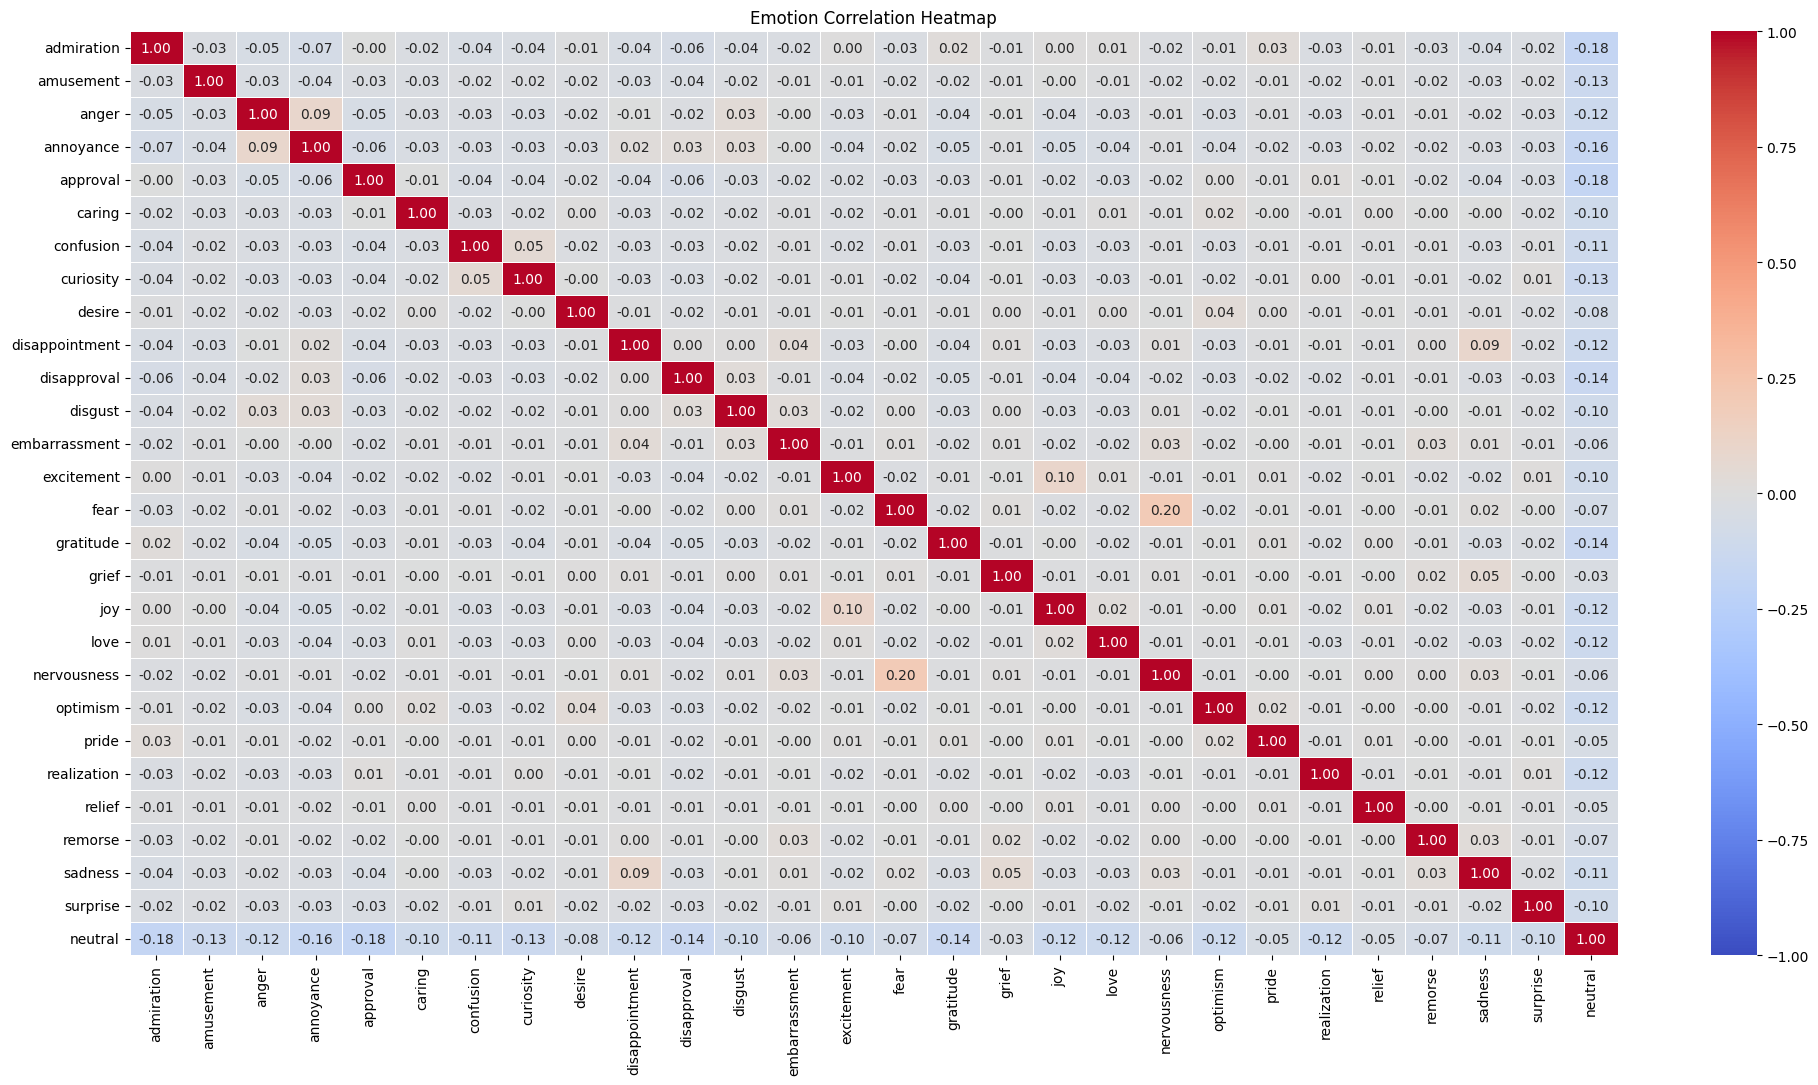

Emotion Correlation Matrix:                 admiration  amusement     anger  annoyance  approval  \
admiration        1.000000  -0.031093 -0.053570  -0.066833 -0.003953   
amusement        -0.031093   1.000000 -0.034839  -0.041558 -0.029560   
anger            -0.053570  -0.034839  1.000000   0.087398 -0.050632   
annoyance        -0.066833  -0.041558  0.087398   1.000000 -0.061976   
approval         -0.003953  -0.029560 -0.050632  -0.061976  1.000000   
caring           -0.024798  -0.028777 -0.026679  -0.033510 -0.006022   
confusion        -0.041124  -0.023232 -0.027001  -0.031900 -0.039390   
curiosity        -0.038462  -0.022696 -0.031481  -0.032509 -0.038827   
desire           -0.011401  -0.018774 -0.020949  -0.026640 -0.016247   
disappointment   -0.044983  -0.032991 -0.005676   0.020438 -0.043678   
disapproval      -0.059461  -0.036731 -0.018244   0.025779 -0.061236   
disgust          -0.036801  -0.022786  0.032676   0.031702 -0.033626   
embarrassment    -0.023494  -0.01190

In [12]:
class EmotionAnalysis:
    def __init__(self, combined_df):
        """
        Initializes the EmotionAnalysis class with the given DataFrame.

        Parameters:
        combined_df (DataFrame): The DataFrame containing the data.
        """
        self.combined_df = combined_df

        # Identify columns that represent emotions (assuming they start with 'id')
        self.emotion_columns = combined_df.columns[9:]

    def get_ids_with_emotion(self, emotion_column, emotion_value=1):
        """
        Returns all 'id's that have a certain emotion value (default is 1) in the given emotion column.

        Parameters:
        emotion_column (str): The emotion column to check.
        emotion_value (int): The value of the emotion to filter by (default is 1 for present emotion).

        Returns:
        DataFrame: A DataFrame with ids and their corresponding emotion counts.
        """
        filtered_df = self.combined_df[self.combined_df[emotion_column] == emotion_value]

        emotion_count_df = filtered_df.groupby('id').size().reset_index(name=f'{emotion_column}_count')

        return emotion_count_df

    def get_ids_with_multiple_emotions(self):
        """
        Returns a dataframe with the ids that have multiple emotions.

        Returns:
        DataFrame: A DataFrame with ids and their multiple emotions.
        """
        emotion_data = self.combined_df[['id'] + list(self.emotion_columns)]
        emotion_data = emotion_data.copy()
        # Calculate the sum of emotions for each id
        emotion_data.loc[:, 'emotion_count'] = emotion_data[self.emotion_columns].sum(axis=1)


        # Filter ids with more than one emotion
        multiple_emotion_data = emotion_data[emotion_data['emotion_count'] > 1]

        emotion_counts = multiple_emotion_data.groupby('id')[self.emotion_columns].sum()

        return emotion_counts

    def get_emotion_id_dict_for_unique(self):
        """
        Generates a dictionary where each emotion is a key, and the value is a list of ids
        that appear only once in the dataset and are associated with that emotion.

        Returns:
        dict: A dictionary with emotions as keys and lists of ids as values.
        """
        id_counts = self.combined_df['id'].value_counts()

        # Filter for ids that appear only once
        unique_id_data = self.combined_df[self.combined_df['id'].isin(id_counts[id_counts == 1].index)]

        emotion_id_dict = {emotion: [] for emotion in self.emotion_columns}

        for idx, row in unique_id_data.iterrows():
            for emotion in self.emotion_columns:
                if row[emotion] == 1:
                    emotion_id_dict[emotion].append(row['id'])

        return emotion_id_dict

    def emotion_distribution_for_id(self, user_id):
        """
        Calculates the emotion distribution for a given user ID.

        Parameters:
        user_id (str): The id of the user to get the emotion distribution for.

        Returns:
        Series: The sum of each emotion for that user id, or a message if the id is not found.
        """
        user_data = self.combined_df[self.combined_df['id'] == user_id]

        if user_data.empty:
            return f"ID {user_id} not found in the dataset."

        emotion_distribution = user_data[self.emotion_columns].sum(axis=0)

        return emotion_distribution

    def emotion_correlations(self):
        """
        Calculates and returns the correlation between emotion columns and visualizes it.

        Returns:
        DataFrame: The correlation matrix of the emotions.
        """
        # Compute the correlation matrix
        correlation_matrix = self.combined_df[self.emotion_columns].corr()

        import seaborn as sns
        import matplotlib.pyplot as plt

        # Create a heatmap for the correlation matrix
        plt.figure(figsize=(24, 12))  # Adjust size as needed
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
        plt.title('Emotion Correlation Heatmap')
        plt.show()

        return correlation_matrix

def main():
    # Load your DataFrame (replace this with your actual DataFrame loading method)
    data_path = 'data/full_dataset/goemotions_combined.csv'
    df = pd.read_csv(data_path)

    # Create an instance of the EmotionAnalysis class
    emotion_analysis = EmotionAnalysis(df)

    # Example: Get IDs with a certain emotion
    ids_with_joy = emotion_analysis.get_ids_with_emotion('joy')
    print("IDs with Joy Emotion:", ids_with_joy)

    # Example: Get IDs with multiple emotions
    multiple_emotions_count = emotion_analysis.get_ids_with_multiple_emotions()
    print("Multiple Emotions Count:", multiple_emotions_count)

    # # Example: Get the emotion dictionary for unique IDs
    emotion_id_dict = emotion_analysis.get_emotion_id_dict_for_unique()
    print("Emotion ID Dictionary:", emotion_id_dict)

    # # Example: Get emotion distribution for a specific user ID
    user_id = 'eczbdg4'
    emotion_distribution = emotion_analysis.emotion_distribution_for_id(user_id)
    print(f"Emotion Distribution for ID {user_id}:", emotion_distribution)
    #
    # # Example: Get the emotion correlations
    correlation_matrix = emotion_analysis.emotion_correlations()
    print("Emotion Correlation Matrix:", correlation_matrix)


# Run the main function if this script is executed
if __name__ == "__main__":
    main()

# 📌 rater_id_EmotionAnalysis - Summary

## 🔹 1. Initialization (`__init__` method)
- 📥 **Loads** a dataset into a Pandas DataFrame.
- 🕒 Converts `created_utc` column into **datetime format**.
- 🎭 **Identifies** emotion-related columns (starting from index **9**).
- 📊 Computes **summary statistics** of emotions annotated by each rater:
  - Total annotations per rater.
  - Number of unique emotions rated.

---

## 🔹 2. Rater Contribution Analysis

### 📌 **Summarizing Rater Contributions**
- 📌 `summarize_rater_contributions()`  
  - Computes **number of annotations per rater**.
  - Returns **distribution of ratings per user**.

---

## 🔹 3. Rater Visualization Functions 📊

### 📈 **Annotations Over Time**
- 📌 `_analyze_annotations_over_time(rater_data, rater_id)`  
  - **Plots number of annotations over time** for a specific rater.

### 🎭 **Rater Emotion Diversity**
- 📌 `visualize_rater_diversity()`  
  - **Bar chart** of the **number of unique emotions** annotated by each rater.

### 📊 **Total Annotations per Rater**
- 📌 `visualize_rater_totals()`  
  - **Bar chart** of the **total number of annotations** for each rater.

---

## 🔹 4. Detailed Rater Analysis

### 🔍 **Analyze Specific Rater**
- 📌 `analyze_specific_rater(rater_id)`  
  - **Filters** dataset for a **specific rater**.
  - Computes:
    - 🎭 **Total emotion counts** rated by the rater.
    - 🔝 **Top 5 emotions** annotated by the rater.
    - 🔢 **Number of unique emotions** annotated.
  - 📈 **Plots**:
    - **Emotion distribution over time**.
    - **Bar chart of total emotion counts**.
    - **Bar chart of top 5 emotions**.

---

## 🔹 5. Main Execution (`main()`)
- 📥 Loads dataset (`goemotions_combined.csv`).
- 🛠 **Performs multiple analyses**:
  - ✔️ **Summarizes rater contributions**.
  - ✔️ **Visualizes emotion diversity & total annotations**.
  - ✔️ **Analyzes a specific rater (e.g., `rater_id=61`)**.

---

### 🏆 **Key Takeaways**
✅ **Provides structured insights** into raters' annotation behavior.  
✅ **Includes detailed per-rater analysis** with plots.  
✅ **Visualizes patterns in annotations over time**.  
✅ **Flexible for deeper analysis** on rating trends.

Number of annotations per rater:
rater_id
4     10508
61     9930
37     9161
2      5778
52     5397
      ...  
53       81
45       72
0        49
47        7
68        1
Name: count, Length: 82, dtype: int64


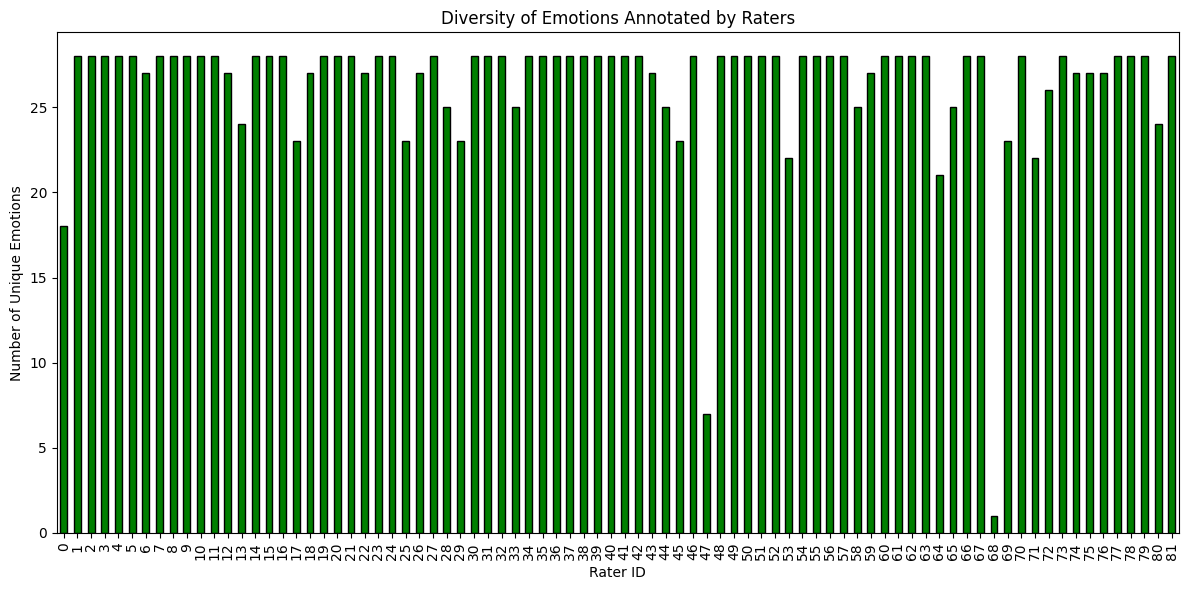

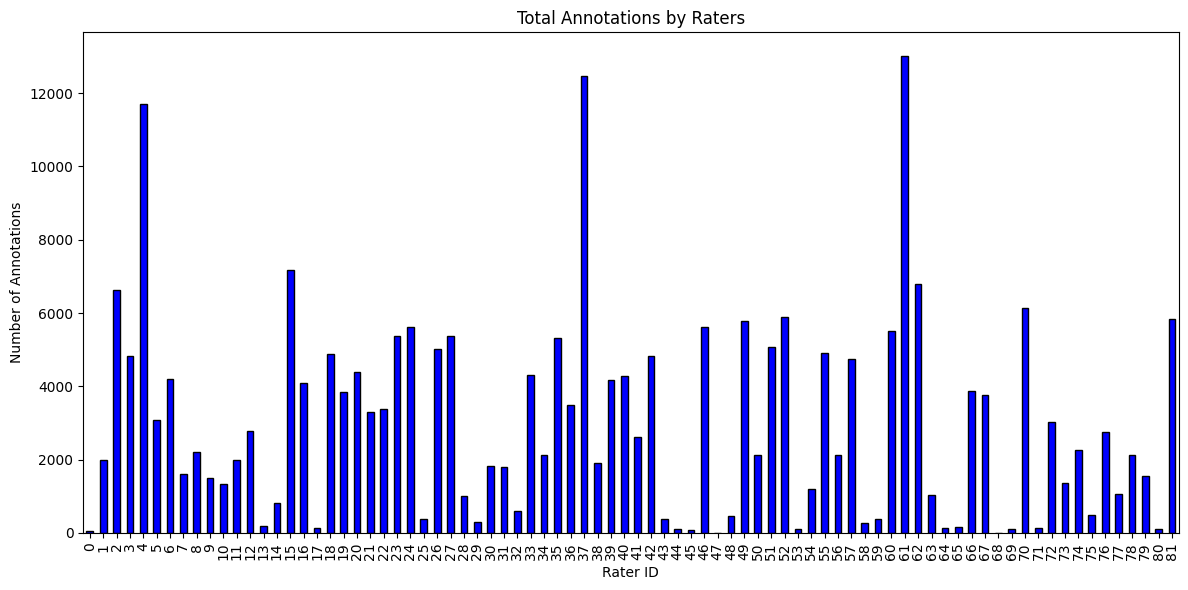


Total emotion counts for rater ID '61':
admiration         931
amusement          548
anger              347
annoyance          818
approval          1229
caring             392
confusion          304
curiosity          793
desire             225
disappointment     309
disapproval        444
disgust            318
embarrassment       74
excitement         344
fear                86
gratitude          520
grief               18
joy                317
love               449
nervousness         78
optimism          1060
pride               26
realization       1197
relief              53
remorse             38
sadness            397
surprise           210
neutral           1485
dtype: int64

Top 5 emotions for rater ID '61':
neutral        1485
approval       1229
realization    1197
optimism       1060
admiration      931
dtype: int64

Rater ID '61' has rated 28 unique emotions.


<ipython-input-22-95a3049dfd66>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rater_data['created_date'] = rater_data['created_utc'].dt.date


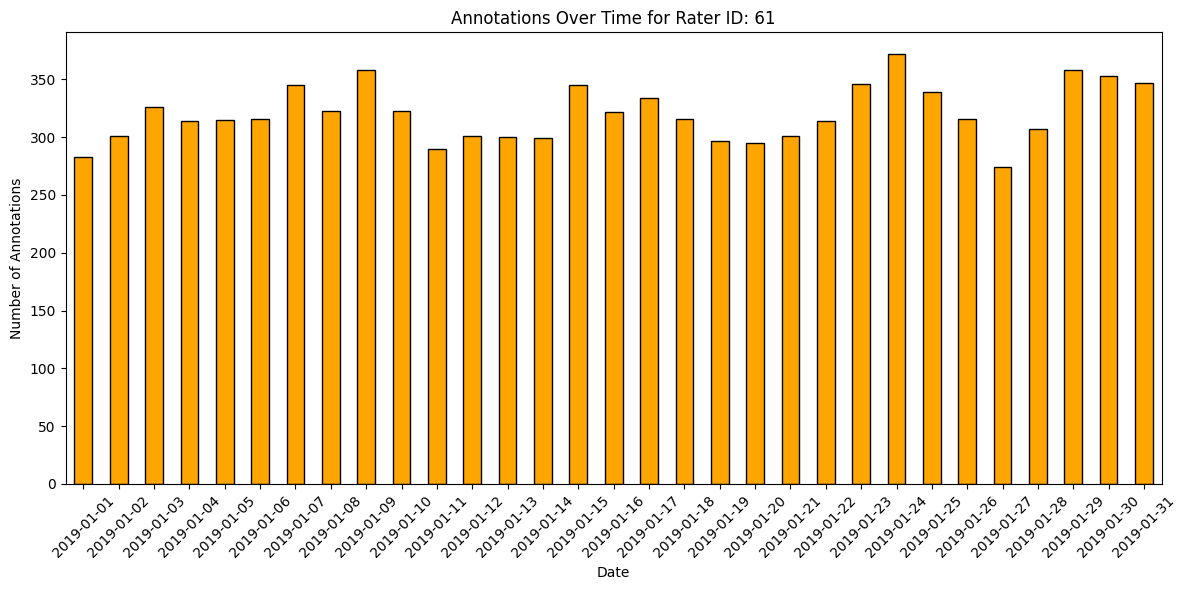

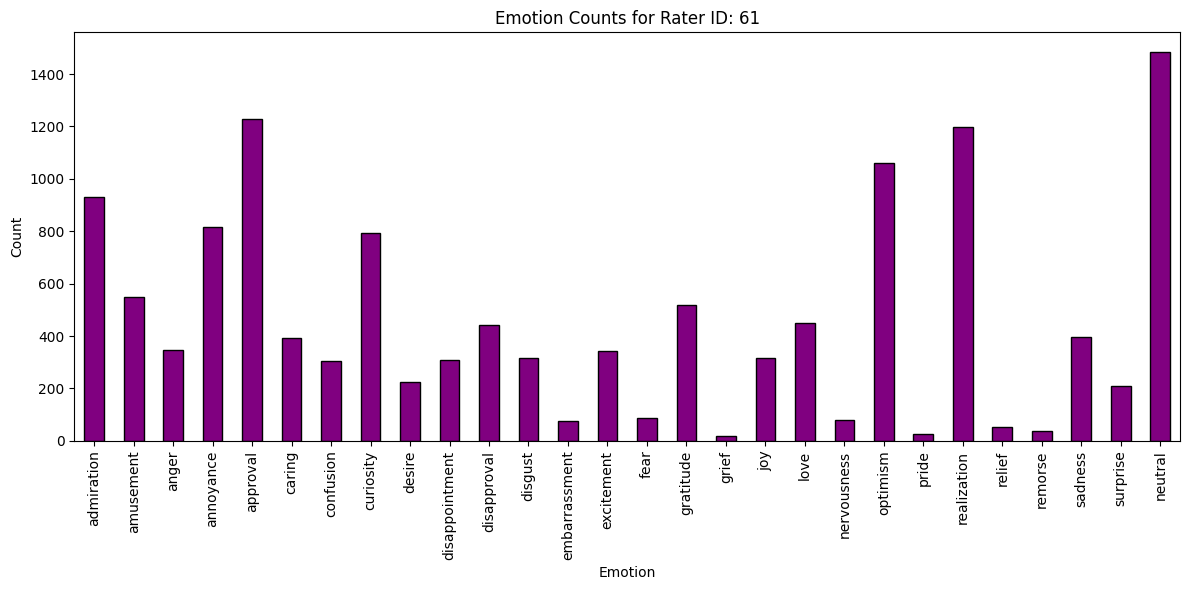

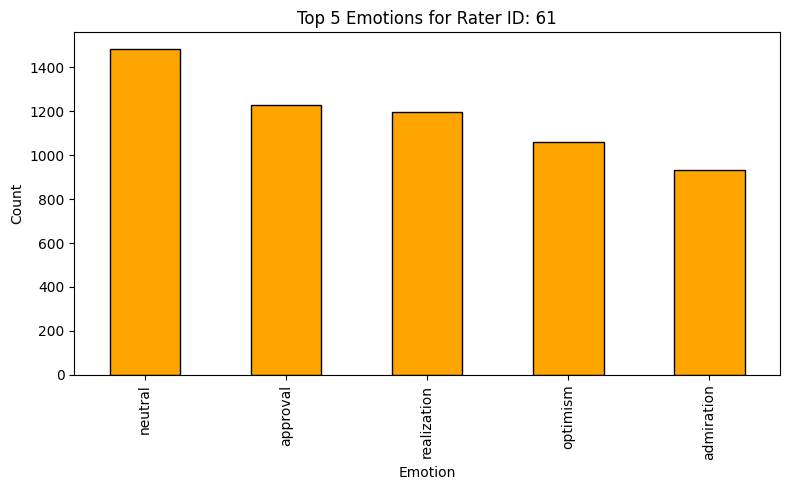

In [22]:
class rater_id_EmotionAnalysis:
    def __init__(self, combined_df):
        """
        Initialize the analysis class for rater_id-related statistics.

        Args:
            combined_df (pd.DataFrame): The dataset to analyze.
        """
        self.combined_df = combined_df
        self.combined_df['created_utc'] = pd.to_datetime(self.combined_df['created_utc'], errors='coerce')
        self.emotion_columns = combined_df.columns[9:]
        self.rater_summary = self._calculate_rater_summary()

    def _calculate_rater_summary(self):
        """
        Summarize the emotions annotated by each rater.

        Returns:
            pd.DataFrame: Summary of total emotions annotated by each rater.
        """
        rater_summary = self.combined_df.groupby('rater_id')[self.emotion_columns].sum()
        rater_summary['total_annotations'] = rater_summary.sum(axis=1)
        rater_summary['unique_emotions'] = (rater_summary[self.emotion_columns] > 0).sum(axis=1)
        return rater_summary

    def summarize_rater_contributions(self):
        """
        Display and return the number of annotations per rater.
        """
        rater_counts = self.combined_df['rater_id'].value_counts()
        print("Number of annotations per rater:")
        print(rater_counts)
        return rater_counts


    def _analyze_annotations_over_time(self, rater_data, rater_id):
        """
        Analyze and plot the rater's annotations over time.

        Args:
            rater_data (pd.DataFrame): Filtered data for the specific rater.
            rater_id (str): The rater's ID.
        """
        rater_data['created_date'] = rater_data['created_utc'].dt.date
        comments_by_date = rater_data['created_date'].value_counts().sort_index()

        # Plot annotations over time
        plt.figure(figsize=(12, 6))
        comments_by_date.plot(kind='bar', color='orange', edgecolor='black')
        plt.title(f"Annotations Over Time for Rater ID: {rater_id}")
        plt.xlabel("Date")
        plt.ylabel("Number of Annotations")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def visualize_rater_diversity(self):
        """
        Visualize the diversity of emotions annotated by raters.
        """
        plt.figure(figsize=(12, 6))
        self.rater_summary['unique_emotions'].plot(kind='bar', color='green', edgecolor='black')
        plt.title("Diversity of Emotions Annotated by Raters")
        plt.xlabel("Rater ID")
        plt.ylabel("Number of Unique Emotions")
        plt.tight_layout()
        plt.show()

    def visualize_rater_totals(self):
        """
        Visualize the total number of annotations by each rater.
        """
        plt.figure(figsize=(12, 6))
        self.rater_summary['total_annotations'].plot(kind='bar', color='blue', edgecolor='black')
        plt.title("Total Annotations by Raters")
        plt.xlabel("Rater ID")
        plt.ylabel("Number of Annotations")
        plt.tight_layout()
        plt.show()


    def analyze_specific_rater(self, rater_id):
        """
        Perform a detailed analysis for a specific rater.

        Args:
            rater_id (str): The ID of the rater to analyze.

        Returns:
            None. Displays detailed analysis results and plots.
        """
        # Filter data for the specified rater
        rater_data = self.combined_df[self.combined_df['rater_id'] == rater_id]
        if rater_data.empty:
            print(f"No data found for rater ID: {rater_id}")
            return

        # Calculate the total emotion counts rated by the rater
        total_emotions = rater_data[self.emotion_columns].sum()
        print(f"\nTotal emotion counts for rater ID '{rater_id}':")
        print(total_emotions)

        # Identify the top 5 emotions rated by the rater
        top_emotions = total_emotions.sort_values(ascending=False).head(5)
        print(f"\nTop 5 emotions for rater ID '{rater_id}':")
        print(top_emotions)

        # Count the number of unique emotions rated at least once
        unique_emotions_count = (total_emotions > 0).sum()
        print(f"\nRater ID '{rater_id}' has rated {unique_emotions_count} unique emotions.")

        # Analyze the rater's activity over time
        self._analyze_annotations_over_time(rater_data, rater_id)

        # Visualize the total emotion counts as a bar chart
        plt.figure(figsize=(12, 6))
        total_emotions.plot(kind='bar', color='purple', edgecolor='black')
        plt.title(f"Emotion Counts for Rater ID: {rater_id}")
        plt.xlabel("Emotion")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

        # Visualize the top 5 emotions as a bar chart
        plt.figure(figsize=(8, 5))
        top_emotions.plot(kind='bar', color='orange', edgecolor='black')
        plt.title(f"Top 5 Emotions for Rater ID: {rater_id}")
        plt.xlabel("Emotion")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()


# Main Function
def main():
    # Load the dataset (adjust file path)


    # Initialize class
    analysis = rater_id_EmotionAnalysis(combined_df)

    # Summarize contributions
    analysis.summarize_rater_contributions()

    # Analyze specific rater

    # # Visualize diversity and totals
    analysis.visualize_rater_diversity()
    analysis.visualize_rater_totals()
    analysis.analyze_specific_rater(rater_id=61)


if __name__ == "__main__":
    main()

# 📌 EmotionAnalysisTime - Summary

## 🔹 1. Initialization (`__init__` method)
- 📥 **Loads** a dataset into a Pandas DataFrame.
- 🕒 **Converts** `created_utc` to **datetime format**.
- 📆 **Extracts**:
  - `day_of_week` (0 = Sunday, 6 = Saturday).
  - `hour_of_day` (0-23).
  - `day_of_month` (1-31).

---

## 🔹 2. Time-Based Emotion Analysis

### ⏰ **Categorization by Time of Day**
- 📌 `add_time_of_day_column()`  
  - Adds a `time_of_day` column (`Morning`, `Afternoon`, `Evening`, `Night`).
- 📌 `categorize_time_of_day(hour)`  
  - Categorizes an hour into **one of four time slots**.

---

## 🔹 3. Emotion Analysis Functions

### 🎭 **Analyze Specific Emotions**
- 📌 `analyze_specific_emotions(emotion_columns)`  
  - Loops through a **list of emotions** and **analyzes** them over time.
  - Checks if the emotion exists in the dataset before analysis.

### 📊 **Analyze All Emotions Together**
- 📌 `analyze_all_emotions()`  
  - **Identifies numeric emotion columns** and computes the **total emotion sum per row**.
  - **Plots emotion trends**:
    - **By time of day** (Morning, Afternoon, Evening, Night).
    - **By day of the week**.
    - **By day of the month**.

### 📈 **Analyze a Single Emotion Over Time**
- 📌 `analyze_emotion_over_time(emotion_column)`  
  - **Filters dataset** for a single emotion.
  - **Generates visualizations**:
    - 📊 **Time of day distribution**.
    - 📆 **Day of the week analysis**.
    - 🗓 **Day of the month analysis**.

---

## 🔹 4. Main Execution (`main()`)
- 📥 Loads dataset (`goemotions_combined.csv`).
- 🛠 **Performs multiple analyses**:
  - ✔️ **Analyzes all emotions collectively**.
  - ✔️ **Analyzes specific emotions (`love`, `joy`) over time**.

---

### 🏆 **Key Takeaways**
✅ **Categorizes time-based trends** in emotion annotations.  
✅ **Analyzes both individual and collective emotions** over time.  
✅ **Provides insightful visualizations** for better pattern recognition.  
✅ **Useful for understanding behavioral trends** in emotion tagging.


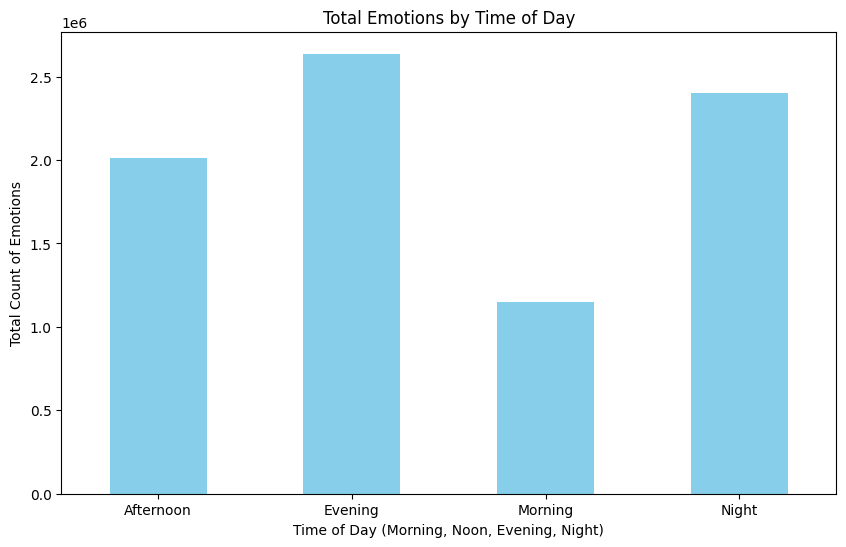

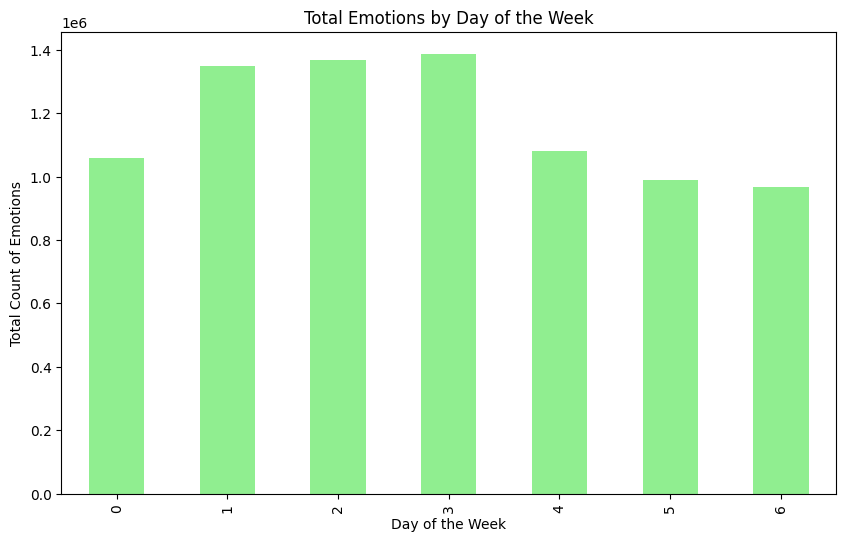

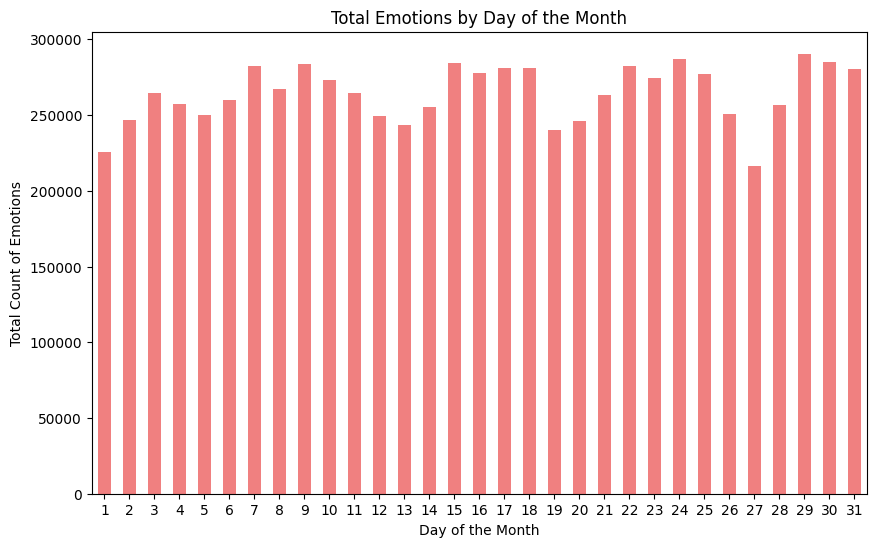

Analysis of all emotions collectively has been completed.
Analyzing emotion: love


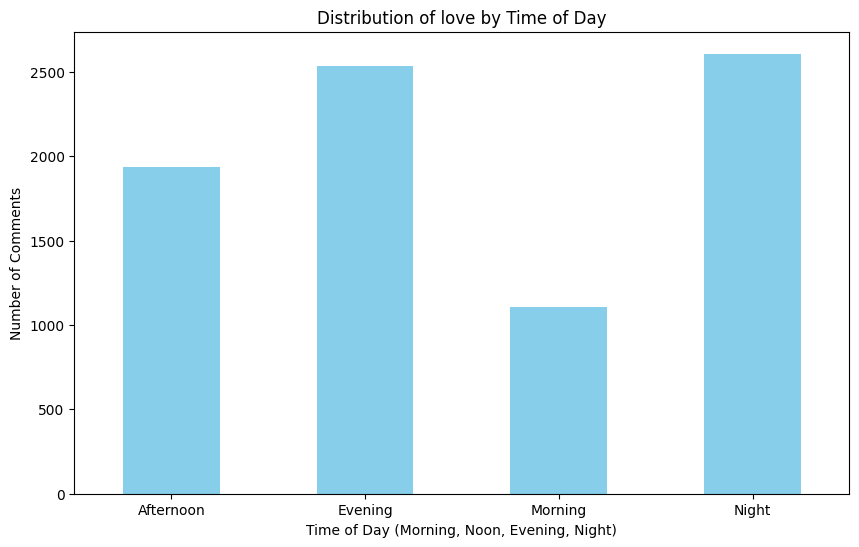

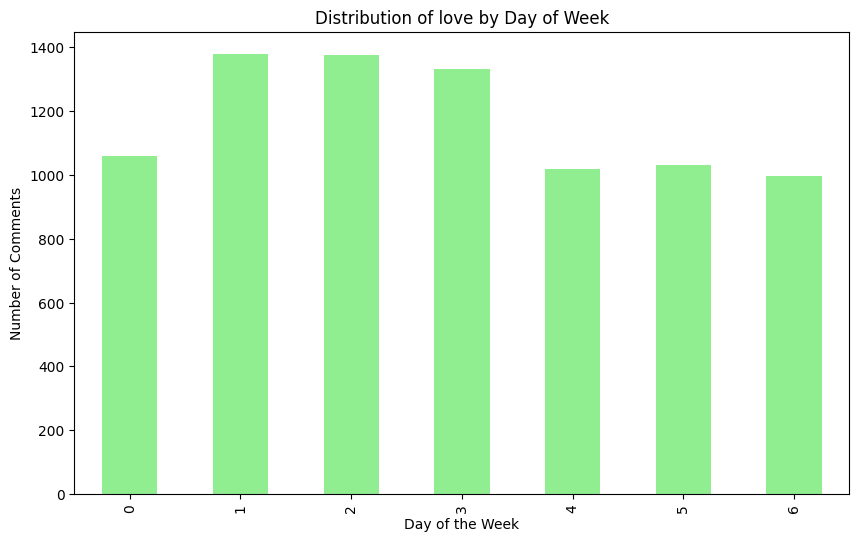

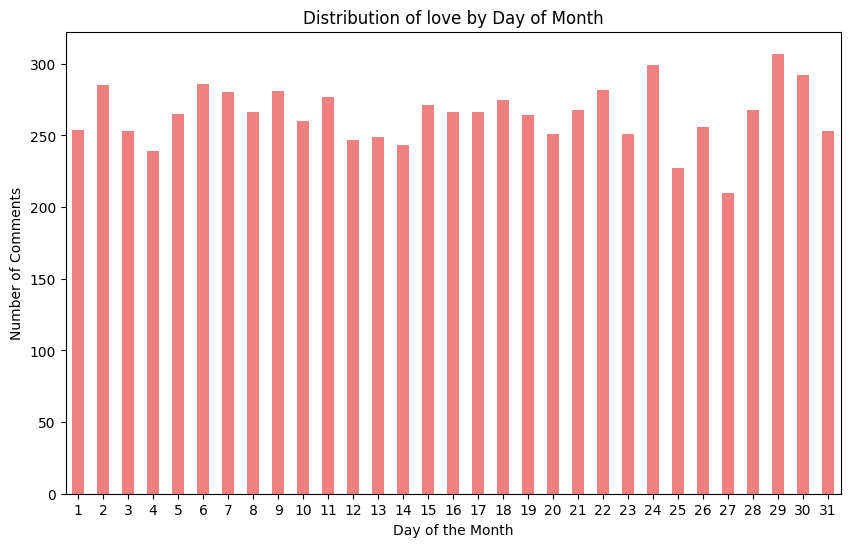

Analyzing emotion: joy


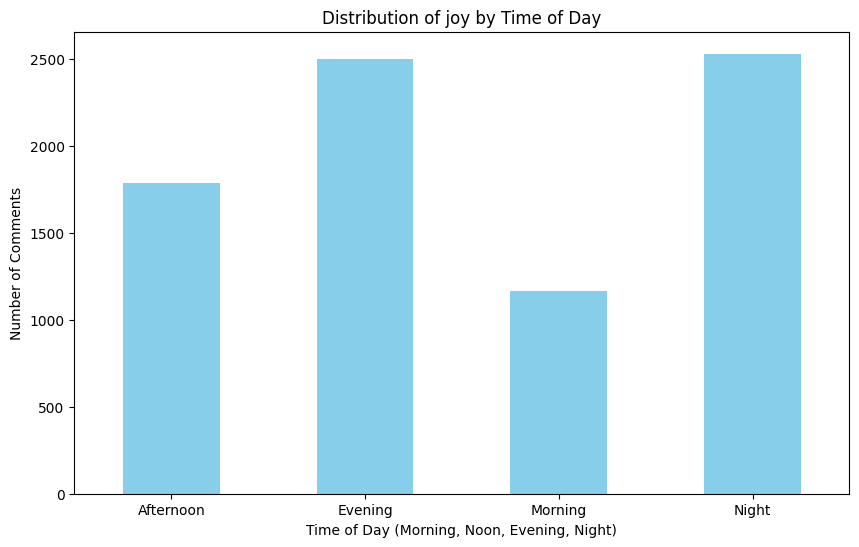

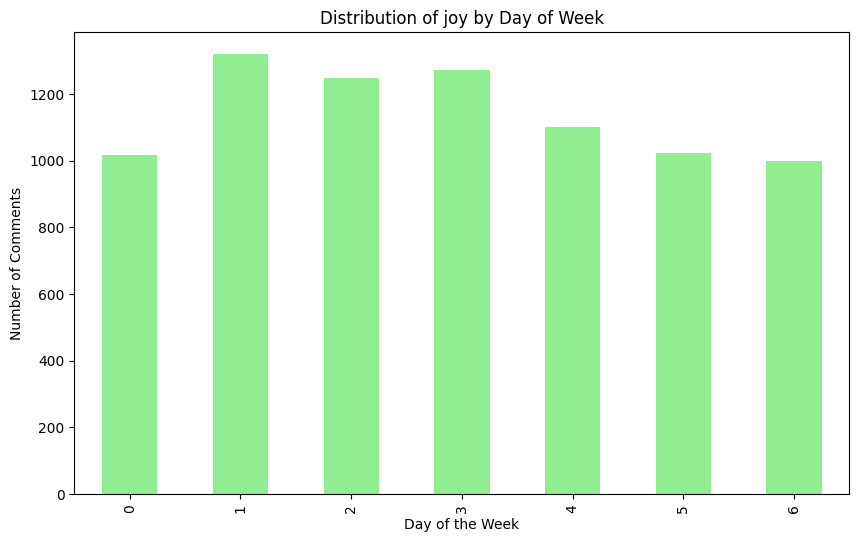

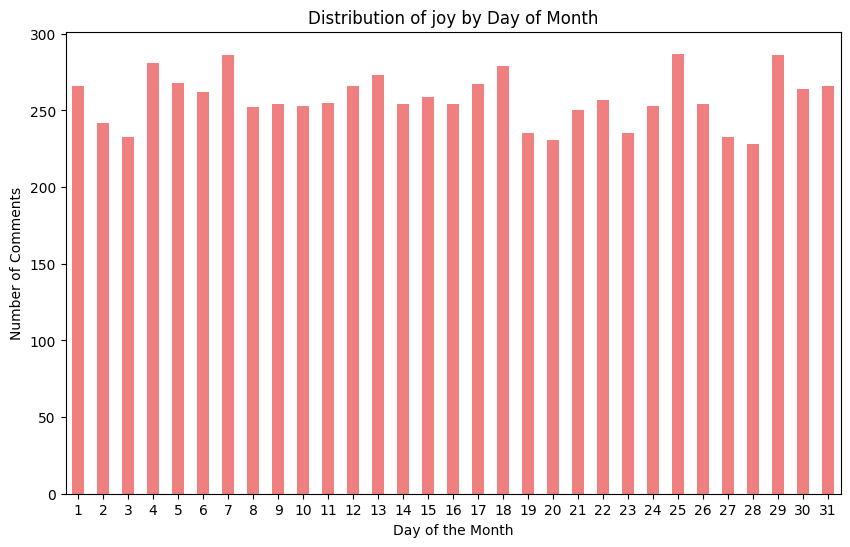

In [23]:
class EmotionAnalysisTime:
    def __init__(self, combined_df):
        """
        Initialize the class with the provided data.
        """
        self.combined_df = combined_df

        # Convert 'created_utc' column to datetime format (if not already in datetime format)
        self.combined_df['created_utc'] = pd.to_datetime(self.combined_df['created_utc'], errors='coerce')

        # Extract day of the week (0 = Sunday, 6 = Saturday)
        self.combined_df.loc[:, 'day_of_week'] = self.combined_df['created_utc'].dt.dayofweek

        # Extract hour of the day (0-23)
        self.combined_df.loc[:, 'hour_of_day'] = self.combined_df['created_utc'].dt.hour

        # Extract day of the month
        self.combined_df.loc[:, 'day_of_month'] = self.combined_df['created_utc'].dt.day

    def add_time_of_day_column(self):
        """
        Add a 'time_of_day' column to the DataFrame based on the 'hour_of_day' column.
        """
        self.combined_df.loc[:, 'time_of_day'] = self.combined_df['hour_of_day'].apply(self.categorize_time_of_day)

    def categorize_time_of_day(self, hour):
        """
        Categorize the time of day based on the hour of the day.
        """
        if 6 <= hour < 12:
            return 'Morning'
        elif 12 <= hour < 18:
            return 'Afternoon'
        elif 18 <= hour < 24:
            return 'Evening'
        else:
            return 'Night'

    def analyze_specific_emotions(self, emotion_columns):
        """
        Analyze specific emotions provided in a list.
        """
        for emotion in emotion_columns:
            if emotion in self.combined_df.columns:
                print(f"Analyzing emotion: {emotion}")
                self.analyze_emotion_over_time(emotion)
            else:
                print(f"Emotion '{emotion}' not found in the dataset.")

    def analyze_all_emotions(self):
        """
        Analyze all emotions collectively in the DataFrame.
        """
        # Identify emotion columns that are numeric only
        emotion_columns = [
            col for col in self.combined_df.columns
            if col not in ['created_utc', 'author', 'day_of_week', 'hour_of_day', 'day_of_month', 'time_of_day']
               and pd.api.types.is_numeric_dtype(self.combined_df[col])
        ]

        # Validate that emotion_columns are properly filtered
        if not emotion_columns:
            raise ValueError("No numeric emotion columns found in the dataset.")

        # Create a new column for the sum of all emotions in each row
        self.combined_df['total_emotions'] = self.combined_df[emotion_columns].sum(axis=1)

        # Analyze emotions by time of day
        self.combined_df['time_of_day'] = self.combined_df['created_utc'].dt.hour.apply(self.categorize_time_of_day)
        time_of_day_summary = self.combined_df.groupby('time_of_day')['total_emotions'].sum()

        plt.figure(figsize=(10, 6))
        time_of_day_summary.plot(kind='bar', color='skyblue')
        plt.title("Total Emotions by Time of Day")
        plt.xlabel("Time of Day (Morning, Noon, Evening, Night)")
        plt.ylabel("Total Count of Emotions")
        plt.xticks(rotation=0)
        plt.show()

        # Analyze emotions by day of the week
        self.combined_df['day_of_week'] = self.combined_df['created_utc'].dt.dayofweek
        day_of_week_summary = self.combined_df.groupby('day_of_week')['total_emotions'].sum()

        plt.figure(figsize=(10, 6))
        day_of_week_summary.plot(kind='bar', color='lightgreen')
        plt.title("Total Emotions by Day of the Week")
        plt.xlabel("Day of the Week")
        plt.ylabel("Total Count of Emotions")
        plt.show()

        # Analyze emotions by day of the month
        self.combined_df['day_of_month'] = self.combined_df['created_utc'].dt.day
        day_of_month_summary = self.combined_df.groupby('day_of_month')['total_emotions'].sum()

        plt.figure(figsize=(10, 6))
        day_of_month_summary.plot(kind='bar', color='lightcoral')
        plt.title("Total Emotions by Day of the Month")
        plt.xlabel("Day of the Month")
        plt.ylabel("Total Count of Emotions")
        plt.xticks(rotation=0)
        plt.show()

        print("Analysis of all emotions collectively has been completed.")

    def analyze_emotion_over_time(self, emotion_column):
        """
        Analyze the given emotion over time and plot the frequency distribution.
        """
        # Filter the DataFrame based on the selected emotion
        emotion_data = self.combined_df[self.combined_df[emotion_column] == 1].copy()

        # Add time of day column to the DataFrame
        emotion_data.loc[:, 'time_of_day'] = emotion_data['created_utc'].dt.hour.apply(self.categorize_time_of_day)
        time_of_day_frequency = emotion_data.groupby('time_of_day')['author'].count()

        # Plot frequency by time of day
        plt.figure(figsize=(10, 6))
        time_of_day_frequency.plot(kind='bar', color='skyblue')
        plt.title(f"Distribution of {emotion_column} by Time of Day")
        plt.xlabel("Time of Day (Morning, Noon, Evening, Night)")
        plt.ylabel("Number of Comments")
        plt.xticks(rotation=0)
        plt.show()

        # Calculate and plot frequency by day of week
        emotion_data.loc[:, 'day_of_week'] = emotion_data['created_utc'].dt.dayofweek
        day_of_week_frequency = emotion_data.groupby('day_of_week')['author'].count()
        plt.figure(figsize=(10, 6))
        day_of_week_frequency.plot(kind='bar', color='lightgreen')
        plt.title(f"Distribution of {emotion_column} by Day of Week")
        plt.xlabel("Day of the Week")
        plt.ylabel("Number of Comments")
        plt.show()

        # Calculate and plot frequency by day of month
        emotion_data.loc[:, 'day_of_month'] = emotion_data['created_utc'].dt.day
        day_of_month_frequency = emotion_data.groupby('day_of_month')['author'].count()
        plt.figure(figsize=(10, 6))
        day_of_month_frequency.plot(kind='bar', color='lightcoral')
        plt.title(f"Distribution of {emotion_column} by Day of Month")
        plt.xlabel("Day of the Month")
        plt.ylabel("Number of Comments")
        plt.xticks(rotation=0)
        plt.show()


def main():
    # Load your combined dataframe (replace with your actual dataframe)
    combined_df = pd.read_csv('data/full_dataset/goemotions_combined.csv')

    # Create an instance of the EmotionAnalysisTime class
    emotion_analysis = EmotionAnalysisTime(combined_df)

    # Analyze specific emotions (e.g., love and joy)


    # Analyze all emotions
    emotion_analysis.analyze_all_emotions()
    emotion_analysis.analyze_specific_emotions(['love', 'joy'])
if __name__ == "__main__":
    main()

# 📌 SubredditEmotionAnalysis - Summary

## 🔹 1. Initialization (`__init__` method)
- 📥 **Loads** a dataset into a Pandas DataFrame.
- 🕒 **Converts** `created_utc` to **datetime format**.
- 📊 **Groups emotions by subreddit** to analyze emotion distributions.
- 🗂 **Creates individual DataFrames for each subreddit**.
- 📑 **Builds a dictionary for tracking comment status** (parent-child relationships).

---

## 🔹 2. Subreddit Emotion Analysis

### 🎭 **Analyze Emotions by Subreddit**
- 📌 `analyze_subreddit_emotions()`  
  - Computes **emotion distributions** for each subreddit.
  - Returns **emotion counts and percentages**.

### 📊 **Subreddit Statistics**
- 📌 `analyze_subreddit_stats(subreddit_name)`  
  - Extracts **emotion statistics** for a specific subreddit.
  - **Generates visualizations**:
    - 🔥 **Emotion heatmap**.
    - 📊 **Number of comments per date**.
    - 🏆 **Top 5 most frequent emotions**.
    - 🔗 **Emotion correlation heatmap**.

---

## 🔹 3. Subreddit Network Analysis

### 🌐 **Build and Visualize a Network Graph**
- 📌 `build_network_graph(subreddit_name)`  
  - Constructs a **network graph** of comment interactions.
  - **Nodes:** Comments, **Edges:** Replies.
  - 🎨 **Colors nodes & edges** based on emotions.

### 🔠 **Extract Unique Words from Subreddit**
- 📌 `get_unique_words_for_topic(subreddit_name)`  
  - **Extracts & counts common words**, excluding stopwords.

---

## 🔹 4. Comment Status Analysis

### 📌 **Build Comment Status Dictionary**
- 📌 `build_comment_status_dict()`  
  - Tracks **comment-author interactions**.
  - Stores **parent-child relationships** of comments.

### 📊 **Count Comments by Status**
- 📌 `count_comments_by_status()`  
  - Computes the **number of comments per status**.
  - Returns **comment counts & associated subreddits**.

---

## 🔹 5. Main Execution (`main()`)
- 📥 Loads dataset (`goemotions_combined.csv`).
- 🛠 **Performs multiple analyses**:
  - ✔️ **Retrieves all subreddit emotion matrices**.
  - ✔️ **Analyzes emotions & statistics for `politics` subreddit**.
  - ✔️ **Builds and visualizes subreddit interaction graphs**.
  - ✔️ **Extracts unique words from subreddit discussions**.
  - ✔️ **Counts comments and interactions based on status**.

---

### 🏆 **Key Takeaways**
✅ **Provides structured insights** into subreddit-based emotions.  
✅ **Combines statistical, network, and textual analysis**.  
✅ **Visualizes key patterns** with **heatmaps, bar charts, and network graphs**.  
✅ **Useful for understanding behavioral trends** across subreddits.

                 subreddit  admiration  amusement  anger  annoyance  approval  \
0             2meirl4meirl          47         25     23         37        42   
1                    49ers          50         41     29         47        38   
2             4PanelCringe          52         73     32         30        58   
3              90DayFiance          76         48     24         53        59   
4    90dayfianceuncensored          43         51     28         43        63   
..                     ...         ...        ...    ...        ...       ...   
478          worldpolitics          24         23     29         57        35   
479         yesyesyesyesno          61         38     47         57        45   
480      youseeingthisshit          80         33     36         39        44   
481                youtube          14         17     17         35        29   
482           youtubehaiku          17         18      9         14        20   

     caring  confusion  cur

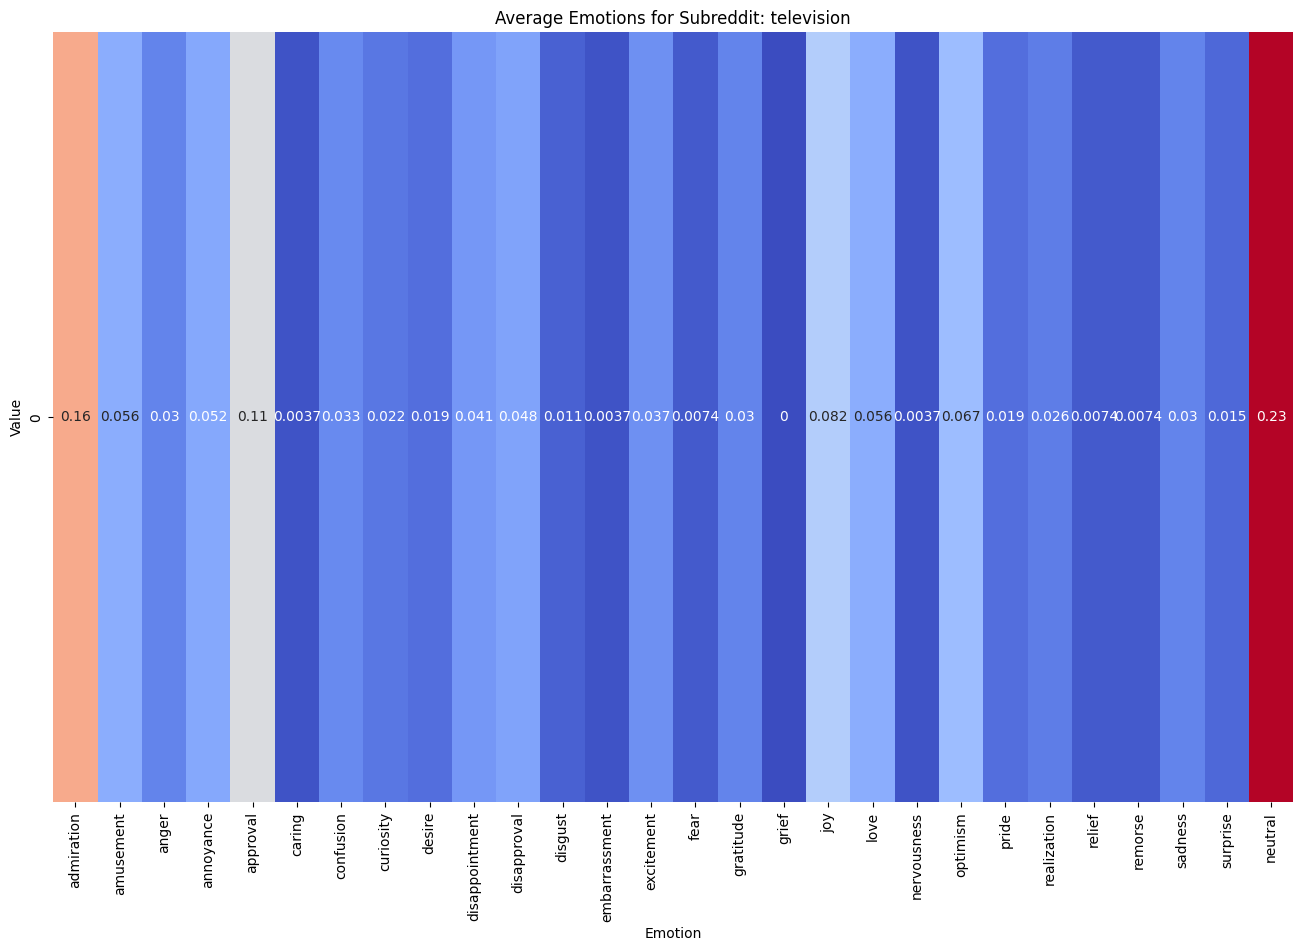

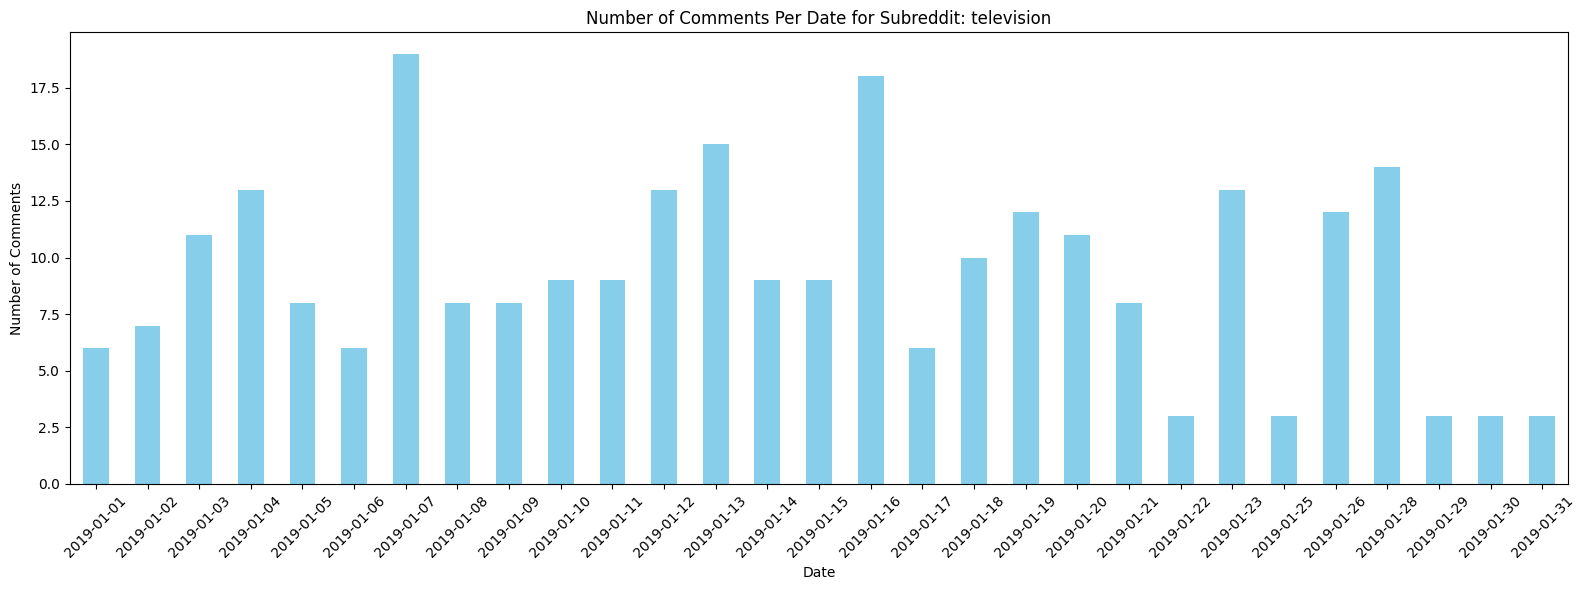

Top 5 most frequent emotions for subreddit 'television':
neutral       61
admiration    43
approval      30
joy           22
optimism      18
dtype: int64



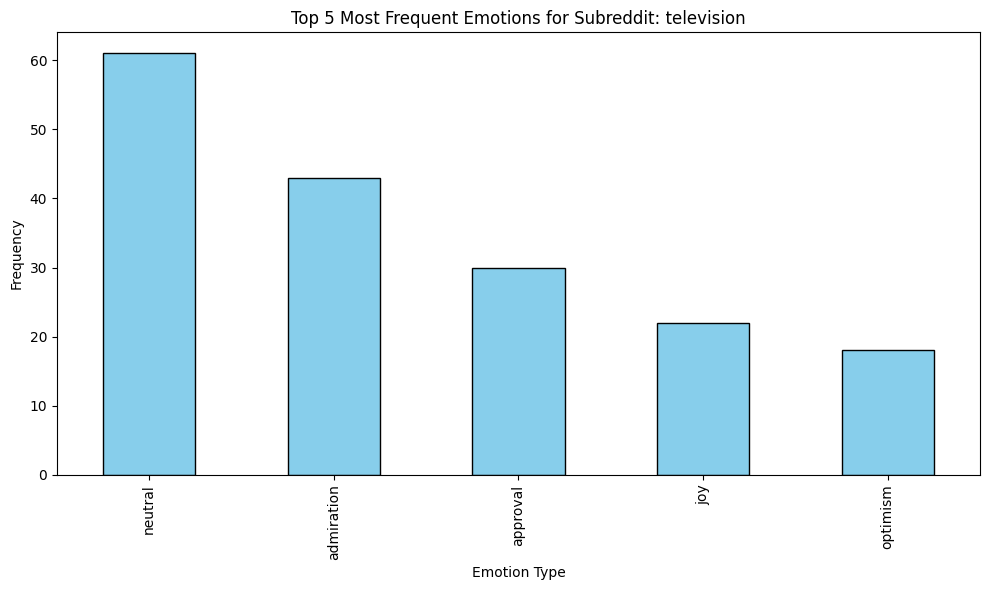

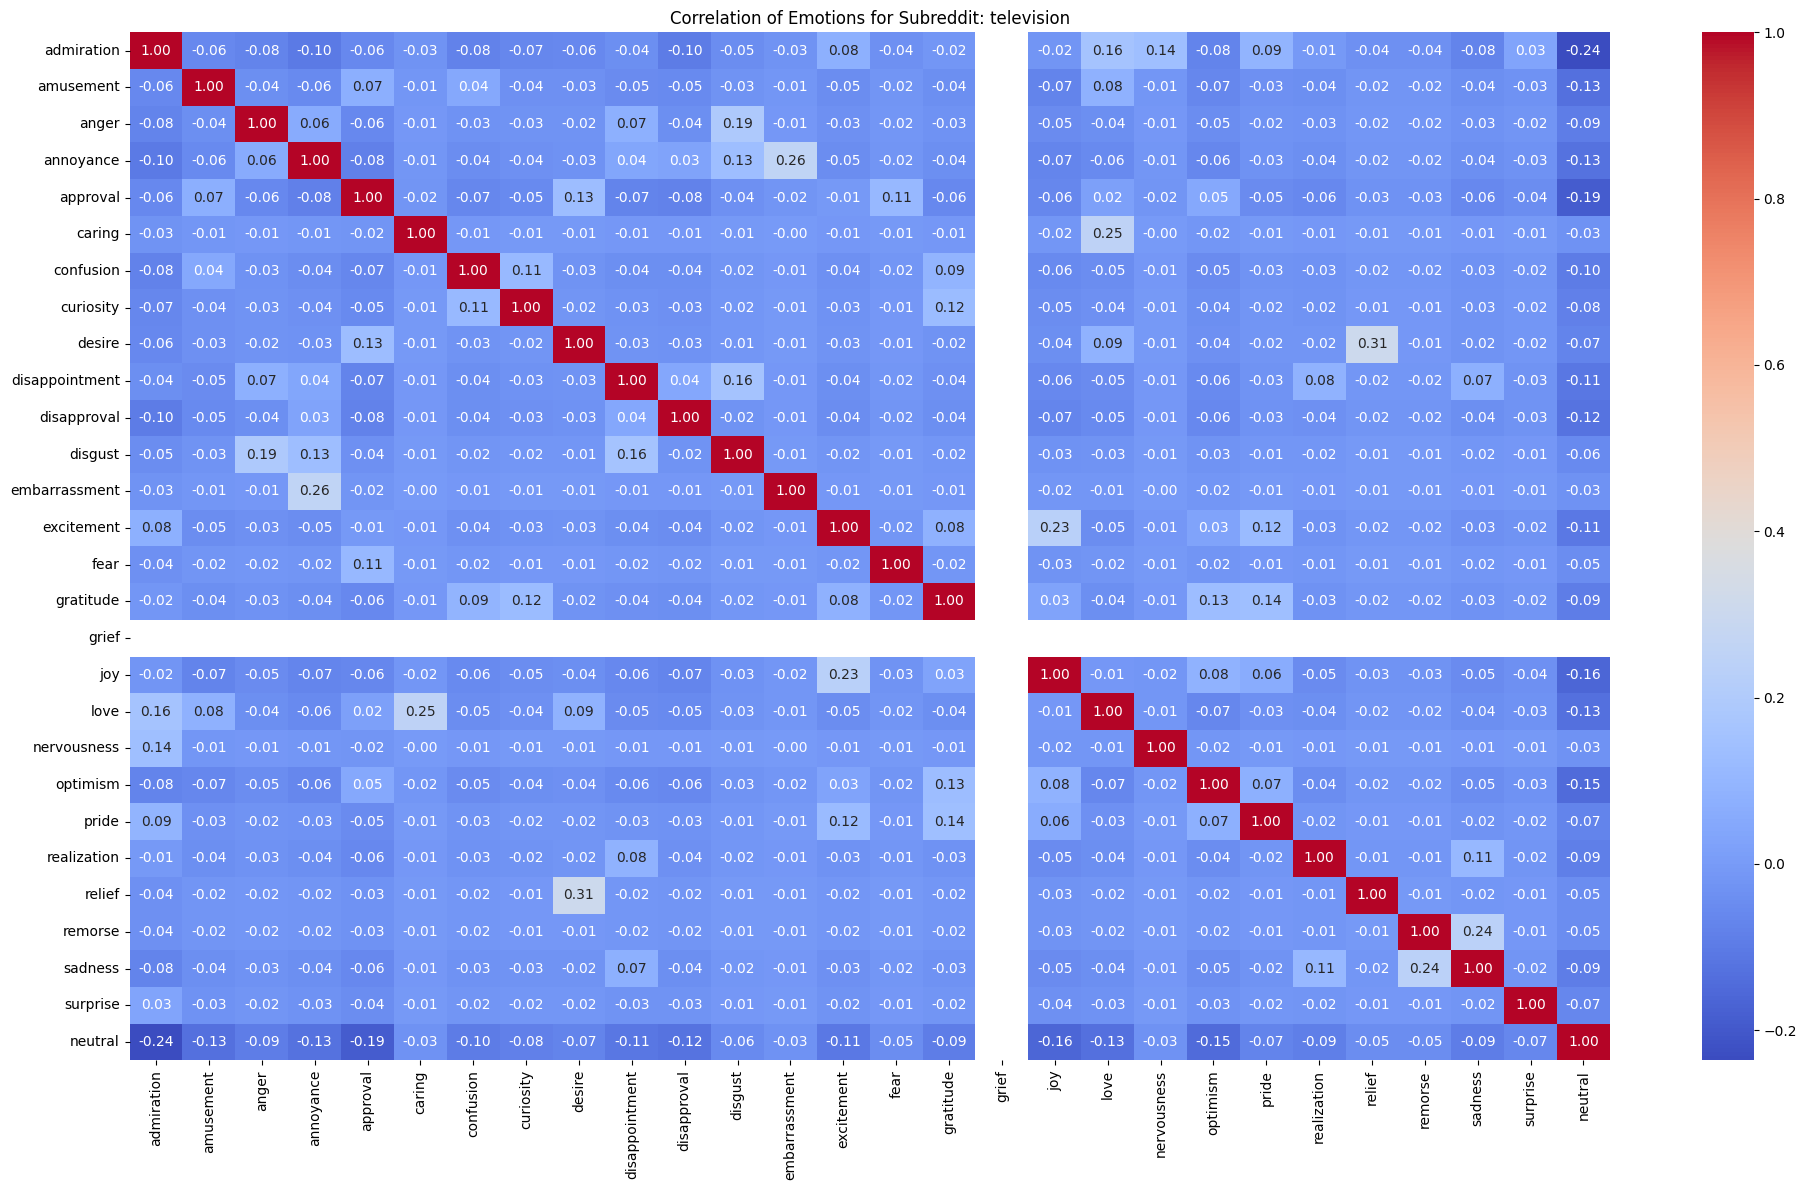


Performing detailed analysis for subreddit: television

Average emotions for subreddit 'television':
admiration        0.159851
amusement         0.055762
anger             0.029740
annoyance         0.052045
approval          0.111524
caring            0.003717
confusion         0.033457
curiosity         0.022305
desire            0.018587
disappointment    0.040892
disapproval       0.048327
disgust           0.011152
embarrassment     0.003717
excitement        0.037175
fear              0.007435
gratitude         0.029740
grief             0.000000
joy               0.081784
love              0.055762
nervousness       0.003717
optimism          0.066914
pride             0.018587
realization       0.026022
relief            0.007435
remorse           0.007435
sadness           0.029740
surprise          0.014870
neutral           0.226766
dtype: float64


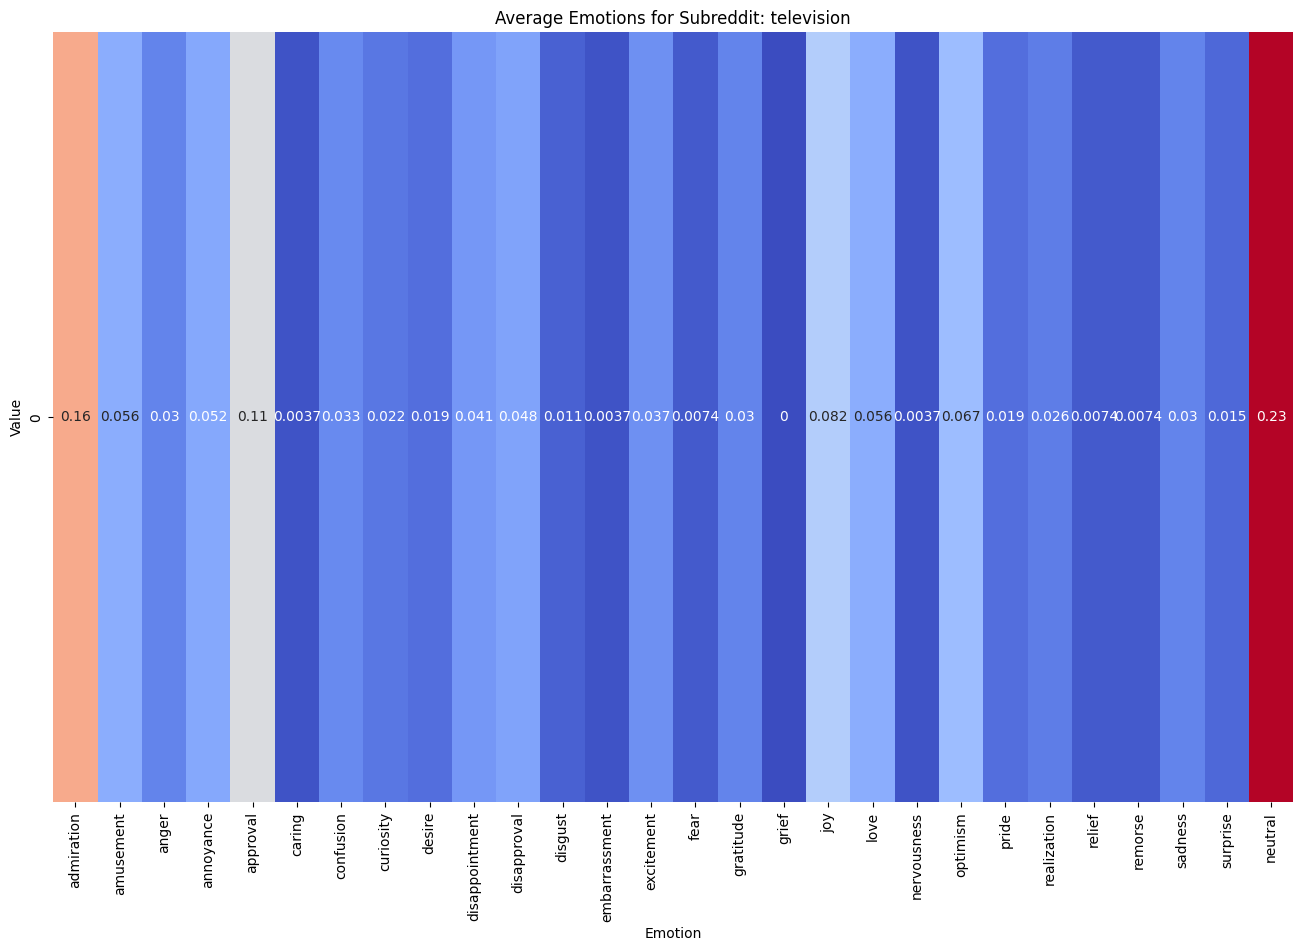

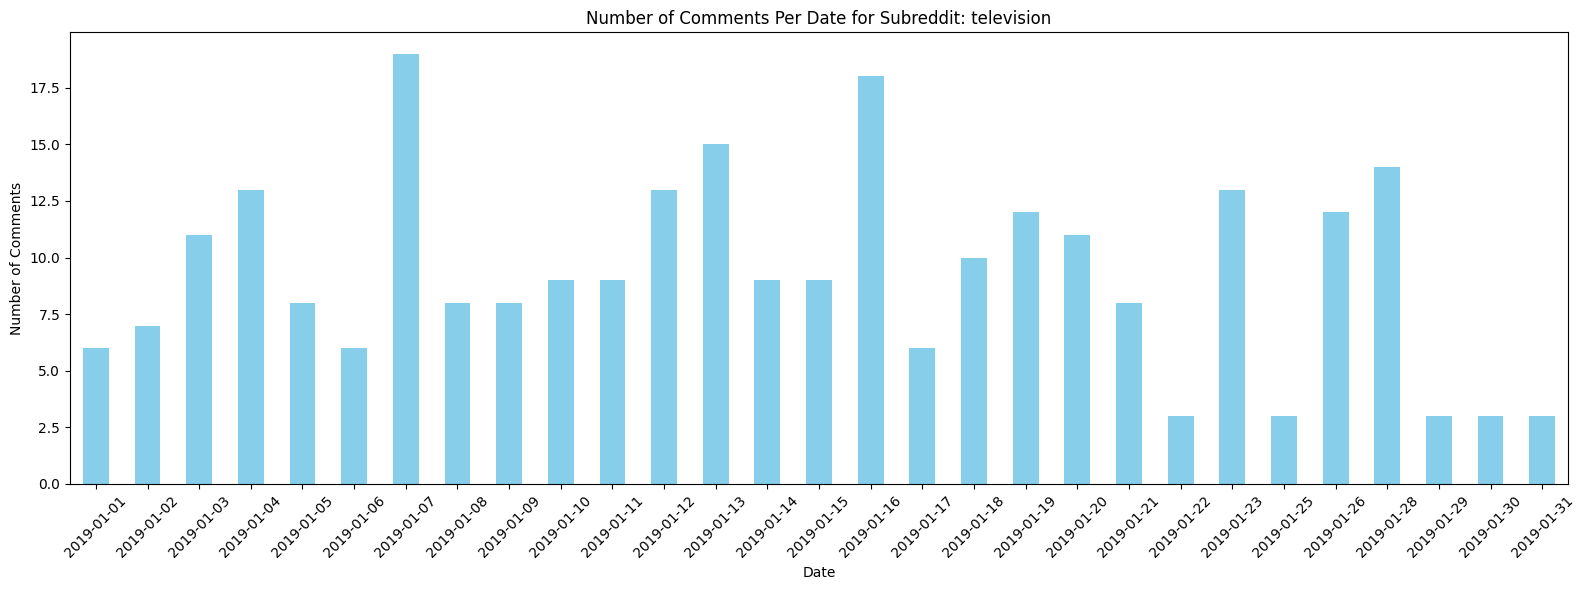

Top 5 most frequent emotions for subreddit 'television':
neutral       61
admiration    43
approval      30
joy           22
optimism      18
dtype: int64



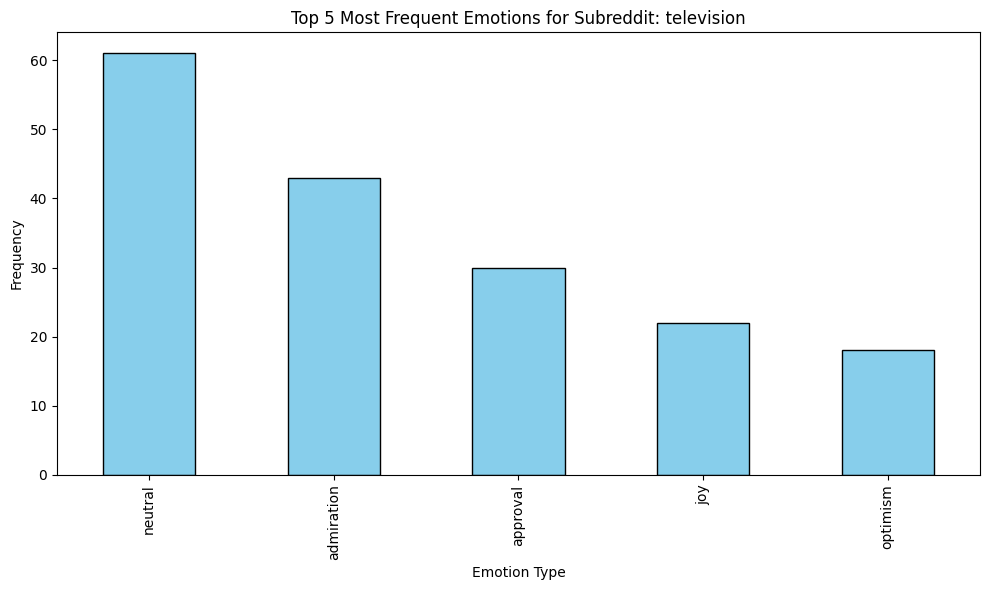

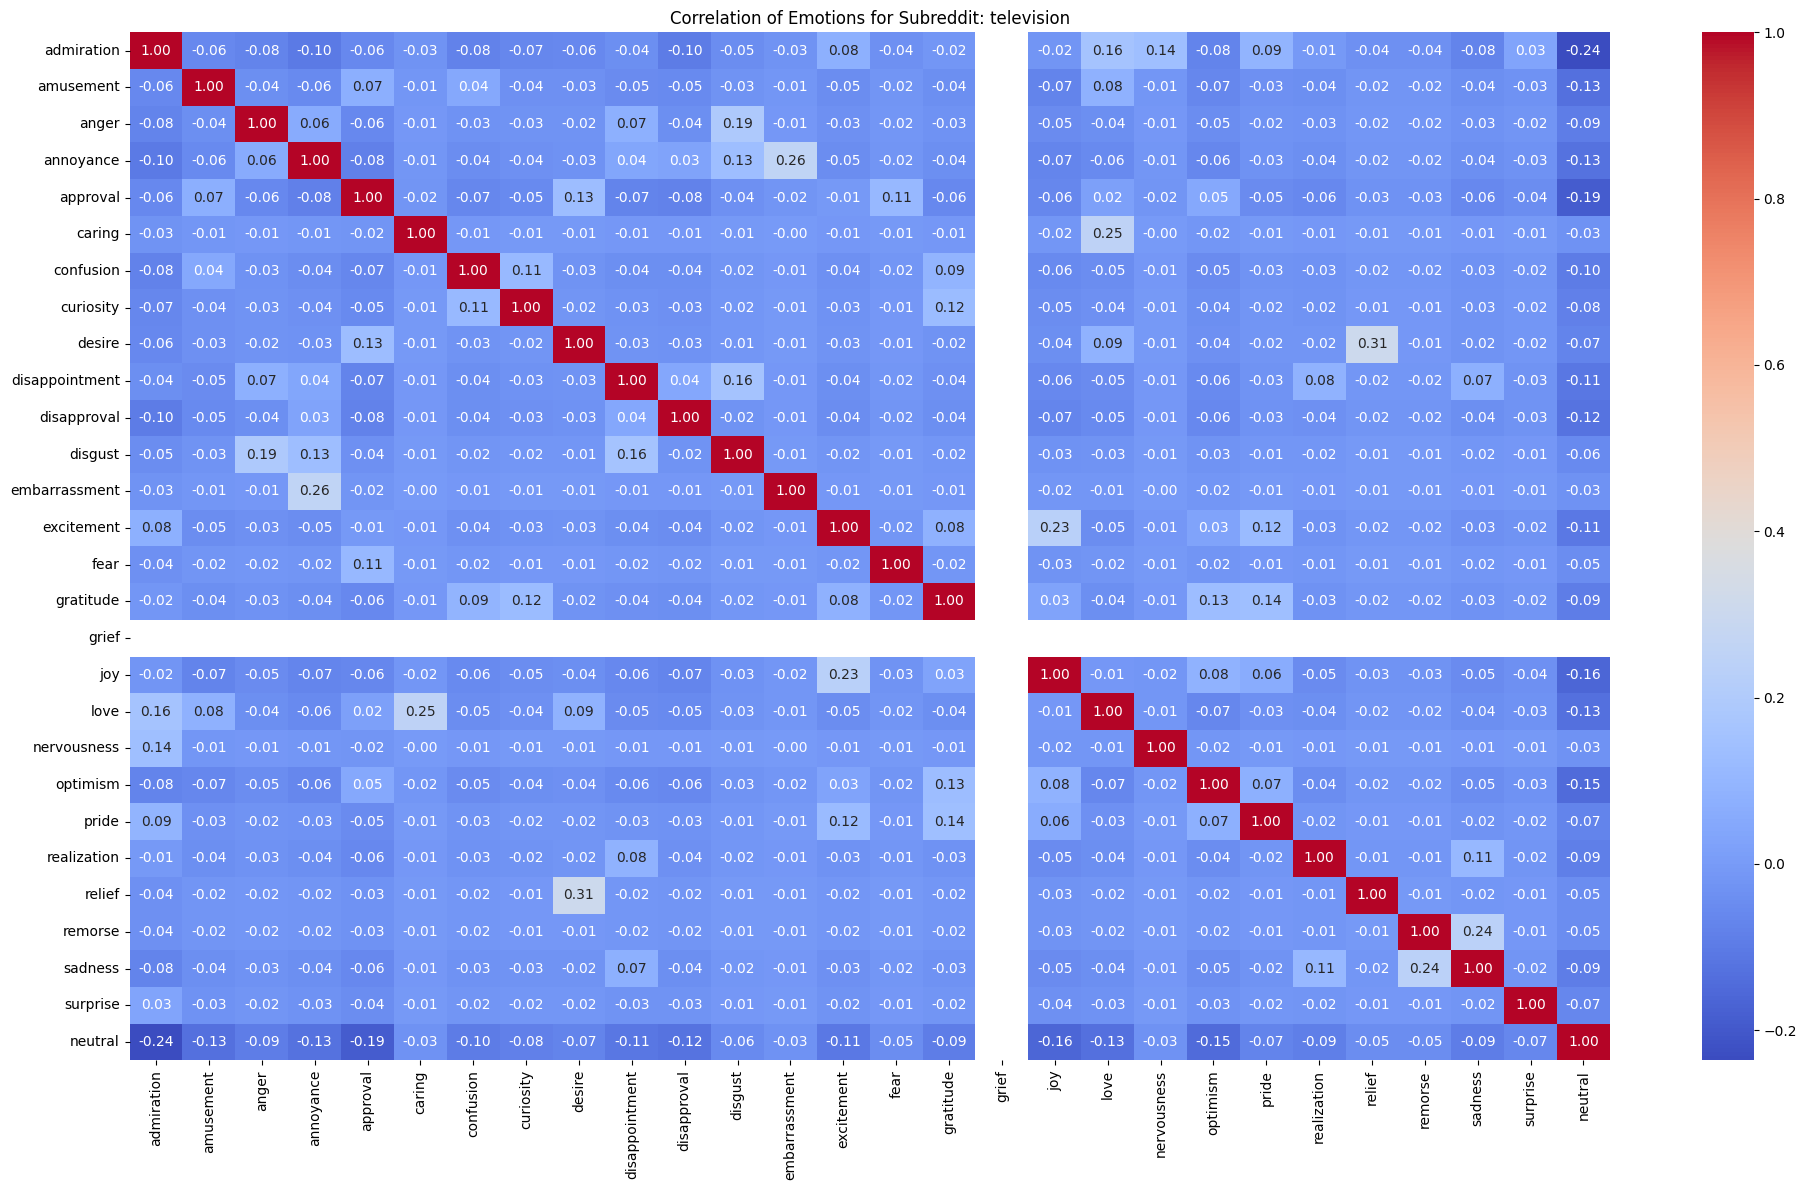


Building network graph for subreddit: television



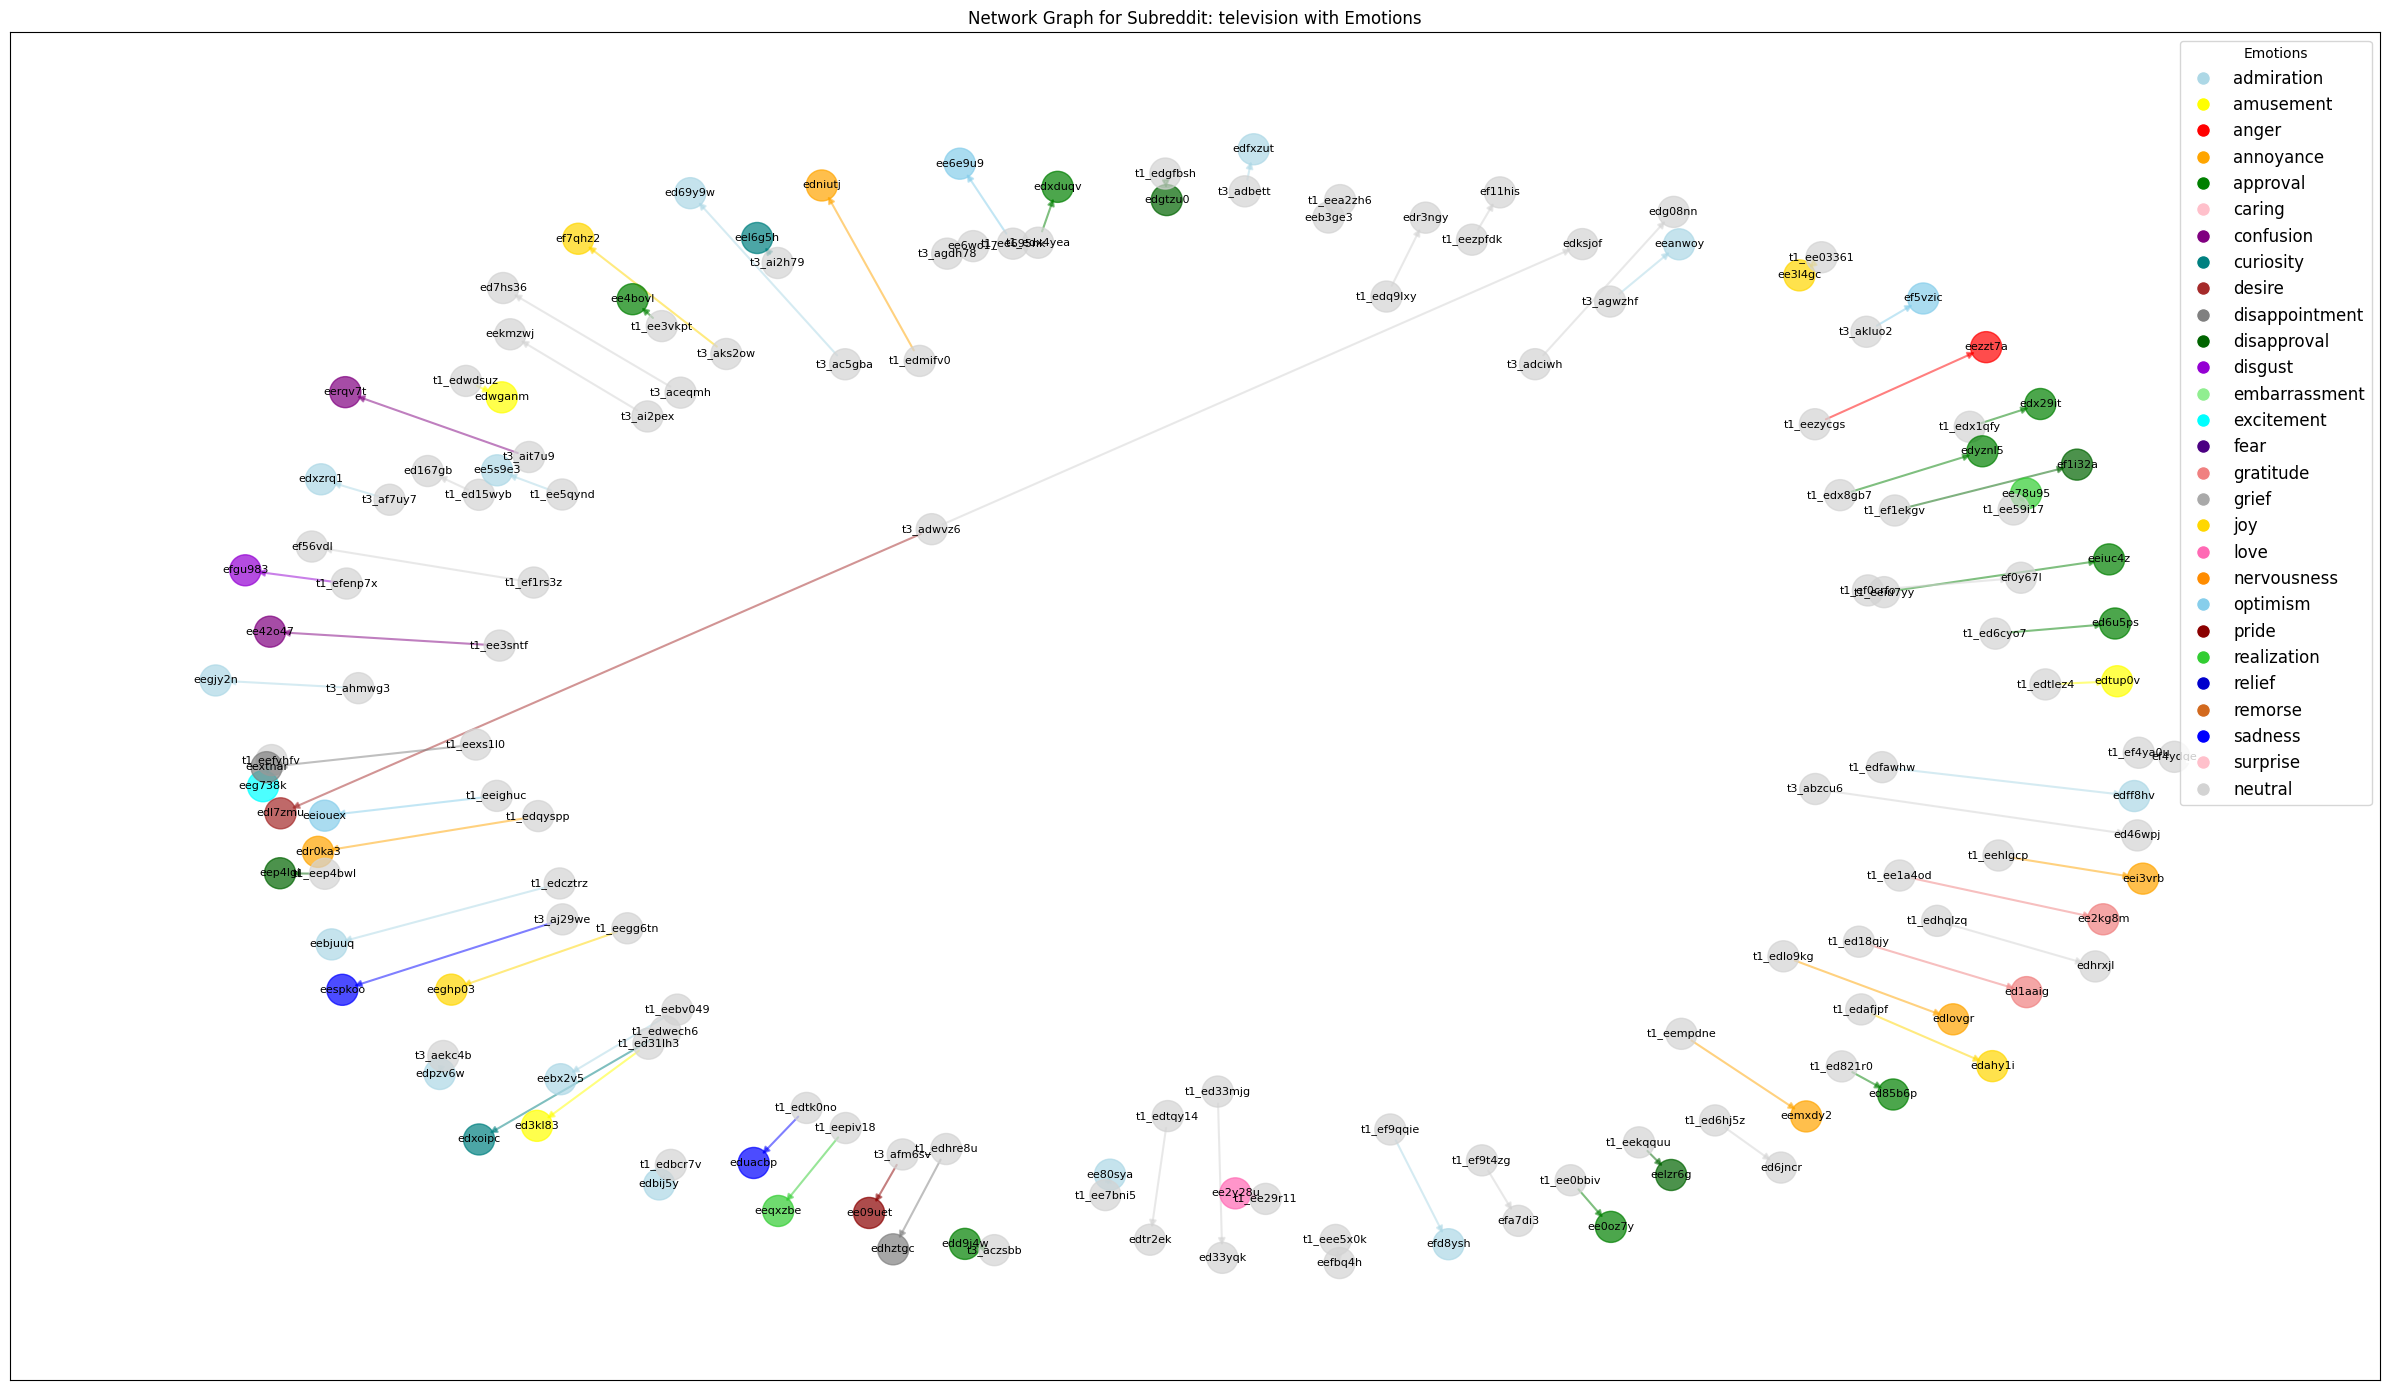


Extracting unique words for subreddit: television

Top unique words in subreddit 'television':
[('s', 66), ('t', 45), ('just', 30), ('season', 27), ('didn', 19), ('think', 18), ('watching', 17), ('like', 16), ('great', 15), ('shows', 14)]
{'t1_eew18eq': {'count': 1, 'subreddits': ['nrl']}, 't3_ai4q37': {'count': 1, 'subreddits': ['unpopularopinion']}, 't1_ed2m7g7': {'count': 1, 'subreddits': ['confessions']}, 't3_ahulml': {'count': 1, 'subreddits': ['facepalm']}, 't1_eda65q2': {'count': 1, 'subreddits': ['starwarsspeculation']}, 't1_eesoak0': {'count': 1, 'subreddits': ['TrueReddit']}, 't1_eczsmp8': {'count': 1, 'subreddits': ['cringe']}, 't1_ed5tfyc': {'count': 1, 'subreddits': ['TeenMomOGandTeenMom2']}, 't3_akz2ia': {'count': 3, 'subreddits': ['traaaaaaannnnnnnnnns']}, 't1_edc21ip': {'count': 1, 'subreddits': ['youtubehaiku']}, 't1_ed9m2l0': {'count': 1, 'subreddits': ['AskMenOver30']}, 't1_ee4pwrk': {'count': 1, 'subreddits': ['timberwolves']}, 't1_ef7d386': {'count': 1, 'subreddit

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import matplotlib
import re
from collections import Counter
from collections import defaultdict

# matplotlib.use('TkAgg')



class SubredditEmotionAnalysis:
    def __init__(self, combined_df):
        self.combined_df = combined_df
        self.combined_df['created_utc'] = pd.to_datetime(self.combined_df['created_utc'], errors='coerce')
        self.emotion_columns = combined_df.columns[9:]
        self.subreddit_emotions = combined_df.groupby('subreddit', as_index=False)[self.emotion_columns].sum()
        self.subreddit_dfs = {}
        self.create_subreddit_dfs()
        self.status_dict = defaultdict(lambda: {'comments': {}, 'subreddits': set()})
        self.build_comment_status_dict()

    def create_subreddit_dfs(self):
        for subreddit, group in self.combined_df.groupby('subreddit'):
            self.subreddit_dfs[subreddit] = group.reset_index(drop=True)

    def get_sub_matr(self):
        return self.subreddit_emotions

    def get_sub(self):
        return self.combined_df['subreddit'].unique()

    def analyze_subreddit_emotions(self):
        subreddit_emotion_analysis = {}
        for subreddit, subreddit_df in self.subreddit_dfs.items():
            num_records = len(subreddit_df)
            print(f"Data for subreddit '{subreddit}': with {num_records} records:")
            emotion_counts = {
                emotion: (subreddit_df[emotion] == 1).sum()
                for emotion in self.emotion_columns
            }
            emotion_percentages = {
                emotion: (count / num_records) * 100 if num_records > 0 else 0
                for emotion, count in emotion_counts.items()
            }
            subreddit_emotion_analysis[subreddit] = {
                'emotion_counts': emotion_counts,
                'emotion_percentages': emotion_percentages,
            }

        return subreddit_emotion_analysis

    def analyze_subreddit_stats(self, subreddit_name, date_column='created_utc'):
        """
        Analyze subreddit statistics, including average emotions and comments by date.

        Args:
            subreddit_name (str): The name of the subreddit to analyze.
            date_column (str): The name of the column containing datetime information. Default is 'created_utc'.

        Returns:
            None. Displays heatmap and bar plot for the analysis.
        """
        # Filter data for the specified subreddit
        subreddit_data = self.combined_df[self.combined_df['subreddit'] == subreddit_name]
        if subreddit_data.empty:
            print(f"No data found for subreddit: {subreddit_name}")
            return

        # Create a copy to avoid modifying the original DataFrame
        subreddit_data = subreddit_data.copy()

        # Check if the specified date column exists in the data
        if date_column not in subreddit_data.columns:
            print(f"Column '{date_column}' not found in the dataset.")
            return

        # Convert the date column to datetime format, coercing invalid entries to NaT
        subreddit_data[date_column] = pd.to_datetime(subreddit_data[date_column], errors='coerce')

        # Check if all entries in the date column are invalid
        if subreddit_data[date_column].isnull().all():
            print(f"All values in '{date_column}' are invalid or could not be converted.")
            return

        # Extract just the date from the datetime column and create a new column
        subreddit_data['created_date'] = subreddit_data[date_column].dt.date

        # Calculate mean values for the emotion columns
        emotion_means = subreddit_data[self.emotion_columns].mean()

        # Count comments by date, sorted in chronological order
        comments_by_date = subreddit_data['created_date'].value_counts().sort_index()

        # Display the average emotions
        print(f"Average emotions for subreddit '{subreddit_name}':\n{emotion_means}")

        # Generate a heatmap to visualize the average emotions
        plt.figure(figsize=(16, 10))
        sns.heatmap(emotion_means.to_frame().T, cmap="coolwarm", annot=True, cbar=False)
        plt.title(f"Average Emotions for Subreddit: {subreddit_name}")
        plt.xlabel("Emotion")
        plt.ylabel("Value")
        plt.show()

        # Generate a bar plot for comments per date
        plt.figure(figsize=(16, 6))
        comments_by_date.plot(kind='bar', color='skyblue')
        plt.title(f"Number of Comments Per Date for Subreddit: {subreddit_name}")
        plt.xlabel("Date")
        plt.ylabel("Number of Comments")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Calculate and print the top 5 most frequent emotions
        emotion_counts = subreddit_data[self.emotion_columns].sum().sort_values(ascending=False)
        print(f"Top 5 most frequent emotions for subreddit '{subreddit_name}':\n{emotion_counts.head()}\n")

        # Plot the top 5 most frequent emotions as a bar chart
        plt.figure(figsize=(10, 6))
        emotion_counts.head().plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f"Top 5 Most Frequent Emotions for Subreddit: {subreddit_name}")
        plt.xlabel("Emotion Type")
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

        # Plot correlation heatmap for emotions
        emotion_corr = subreddit_data[self.emotion_columns].corr()
        plt.figure(figsize=(20, 12))
        sns.heatmap(emotion_corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
        plt.title(f"Correlation of Emotions for Subreddit: {subreddit_name}")
        plt.tight_layout()
        plt.show()
    def build_network_graph(self, subreddit_name):
        subreddit_data = self.combined_df[self.combined_df['subreddit'] == subreddit_name]
        if subreddit_data.empty:
            print(f"No data found for subreddit: {subreddit_name}")
            return
        G = nx.DiGraph()
        emotion_colors = {
            'admiration': 'lightblue', 'amusement': 'yellow', 'anger': 'red',
            'annoyance': 'orange', 'approval': 'green', 'caring': 'pink',
            'confusion': 'purple', 'curiosity': 'teal', 'desire': 'brown',
            'disappointment': 'gray', 'disapproval': 'darkgreen', 'disgust': 'darkviolet',
            'embarrassment': 'lightgreen', 'excitement': 'cyan', 'fear': 'indigo',
            'gratitude': 'lightcoral', 'grief': 'darkgray', 'joy': 'gold',
            'love': 'hotpink', 'nervousness': 'darkorange', 'optimism': 'skyblue',
            'pride': 'darkred', 'realization': 'limegreen', 'relief': 'mediumblue',
            'remorse': 'chocolate', 'sadness': 'blue', 'surprise': 'pink',
            'neutral': 'lightgray'
        }

        for index, comment in subreddit_data.iterrows():
            comment_id = comment['id']
            author = comment['author']
            text = comment['text']

            # Get emotion data for the comment
            comment_emotions = comment[self.emotion_columns]  # This will get all the emotion columns for the comment

            # Get the dominant emotion (the one with the highest score)
            dominant_emotion = comment_emotions.idxmax()  # Get the emotion with the highest value

            # Add node with emotion data
            G.add_node(comment_id, author=author, text=text, emotions=dominant_emotion)

            # If the comment has a parent (is a reply), add an edge to the parent
            parent_id = comment['parent_id']
            if pd.notnull(parent_id) and parent_id != comment_id:
                # Assign the color based on the dominant emotion of the comment
                edge_color = emotion_colors.get(dominant_emotion, 'gray')  # Default to gray if no match
                G.add_edge(parent_id, comment_id, emotion=dominant_emotion, color=edge_color)

            # Plotting the graph
        plt.figure(figsize=(24, 14))
        pos = nx.spring_layout(G, seed=42)  # Layout for positioning nodes

        # Draw nodes with color based on dominant emotion
        node_colors = []
        for node in G.nodes():
            emotion = G.nodes[node].get('emotions', 'neutral')  # Get the emotion or use 'neutral' as fallback
            node_colors.append(emotion_colors.get(emotion, 'lightgray'))  # Default to 'lightgray' if emotion not found

        nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors, alpha=0.7)

        # Draw edges with color based on the emotion
        edge_colors = [G[u][v].get('color', 'lightgray') for u, v in G.edges()]
        nx.draw_networkx_edges(G, pos, edge_color=edge_colors, alpha=0.5, width=1.5)

        # Draw labels
        nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

        # Add a color legend
        handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=emotion)
                   for emotion, color in emotion_colors.items()]
        plt.legend(handles=handles, title="Emotions", loc="best", fontsize=12)

        # Display the graph title
        plt.title(f"Network Graph for Subreddit: {subreddit_name} with Emotions")
        plt.tight_layout()
        plt.show()

    def get_unique_words_for_topic(self, subreddit_name, stop_words=ENGLISH_STOP_WORDS):
        """
        Get the most common unique words for a given subreddit, excluding stopwords.

        Args:
            subreddit_name (str): The name of the subreddit to analyze.
            stop_words (set): A set of stopwords to exclude from the analysis (default: ENGLISH_STOP_WORDS).

        Returns:
            list: A list of tuples representing the most common words and their counts.
        """
        # Filter the DataFrame for the specified subreddit
        subreddit_data = self.combined_df[self.combined_df['subreddit'] == subreddit_name]

        if subreddit_data.empty:
            print(f"No data found for subreddit: {subreddit_name}")
            return []

        # Combine all text data into a single string, dropping NaN values
        all_text = " ".join(subreddit_data['text'].dropna())

        # Extract English words using regex
        english_words = re.findall(r'\b[a-zA-Z]+\b', all_text)

        # Convert words to lowercase and filter out stopwords
        filtered_words = [word.lower() for word in english_words if word.lower() not in stop_words]

        # Count the frequency of each word
        word_counts = Counter(filtered_words)

        # Return the top 10 most common words with their counts
        return word_counts.most_common(10)


    def build_comment_status_dict(self):
        # Loop over all rows in the dataframe
        for idx, row in self.combined_df.iterrows():
            comment_id = row['id']
            parent_id = row['parent_id']
            link_id = row['link_id']
            comment_author = row['author']
            comment_text = row['text']
            subreddit = row['subreddit']  # Assuming 'subreddit' column exists in your dataframe
            created_utc = row['created_utc']  # The UTC time of the comment

            # If parent_id is NaN, use link_id as the status key
            status_key = parent_id if pd.notnull(parent_id) else link_id

            # Add the comment to the status dictionary (ensure no duplicates by checking the comment_id)
            if comment_id not in self.status_dict[status_key]['comments']:
                self.status_dict[status_key]['comments'][comment_id] = {
                    'author': comment_author,
                    'text': comment_text,
                    'created_utc': created_utc
                }

            # Add the subreddit to the set for that status
            self.status_dict[status_key]['subreddits'].add(subreddit)

    def count_comments_by_status(self):
        # Count the number of comments for each status and get the associated subreddits
        comment_counts = {}
        for status_key, data in self.status_dict.items():
            comment_counts[status_key] = {
                'count': len(data['comments']),
                'subreddits': list(data['subreddits'])  # List of unique subreddits for each status
            }

        return comment_counts

def main():
    # Initialize the SubredditEmotionAnalysis class
    analysis = SubredditEmotionAnalysis(combined_df)
    print(analysis.get_sub_matr())
    # Example subreddit name to analyze
    print(analysis.get_sub())
    subreddit_name = 'television'  # Replace with your desired subreddit

    # # Perform emotion analysis for all subreddits
    print("\nAnalyzing emotions for all subreddits...\n")
    all_subreddit_emotion_analysis = analysis.analyze_subreddit_stats(subreddit_name)

    # Perform detailed analysis for a specific subreddit
    print(f"\nPerforming detailed analysis for subreddit: {subreddit_name}\n")
    analysis.analyze_subreddit_stats(subreddit_name)

    # Build and visualize network graph for a specific subreddit
    print(f"\nBuilding network graph for subreddit: {subreddit_name}\n")
    analysis.build_network_graph(subreddit_name)

    # Additional example for extracting unique words for a subreddit
    print(f"\nExtracting unique words for subreddit: {subreddit_name}\n")
    unique_words = analysis.get_unique_words_for_topic(subreddit_name)
    print(f"Top unique words in subreddit '{subreddit_name}':\n{unique_words}")
    status_counts = analysis.count_comments_by_status()
    print(status_counts)


if __name__ == "__main__":
    main()

# 📌 AuthorEmotionAnalysis - Summary

## 🔹 1. Initialization (`__init__` method)
- 📥 **Loads** a dataset into a Pandas DataFrame.
- 🕒 **Converts** `created_utc` column to datetime.
- 🎭 **Identifies** emotion-related columns (starting from index 9).
- 📊 **Aggregates** emotions per author.
- 📉 **Computes** overall average emotion scores.

---

## 🔹 2. Author Analysis Functions
### ✨ **General Author Insights**
- 📌 `get_authors()` → Counts posts per author.
- 🎭 `get_emotion_distribution_for_author(author_id)` → Retrieves emotion distribution for a given author.
- 😊 `get_authors_with_emotion(emotion)` → Finds authors who have a specific emotion.
- 📈 `get_average_emotion_for_author(author_id)` → Computes average emotion scores.
- 🔗 `get_emotion_correlation_for_author(author_id)` → Generates an emotion correlation matrix.

### 📊 **Detailed Emotion Analysis**
- 📉 `get_total_emotions_and_appearances(author_name)` → Calculates total emotions & number of posts.
- 🚀 `get_exceeding_emotions(author_data)` → Identifies emotions exceeding dataset average.
- 📊 `calculate_author_percentage(author_data)` → Computes an author's percentage of total emotions.

---

## 🔹 3. Visualization Functions 📊
- 📊 `plot_emotion_distribution(author_data, author_name)` → **Bar chart** of an author's emotions.
- 🌐 `plot_emotion_radar_chart(author_data, author_name)` → **Radar chart** for emotion visualization.
- 📌 `plot_emotion_percentages()` → **Displays percentage of users** tagging each emotion.
- 🎯 `plot_emotions_by_thresholds(thresholds, emotions)` → **Analyzes users exceeding emotion thresholds.**

---

## 🔹 4. User-Level Analysis
### 🔍 **Deep Analysis on User's Emotions**
- 🔬 `analyze_author1(author_name)` → **Detailed report** on an author's emotions.
- 📈 `analyze_user_emotions(target_user)` → **Computes & visualizes emotion trends, comparisons, & correlations.**

---

## 🔹 5. Interaction & Response Analysis
- 💬 `get_responses_by_user(selected_user)` → Retrieves **all responses** made by a specific user.
- 📩 `count_reactions_and_responses(selected_user)` → Counts **reactions & responses** to a selected user + emotion extraction.

---

## 🔹 6. Threshold-Based Analysis 🎯
- 📊 `count_raters_above_emotion_threshold(emotions, percent)` → **Counts users exceeding a given emotion threshold.**

---

## 🚀 7. Main Function (`main()`)
- 📥 Loads the dataset & initializes `AuthorEmotionAnalysis`.
- 📊 Runs various **analysis functions** on sample users (`saturdeity`, `CakeDay--Bot`, `[deleted]`).
- 📌 Extracts, analyzes & **visualizes**:
  - Emotion **trends** 📈
  - Emotion **correlation matrices** 📊
  - **Top emotions per author** 🎭
  - **User interaction analysis** 💬

---

### 🏆 **Key Takeaways**
✅ **Efficient emotion processing** for Reddit-style datasets.  
✅ **Multiple analysis functions** for user insights.  
✅ **Powerful visualization** tools for understanding trends.  
✅ **Interaction-focused functions** for deep engagement analytics.

---

🔎 Need any refinements? Let me know! 🚀


{'user': 'saturdeity', 'num_responses': 57, 'num_reactions': 29, 'responding_authors': ['saturdeity', '-CheezyGorditaCrunch', 'Broligarchy', '_offensive_username-'], 'responses_with_emotions': [{'response_id': 't3_af9w9f', 'responder': 'saturdeity', 'emotions': {'neutral': 1}}, {'response_id': 't3_alfx9x', 'responder': '-CheezyGorditaCrunch', 'emotions': {'neutral': 1}}, {'response_id': 't3_aey2qx', 'responder': 'Broligarchy', 'emotions': {'realization': 1}}, {'response_id': 't3_alfx9x', 'responder': '-CheezyGorditaCrunch', 'emotions': {'optimism': 1}}, {'response_id': 't3_af9w9f', 'responder': 'saturdeity', 'emotions': {'joy': 1}}, {'response_id': 't3_abxmq1', 'responder': '_offensive_username-', 'emotions': {'disappointment': 1, 'realization': 1}}, {'response_id': 't3_akjnns', 'responder': 'saturdeity', 'emotions': {'disappointment': 1}}, {'response_id': 't3_af9w9f', 'responder': 'saturdeity', 'emotions': {'curiosity': 1}}, {'response_id': 't3_akjnns', 'responder': 'saturdeity', 'emo

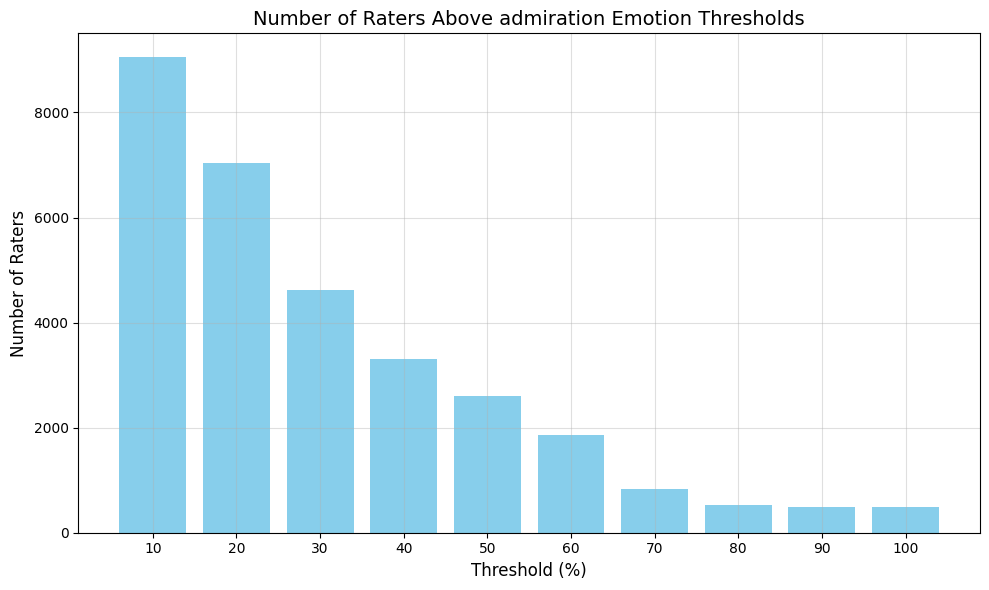

amusement
amusement 10
4734
amusement 20
3824
amusement 30
2585
amusement 40
1902
amusement 50
1495
amusement 60
1062
amusement 70
434
amusement 80
301
amusement 90
272
amusement 100
272


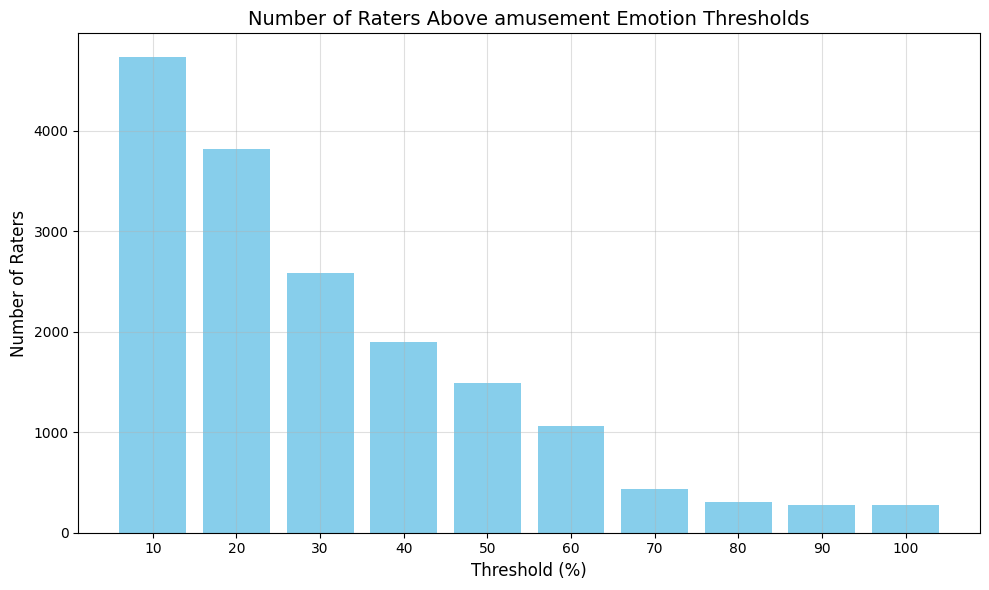

anger
anger 10
4979
anger 20
3455
anger 30
1823
anger 40
1184
anger 50
883
anger 60
556
anger 70
180
anger 80
116
anger 90
108
anger 100
108


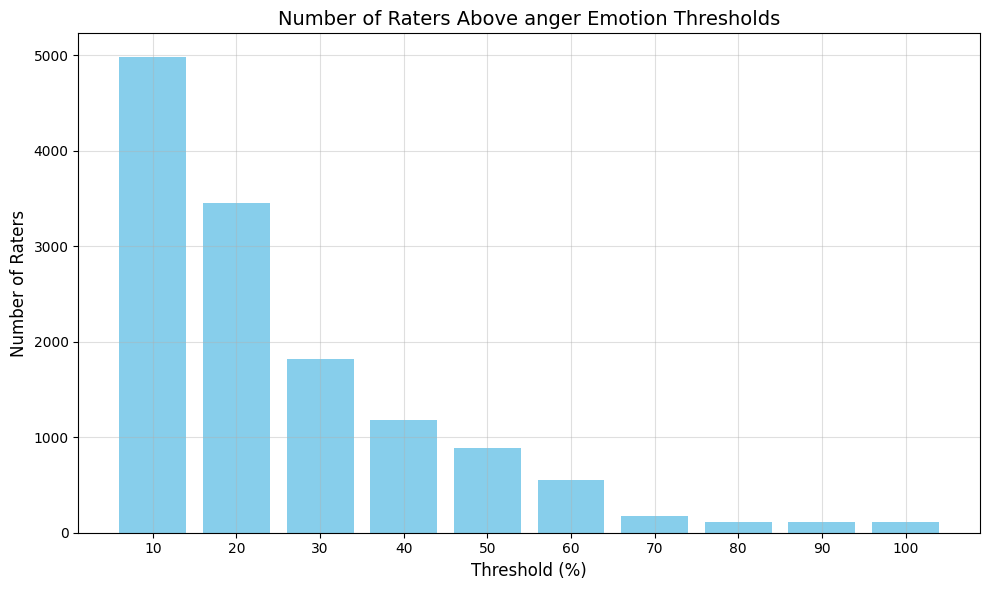

annoyance
annoyance 10
8850
annoyance 20
6140
annoyance 30
2842
annoyance 40
1577
annoyance 50
963
annoyance 60
537
annoyance 70
115
annoyance 80
73
annoyance 90
72
annoyance 100
72


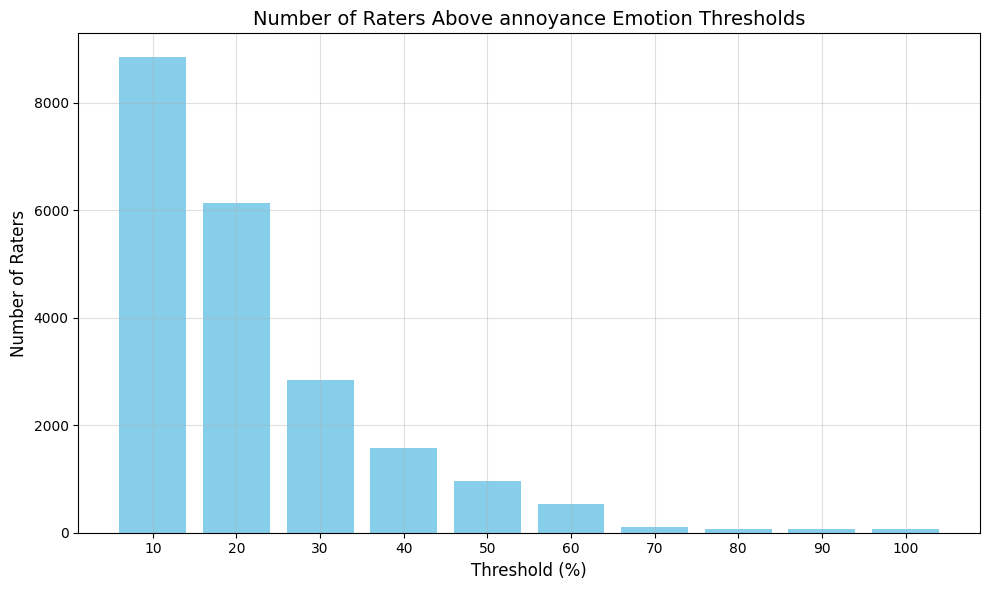

approval
approval 10
11723
approval 20
8396
approval 30
4149
approval 40
2224
approval 50
1518
approval 60
1014
approval 70
259
approval 80
190
approval 90
184
approval 100
184


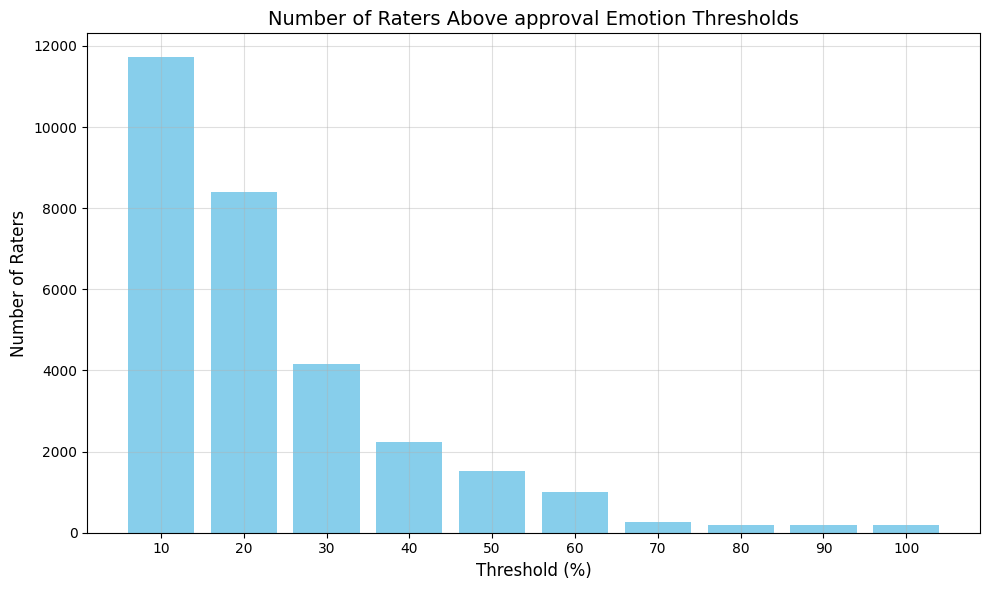

caring
caring 10
3811
caring 20
2608
caring 30
1228
caring 40
712
caring 50
474
caring 60
308
caring 70
71
caring 80
58
caring 90
54
caring 100
54


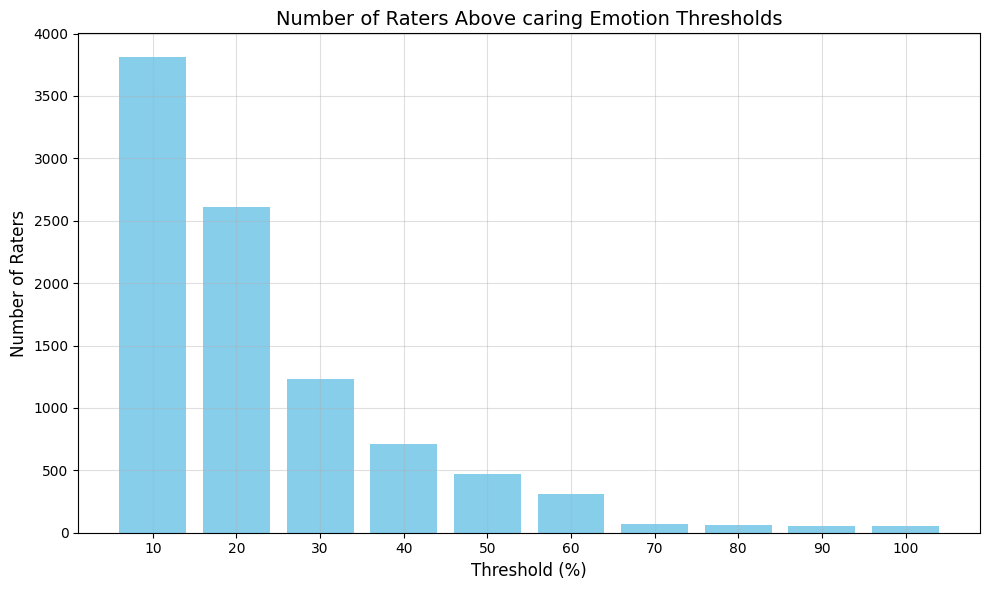

confusion
confusion 10
4730
confusion 20
3395
confusion 30
1791
confusion 40
993
confusion 50
712
confusion 60
500
confusion 70
127
confusion 80
92
confusion 90
90
confusion 100
90


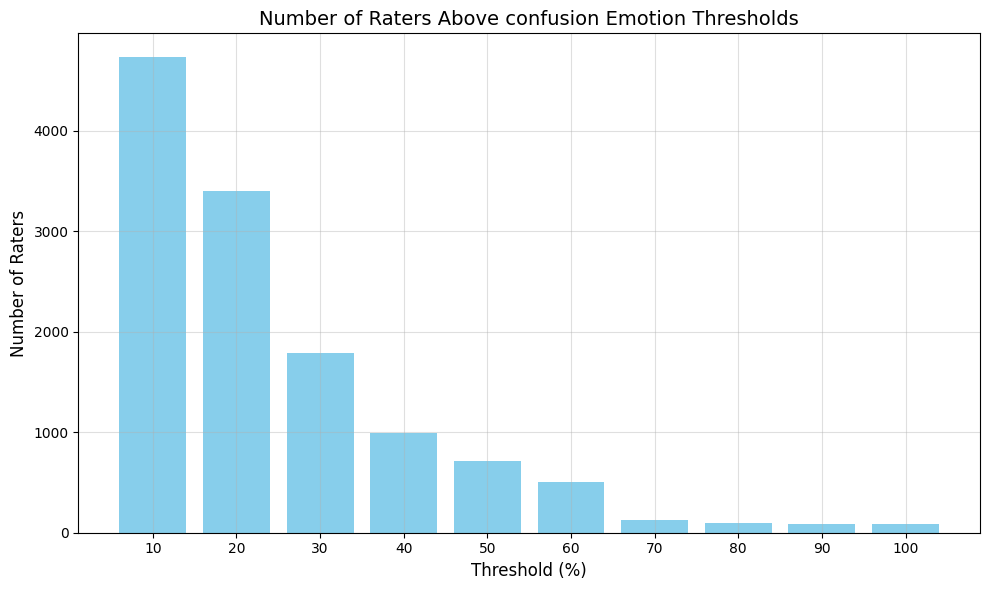

curiosity
curiosity 10
5561
curiosity 20
4208
curiosity 30
2482
curiosity 40
1610
curiosity 50
1144
curiosity 60
801
curiosity 70
261
curiosity 80
197
curiosity 90
191
curiosity 100
191


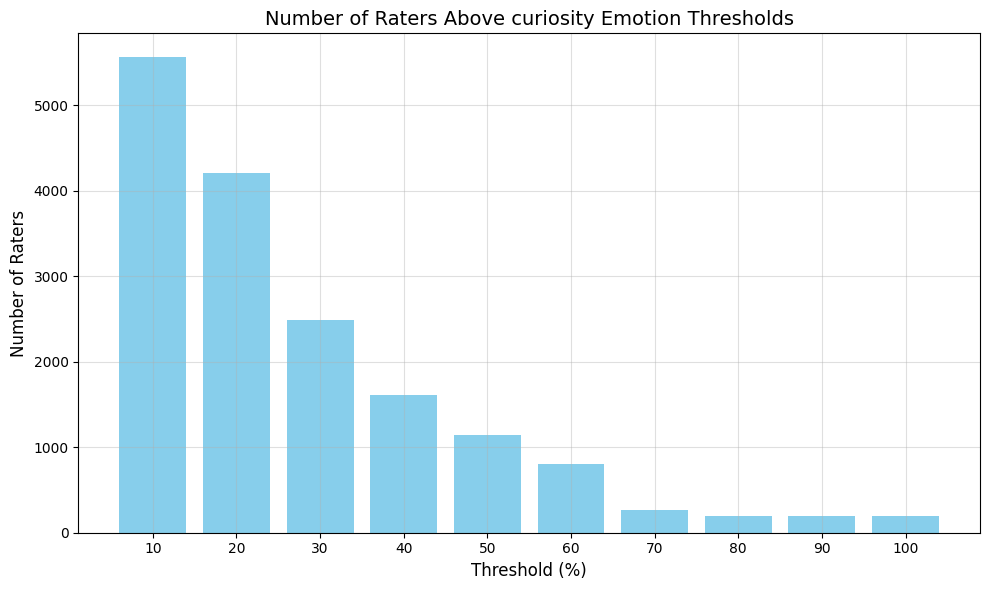

desire
desire 10
2509
desire 20
1650
desire 30
798
desire 40
457
desire 50
313
desire 60
213
desire 70
46
desire 80
32
desire 90
31
desire 100
31


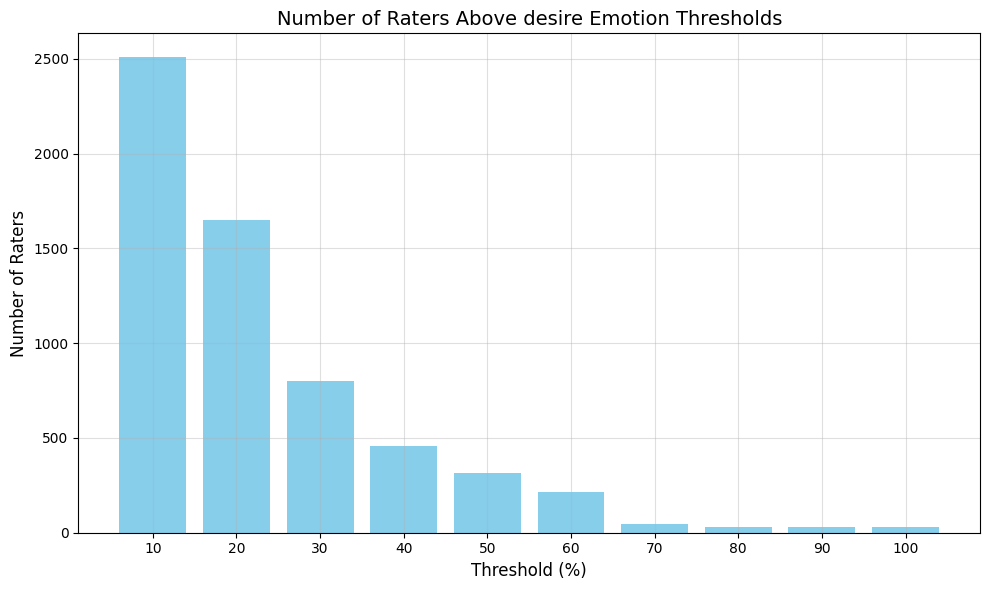

disappointment
disappointment 10
5786
disappointment 20
3612
disappointment 30
1398
disappointment 40
723
disappointment 50
447
disappointment 60
272
disappointment 70
81
disappointment 80
58
disappointment 90
57
disappointment 100
57


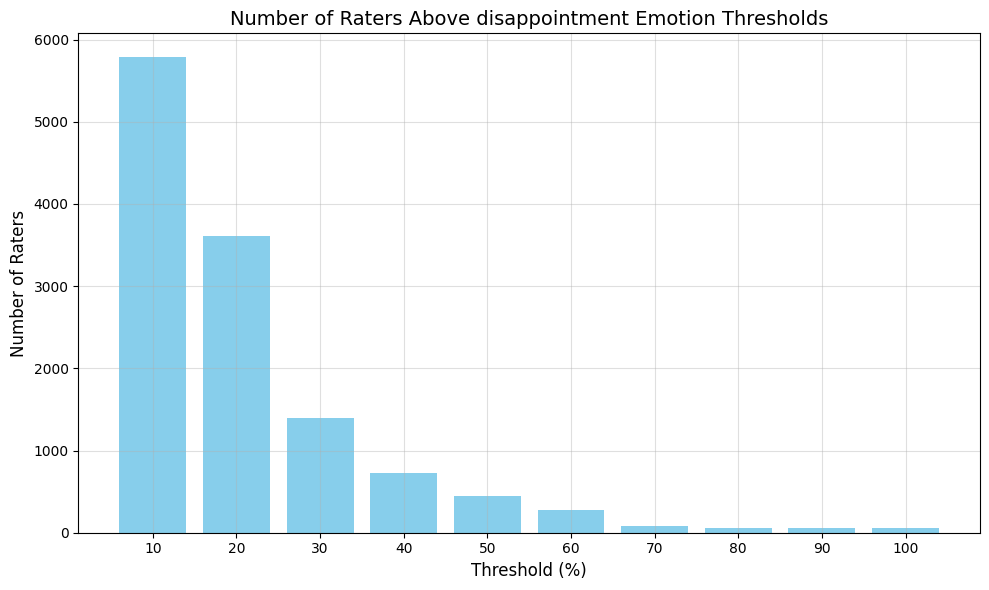

disapproval
disapproval 10
7421
disapproval 20
5109
disapproval 30
2581
disapproval 40
1479
disapproval 50
1057
disapproval 60
731
disapproval 70
174
disapproval 80
130
disapproval 90
128
disapproval 100
128


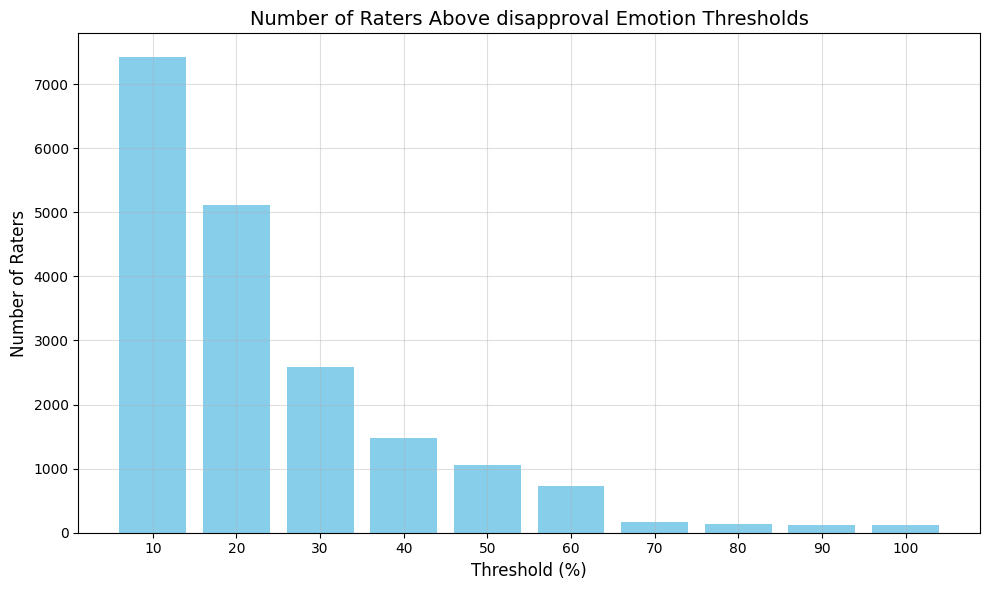

disgust
disgust 10
3556
disgust 20
2109
disgust 30
894
disgust 40
546
disgust 50
375
disgust 60
233
disgust 70
83
disgust 80
53
disgust 90
50
disgust 100
50


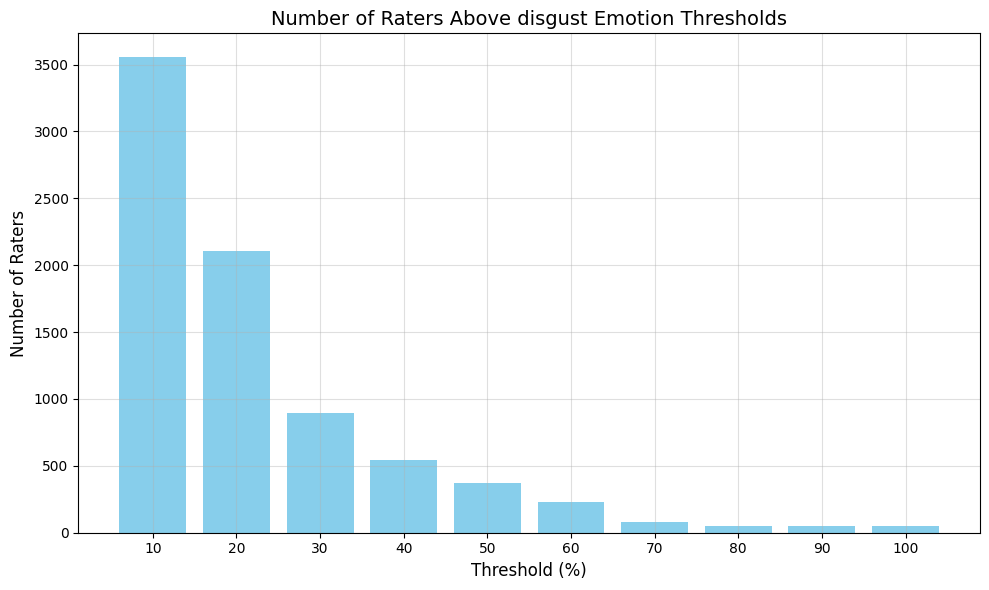

embarrassment
embarrassment 10
1716
embarrassment 20
925
embarrassment 30
344
embarrassment 40
202
embarrassment 50
140
embarrassment 60
97
embarrassment 70
32
embarrassment 80
23
embarrassment 90
23
embarrassment 100
23


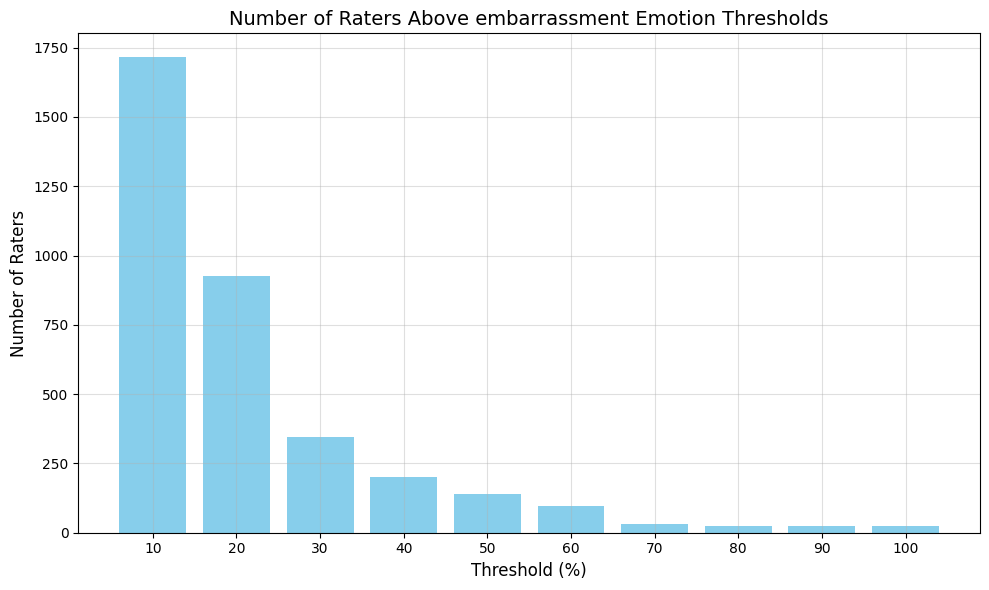

excitement
excitement 10
3857
excitement 20
2463
excitement 30
1066
excitement 40
568
excitement 50
395
excitement 60
254
excitement 70
77
excitement 80
50
excitement 90
48
excitement 100
48


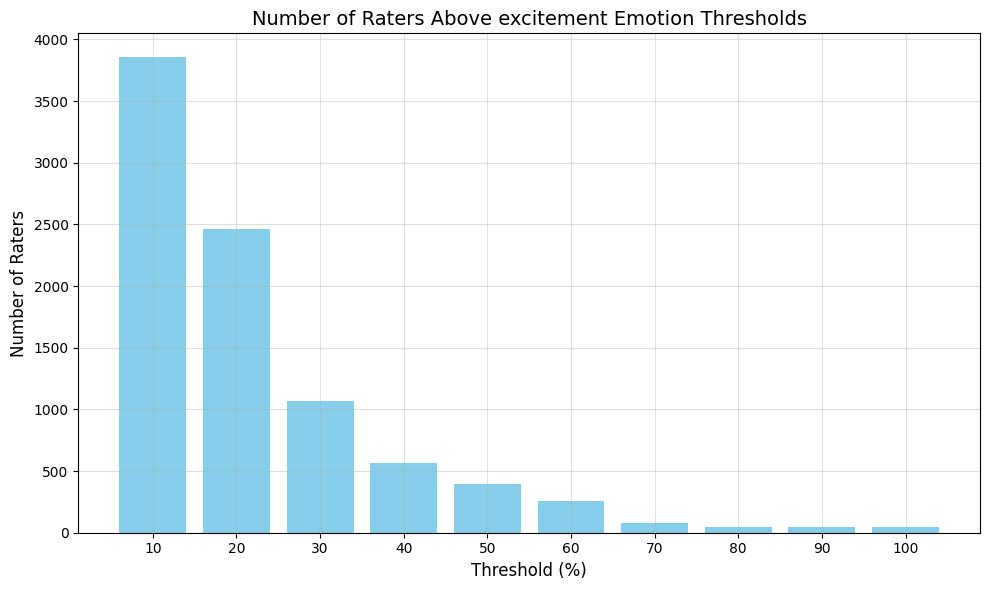

fear
fear 10
1888
fear 20
1212
fear 30
653
fear 40
453
fear 50
345
fear 60
221
fear 70
100
fear 80
54
fear 90
52
fear 100
52


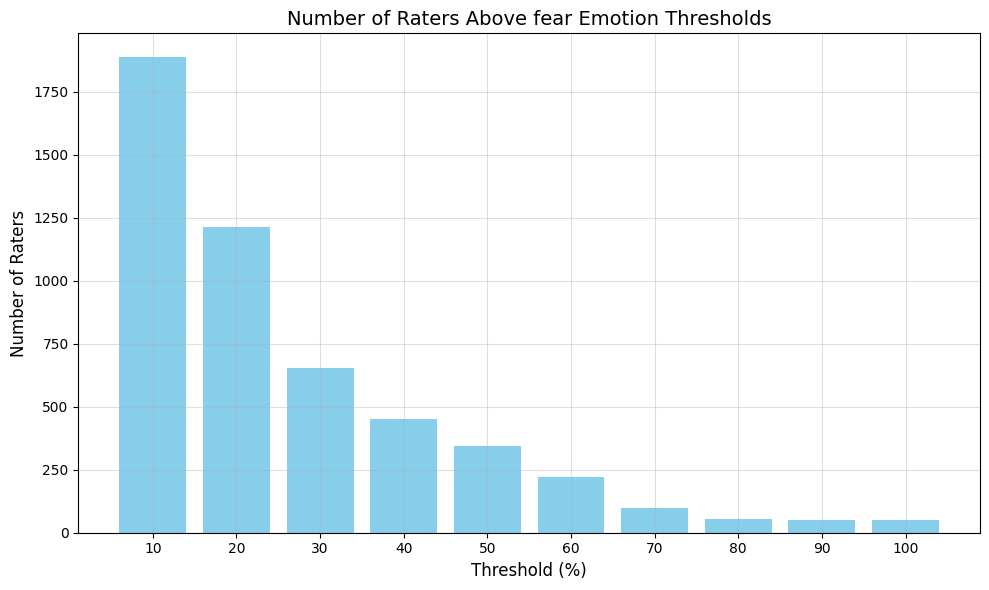

gratitude
gratitude 10
4910
gratitude 20
4017
gratitude 30
3106
gratitude 40
2596
gratitude 50
2273
gratitude 60
1767
gratitude 70
1170
gratitude 80
731
gratitude 90
686
gratitude 100
686


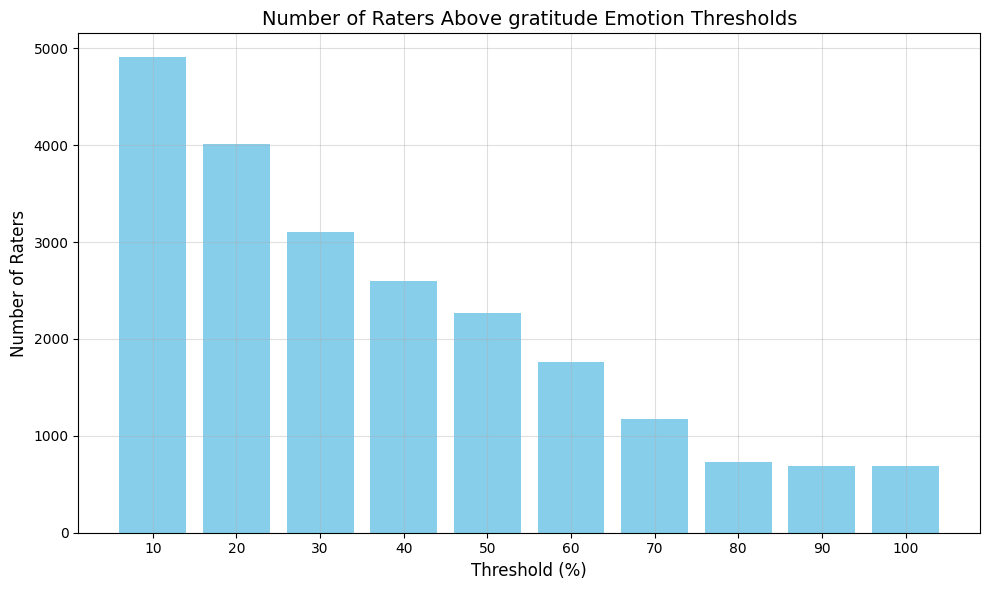

grief
grief 10
496
grief 20
265
grief 30
92
grief 40
47
grief 50
28
grief 60
11
grief 70
4
grief 80
1
grief 90
1
grief 100
1


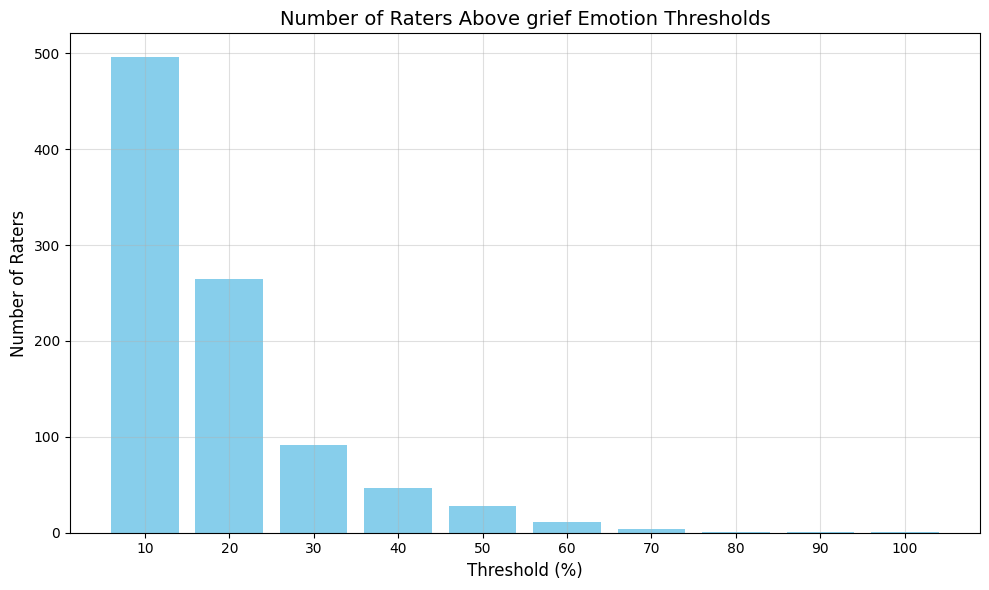

joy
joy 10
5102
joy 20
3499
joy 30
1694
joy 40
1023
joy 50
701
joy 60
421
joy 70
138
joy 80
85
joy 90
79
joy 100
79


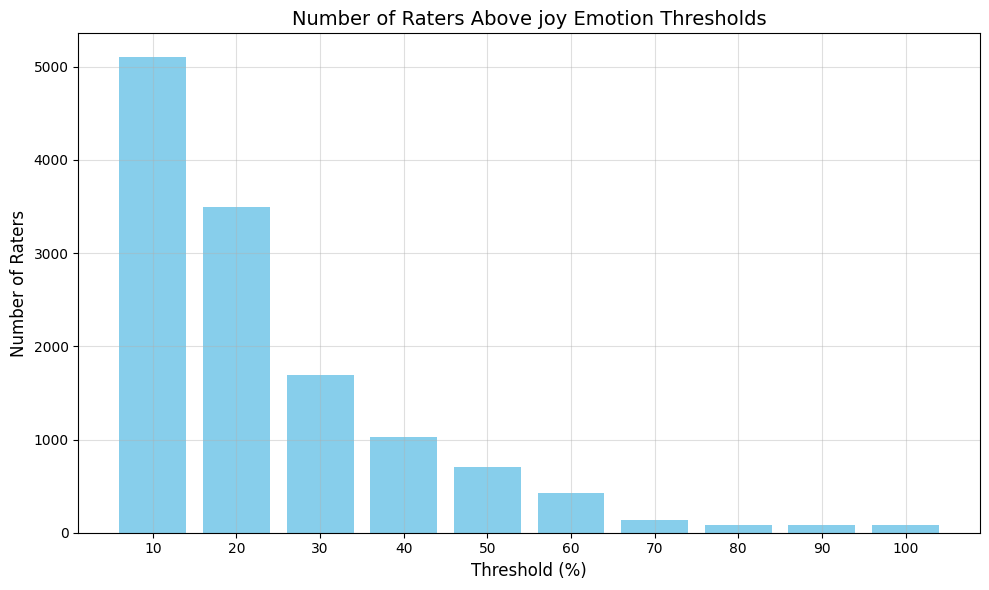

love
love 10
4015
love 20
3181
love 30
2185
love 40
1660
love 50
1333
love 60
929
love 70
442
love 80
309
love 90
279
love 100
279


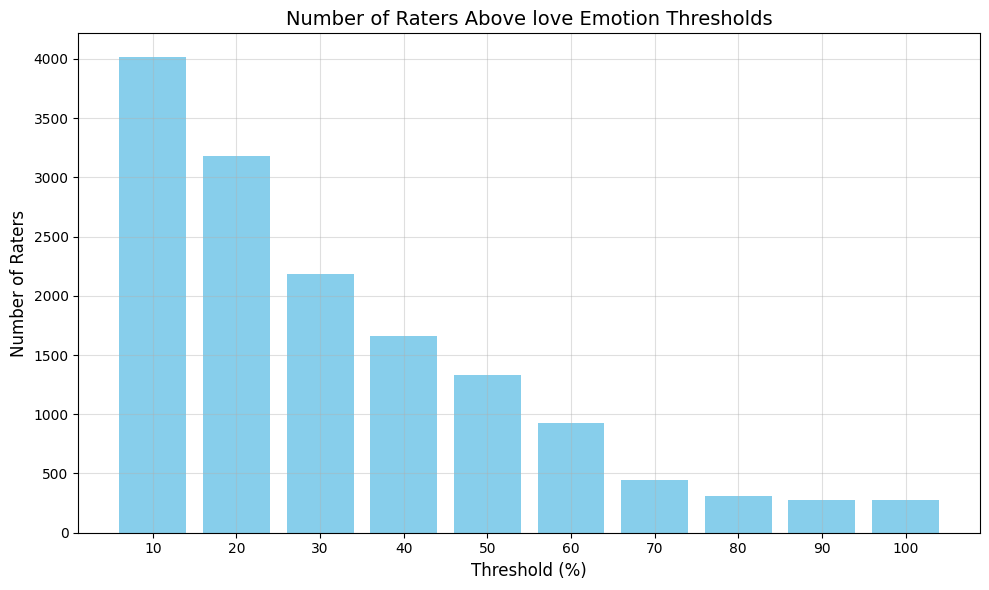

nervousness
nervousness 10
1332
nervousness 20
678
nervousness 30
200
nervousness 40
101
nervousness 50
59
nervousness 60
37
nervousness 70
13
nervousness 80
8
nervousness 90
7
nervousness 100
7


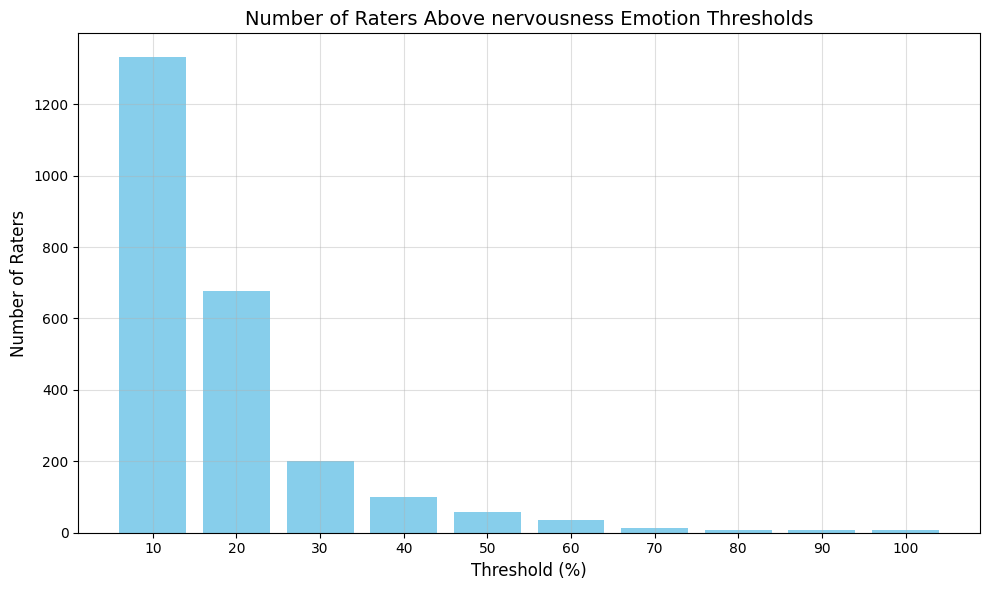

optimism
optimism 10
5450
optimism 20
3719
optimism 30
1769
optimism 40
1147
optimism 50
744
optimism 60
473
optimism 70
163
optimism 80
96
optimism 90
89
optimism 100
89


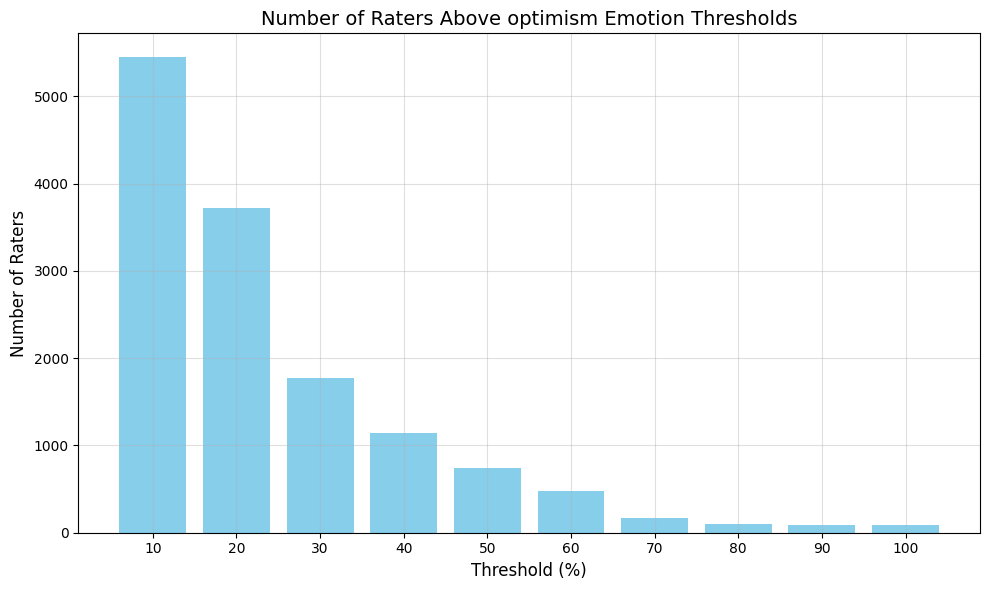

pride
pride 10
939
pride 20
490
pride 30
169
pride 40
74
pride 50
52
pride 60
28
pride 70
5
pride 80
5
pride 90
5
pride 100
5


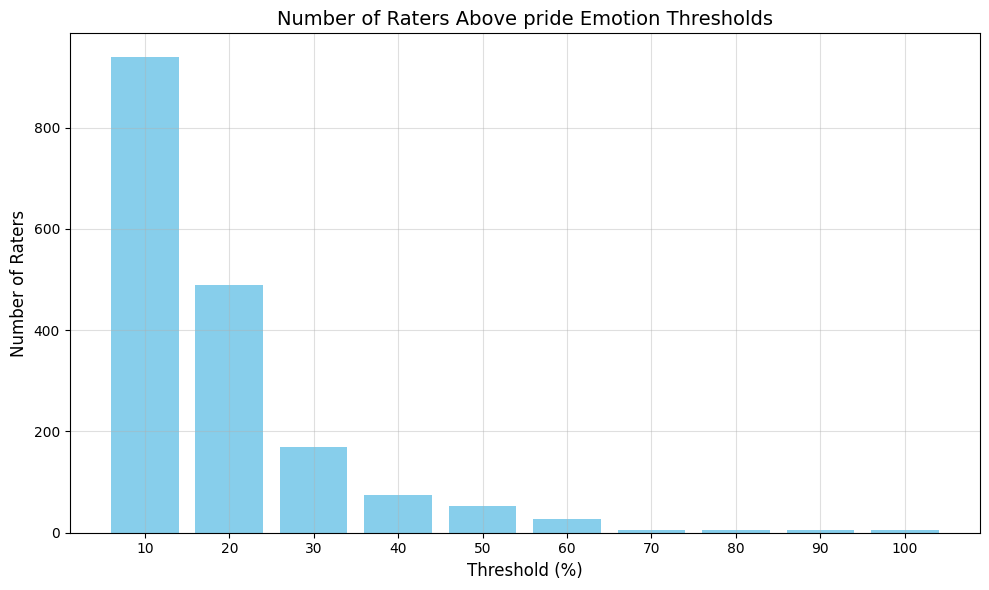

realization
realization 10
6369
realization 20
4114
realization 30
1609
realization 40
796
realization 50
468
realization 60
297
realization 70
59
realization 80
39
realization 90
38
realization 100
38


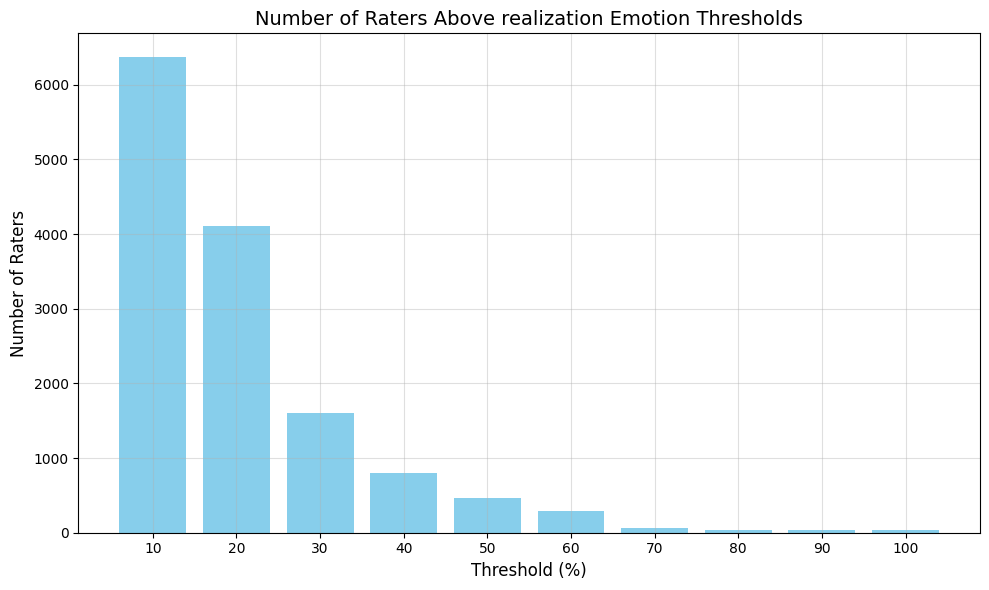

relief
relief 10
961
relief 20
575
relief 30
199
relief 40
101
relief 50
62
relief 60
43
relief 70
11
relief 80
7
relief 90
7
relief 100
7


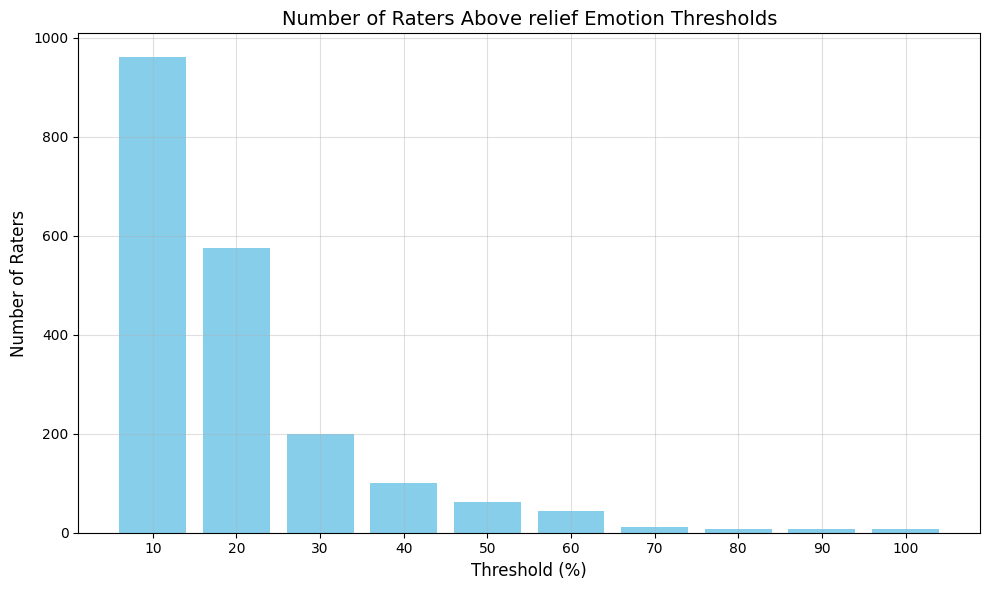

remorse
remorse 10
1492
remorse 20
1013
remorse 30
531
remorse 40
368
remorse 50
269
remorse 60
167
remorse 70
60
remorse 80
28
remorse 90
26
remorse 100
26


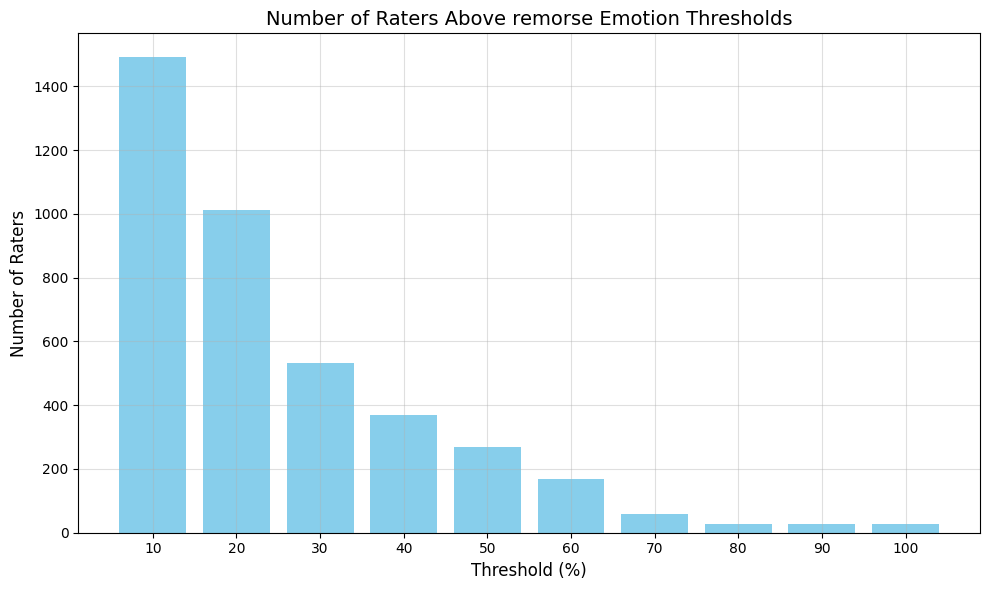

sadness
sadness 10
4166
sadness 20
2792
sadness 30
1430
sadness 40
928
sadness 50
653
sadness 60
419
sadness 70
151
sadness 80
89
sadness 90
82
sadness 100
82


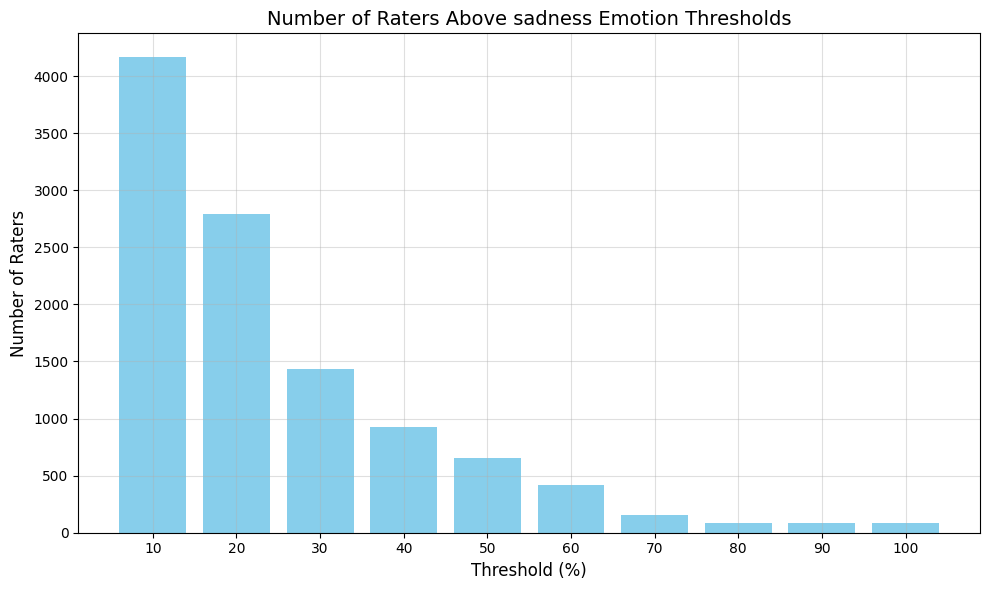

surprise
surprise 10
3415
surprise 20
2382
surprise 30
1284
surprise 40
779
surprise 50
553
surprise 60
350
surprise 70
117
surprise 80
78
surprise 90
72
surprise 100
72


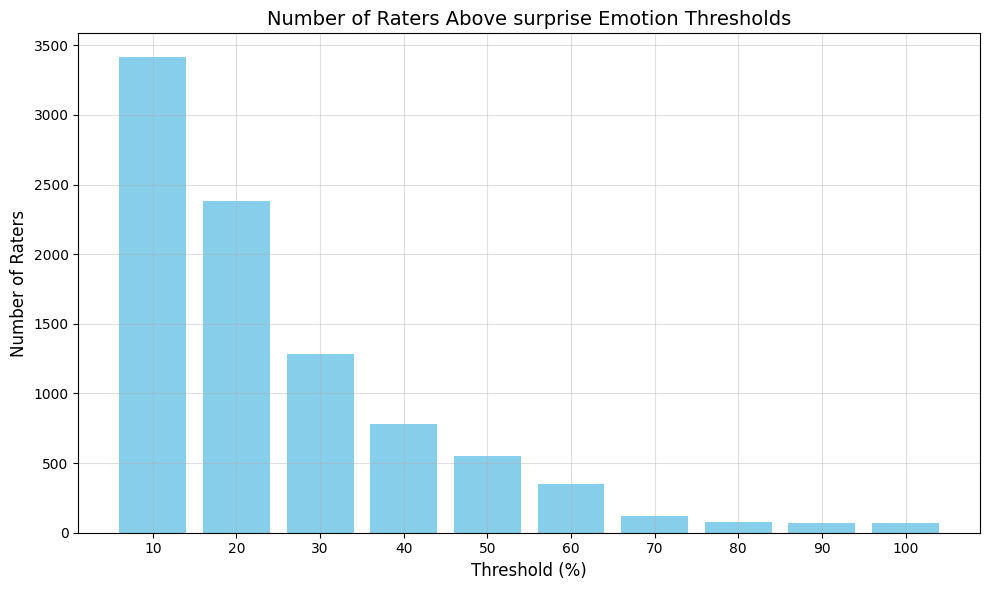

neutral
neutral 10
27580
neutral 20
23558
neutral 30
17633
neutral 40
13567
neutral 50
11549
neutral 60
9921
neutral 70
3808
neutral 80
3627
neutral 90
3261
neutral 100
3260


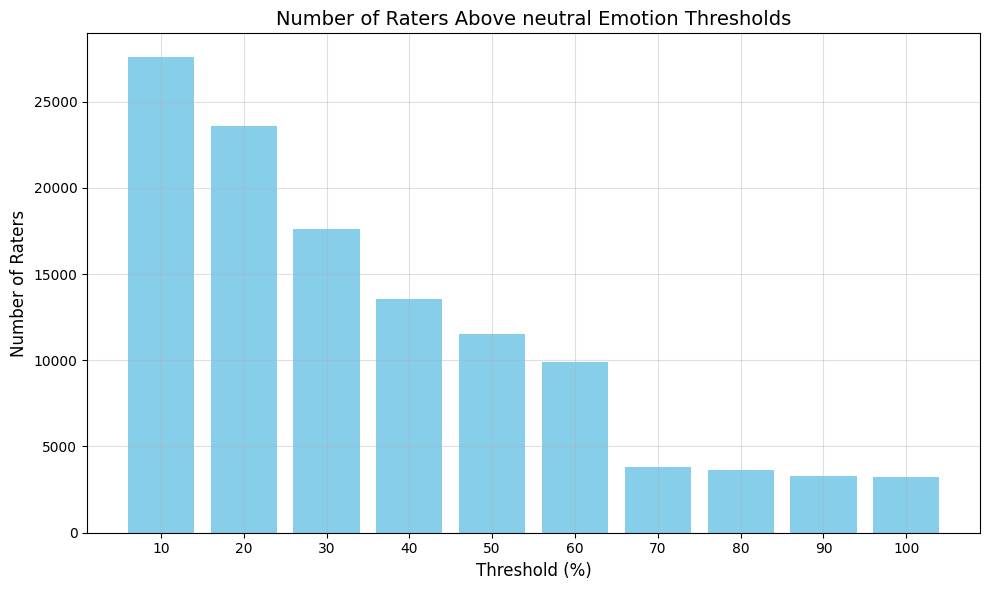

                  10     20     30     40     50    60    70    80    90   \
admiration       9053   7041   4629   3315   2599  1869   825   526   493   
amusement        4734   3824   2585   1902   1495  1062   434   301   272   
anger            4979   3455   1823   1184    883   556   180   116   108   
annoyance        8850   6140   2842   1577    963   537   115    73    72   
approval        11723   8396   4149   2224   1518  1014   259   190   184   
caring           3811   2608   1228    712    474   308    71    58    54   
confusion        4730   3395   1791    993    712   500   127    92    90   
curiosity        5561   4208   2482   1610   1144   801   261   197   191   
desire           2509   1650    798    457    313   213    46    32    31   
disappointment   5786   3612   1398    723    447   272    81    58    57   
disapproval      7421   5109   2581   1479   1057   731   174   130   128   
disgust          3556   2109    894    546    375   233    83    53    50   

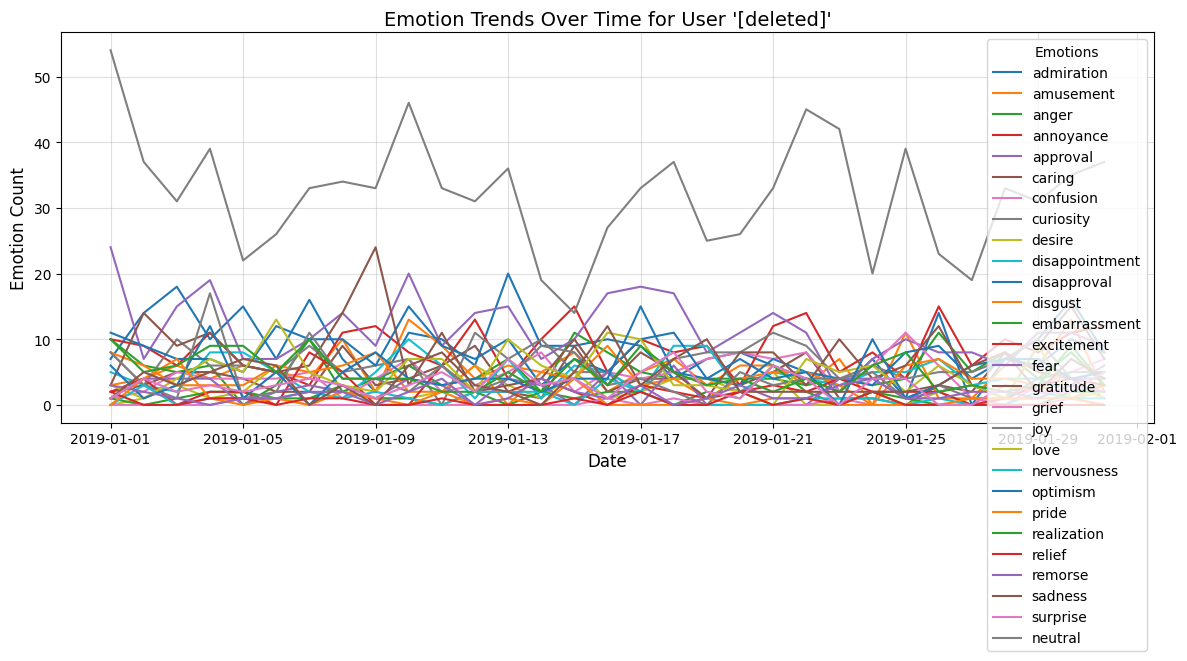

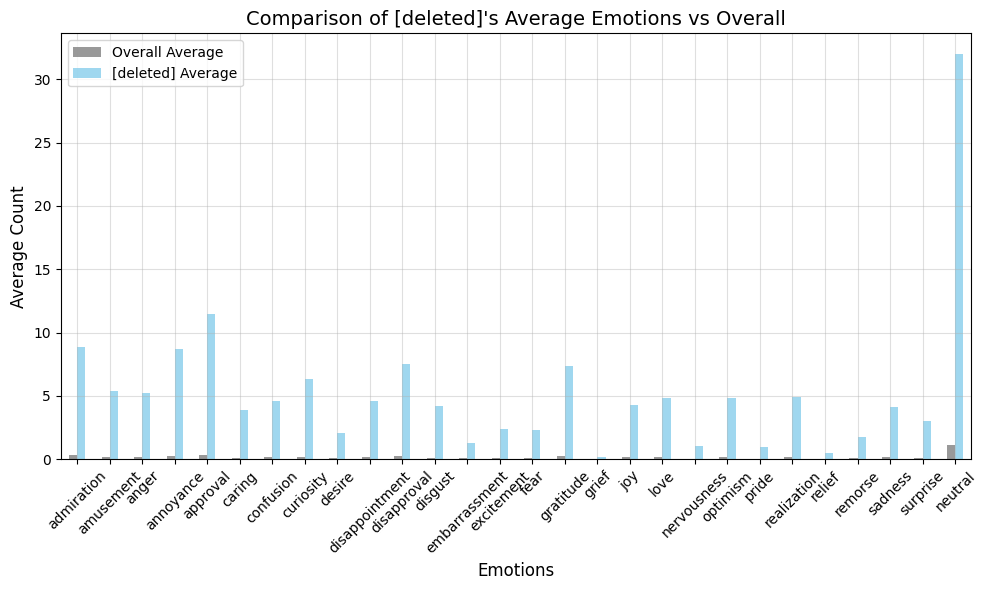

Emotion Intensity Metric for [deleted]: 148.42


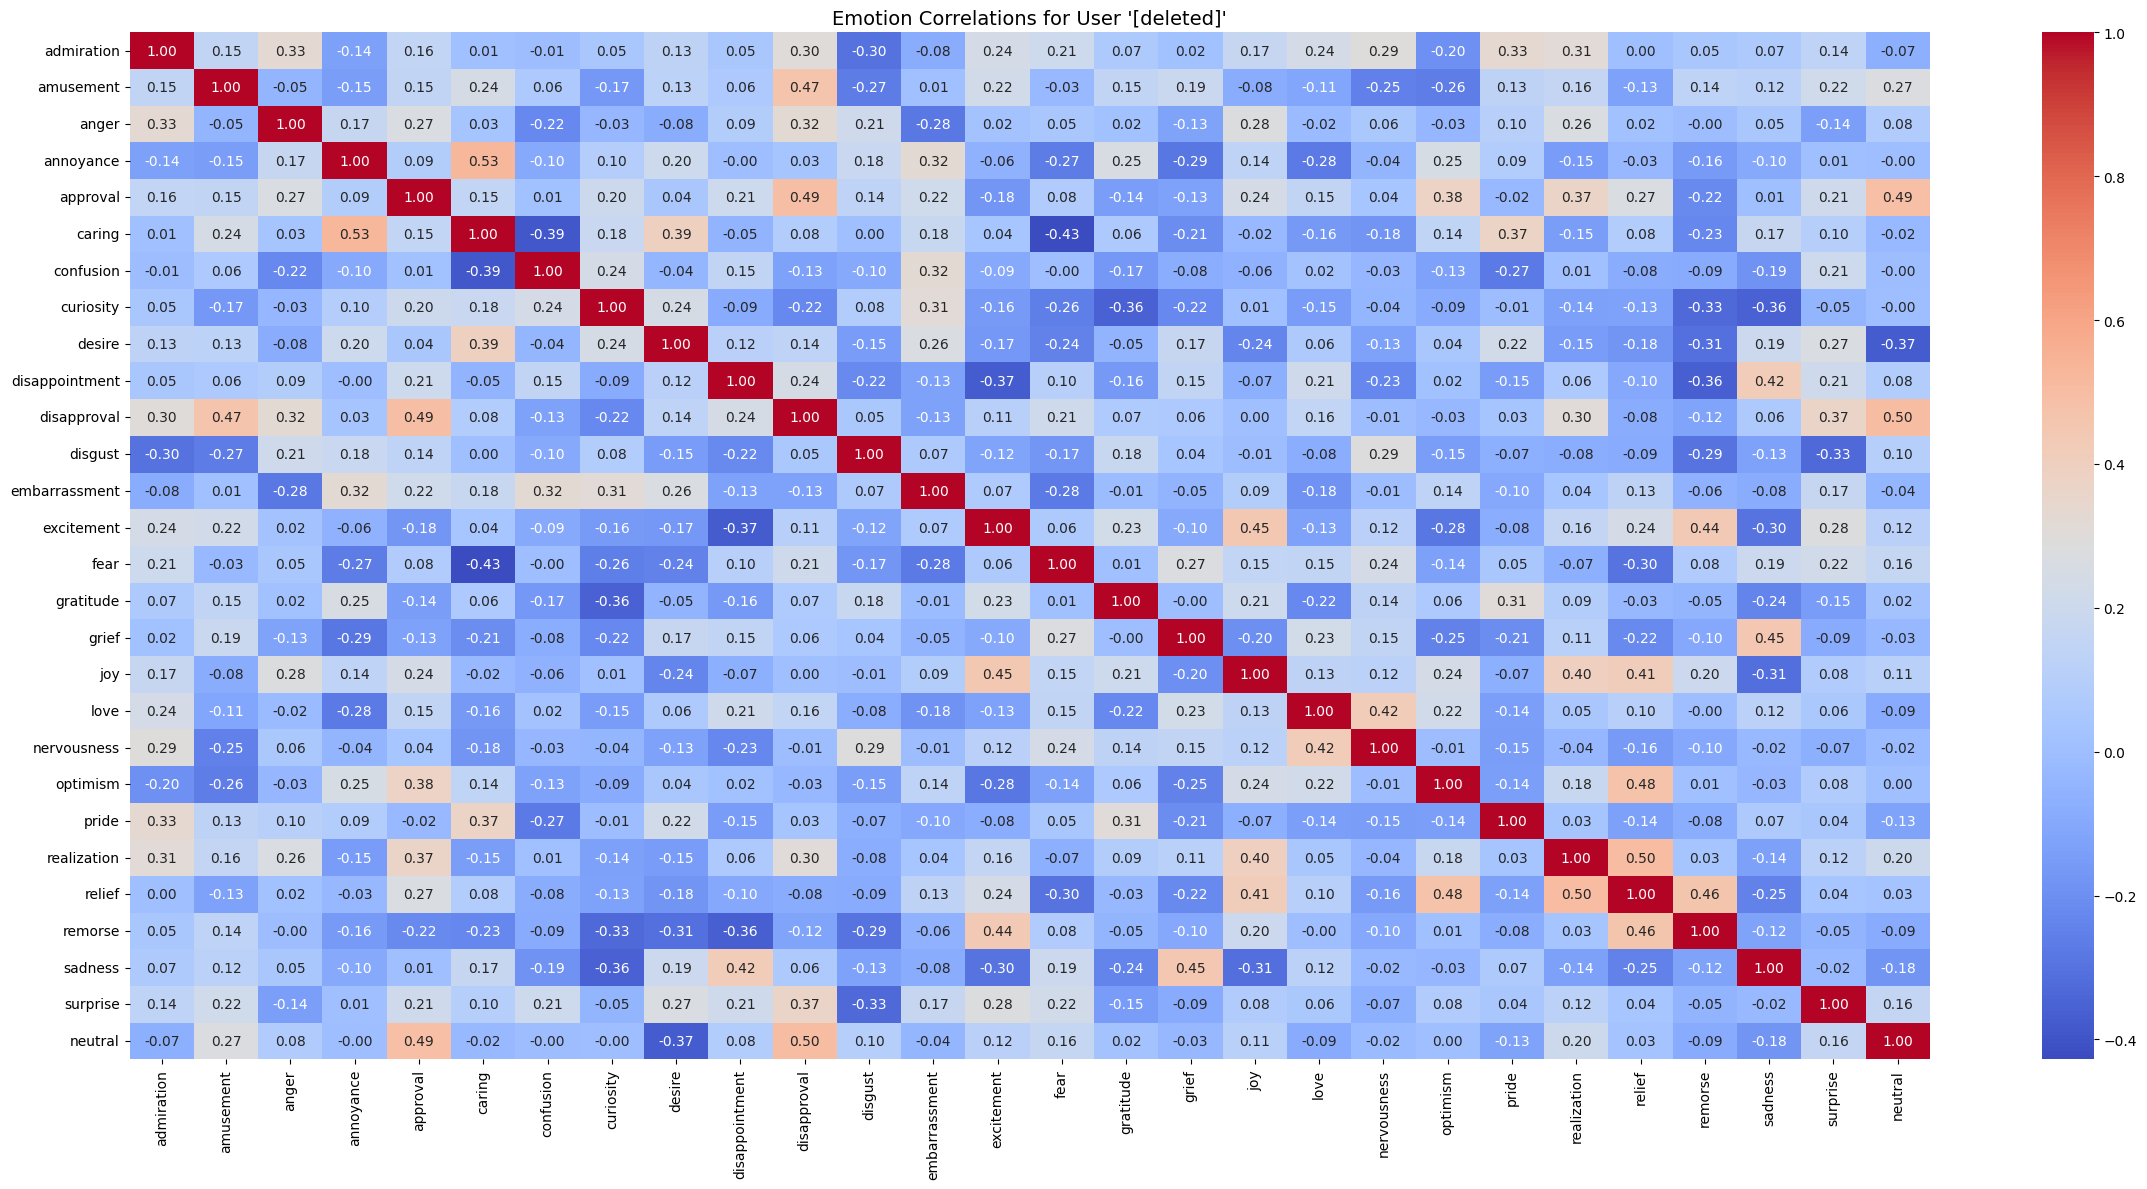

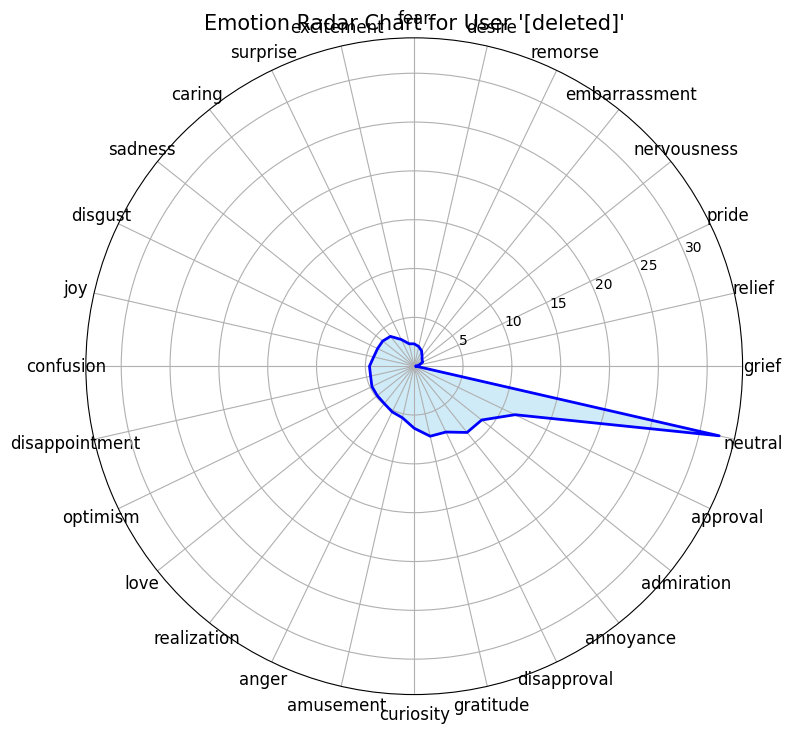

Emotion Trends:
            admiration  amusement  anger  annoyance  approval  caring  \
date                                                                    
2019-01-01           7          3     10         10        24       2   
2019-01-02          14          4      6          9         7       3   
2019-01-03          18          6      5          6        15       5   
2019-01-04          10          4      6         11        19       5   
2019-01-05          15          6      0          6         7       4   
2019-01-06           7          5      3          5         7       2   
2019-01-07          16          4     10          3        10       2   
2019-01-08           7         10      2         11        14       9   
2019-01-09           2          2      4         12         9       3   
2019-01-10          11         13      6          8        20       4   
2019-01-11          10          9      3          6         9       6   
2019-01-12           6          4  

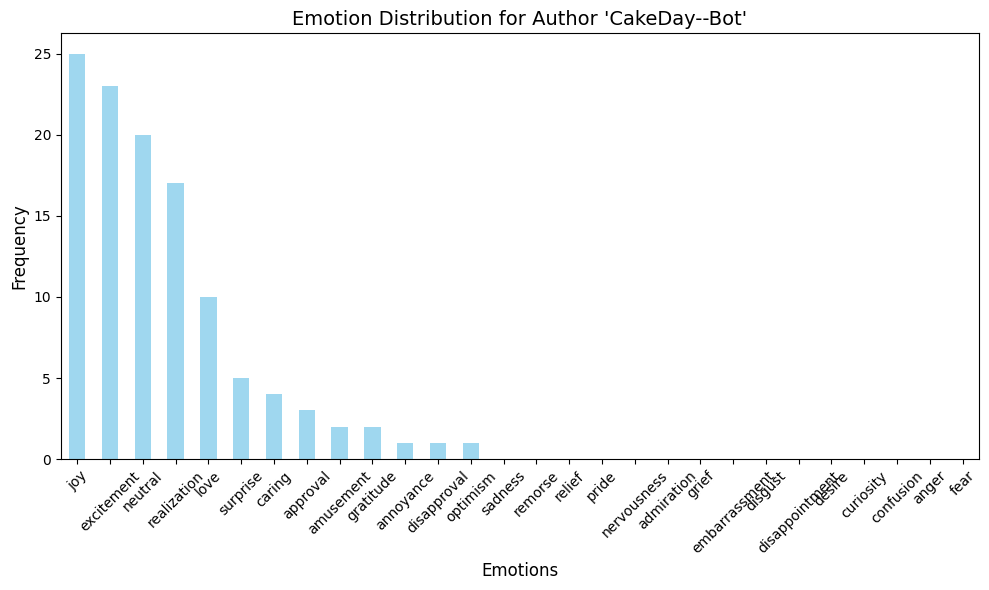

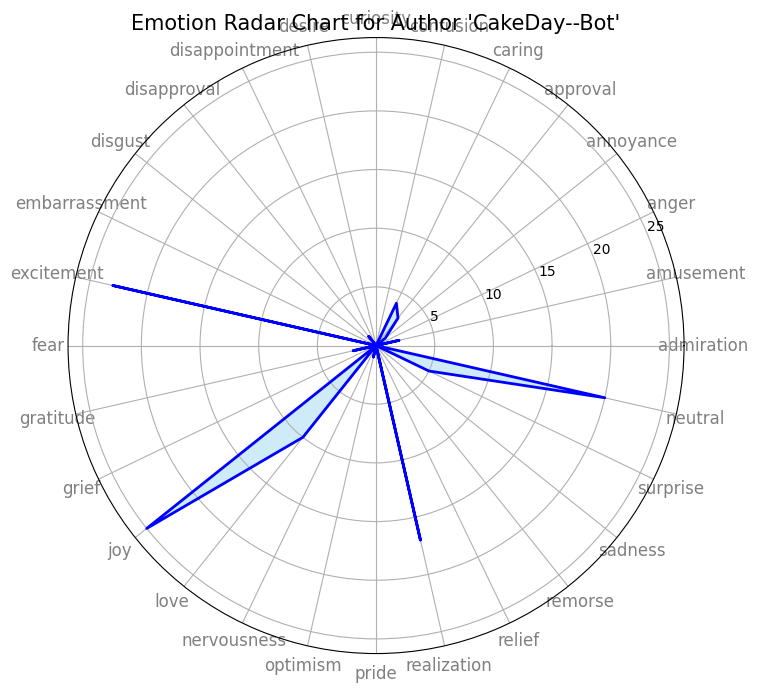


Analysis completed successfully.

Top emotions for 'CakeDay--Bot':
joy            25
excitement     23
neutral        20
realization    17
love           10
Name: CakeDay--Bot, dtype: int64
Emotion distribution for author CakeDay--Bot: {'admiration': 0, 'amusement': 2, 'anger': 0, 'annoyance': 1, 'approval': 3, 'caring': 4, 'confusion': 0, 'curiosity': 0, 'desire': 0, 'disappointment': 0, 'disapproval': 1, 'disgust': 0, 'embarrassment': 0, 'excitement': 23, 'fear': 0, 'gratitude': 2, 'grief': 0, 'joy': 25, 'love': 10, 'nervousness': 0, 'optimism': 1, 'pride': 0, 'realization': 17, 'relief': 0, 'remorse': 0, 'sadness': 0, 'surprise': 5, 'neutral': 20}
Authors with Joy emotion: ['YROK1986', 'W8nd3rW8man', 'bombay2beijing', 'Percivalsmithers', 'Cleverusername531', 'dualme', 'harveysteeze', 'ProfessorPlans', 'SKZCartoons', 'Aaroneus89', 'kyletschirhart', 'DizzleMcblizzle', 'RagingOrangutan', 'Coloradopineapple', 'Instantcurry', 'Decapatron', 'RumpelstiltskinIX', 'Blue_flea', 'Late_Goodbye

In [11]:
class AuthorEmotionAnalysis:
    def __init__(self, dataframe):
        """
        Initializes the AuthorEmotionAnalysis class.

        Parameters:
        dataframe (pd.DataFrame): The dataframe containing the dataset.
        """
        self.df = dataframe.copy()
        self.df['created_utc'] = pd.to_datetime(self.df['created_utc'], errors='coerce')

        # Extracting emotion columns (assuming they start from column index 9)
        self.emotion_columns = self.df.columns[9:]
        self.author_emotions = self.df.groupby('author', as_index=True)[self.emotion_columns].sum()

        self.overall_emotions_avg = self.author_emotions[self.emotion_columns].mean()

    def get_authors(self):
        author_counts = self.df['author'].value_counts()
        return author_counts




    def get_emotion_distribution_for_author(self, author_id):
        """
        Returns the distribution of emotions for a specific author.

        Parameters:
        author_id (str): The ID of the author (e.g., username).

        Returns:
        dict: A dictionary with emotion names as keys and their counts as values.
        """
        # Filter the dataframe to get rows where the author_id matches
        author_data = self.df[self.df['author'] == author_id]

        # Sum up the emotions for this author
        emotion_distribution = author_data[self.emotion_columns].sum(axis=0)

        return emotion_distribution.to_dict()


    def get_authors_with_emotion(self, emotion):
        """
        Returns the authors who have a specific emotion.

        Parameters:
        emotion (str): The emotion to filter by (e.g., 'joy').

        Returns:
        list: A list of authors (author_ids) who have the specified emotion.
        """
        # Check if the emotion exists in the columns
        if emotion not in self.emotion_columns:
            raise ValueError(f"Emotion '{emotion}' not found in the dataframe.")

        # Filter authors who have the emotion (value > 0)
        authors_with_emotion = self.df[self.df[emotion] > 0]['author'].unique()

        return authors_with_emotion.tolist()



    def get_average_emotion_for_author(self, author_id):
        """
        Returns the average emotion score for a specific author.

        Parameters:
        author_id (str): The ID of the author (e.g., username).

        Returns:
        dict: A dictionary with emotion names as keys and their average scores as values.
        """
        # Filter the dataframe to get rows where the author_id matches
        author_data = self.df[self.df['author'] == author_id]

        # Calculate the average score for each emotion
        average_emotion = author_data[self.emotion_columns].mean(axis=0)

        return average_emotion.to_dict()

    def get_emotion_correlation_for_author(self, author_id):
        """
        Returns the correlation matrix for the emotions of a specific author.

        Parameters:
        author_id (str): The ID of the author (e.g., username).

        Returns:
        pd.DataFrame: A correlation matrix of emotions for the specified author.
        """
        # Filter the dataframe to get rows where the author_id matches
        author_data = self.df[self.df['author'] == author_id]

        # Calculate the correlation between emotions for this author
        emotion_correlation = author_data[self.emotion_columns].corr()

        return emotion_correlation

    def get_total_emotions_and_appearances(self, author_name):
        """Calculate total emotions and appearances for the author."""
        # Check if the author exists
        if author_name not in self.author_emotions.index:
            print(f"Author '{author_name}' not found.")
            return None, None

        # Get the author's data
        author_data = self.author_emotions.loc[author_name]

        # If the author's data is empty or contains only null values
        if author_data.isnull().all():
            print(f"No emotion data available for author '{author_name}'.")
            return None, None

        # Calculate total emotions
        total_emotions = author_data[self.emotion_columns].sum()

        # Calculate the number of appearances for the author
        appearances = self.df[self.df['author'] == author_name].shape[0]

        return total_emotions, appearances

    def get_exceeding_emotions(self, author_data):
        """Identify emotions exceeding the overall average."""
        exceeding_emotions = author_data[author_data > self.overall_emotions_avg]
        return exceeding_emotions

    def calculate_author_percentage(self, author_data):
        """Calculate the percentage contribution of the author to the total emotions."""
        total_emotions_all_authors = self.author_emotions.sum().sum()
        author_total_emotions = author_data.sum()
        percentage = (author_total_emotions / total_emotions_all_authors) * 100
        return percentage

    def plot_emotion_distribution(self, author_data, author_name):
        """Plot a bar chart of the author's emotions."""
        sorted_emotions = author_data.sort_values(ascending=False)
        plt.figure(figsize=(10, 6))
        sorted_emotions.plot(kind='bar', color='skyblue', alpha=0.8)
        plt.title(f"Emotion Distribution for Author '{author_name}'", fontsize=14)
        plt.xlabel("Emotions", fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def plot_emotion_radar_chart(self, author_data, author_name):
        """Plot a radar chart of the author's emotions."""
        categories = author_data.index
        values = author_data.values
        N = len(categories)

        angles = [n / float(N) * 2 * pi for n in range(N)]
        values = np.append(values, values[0])
        angles += angles[:1]

        plt.figure(figsize=(8, 8))
        ax = plt.subplot(111, polar=True)
        plt.xticks(angles[:-1], categories, color='grey', size=12)
        ax.plot(angles, values, linewidth=2, linestyle='solid', color='blue')
        ax.fill(angles, values, color='skyblue', alpha=0.4)
        plt.title(f"Emotion Radar Chart for Author '{author_name}'", size=15)
        plt.show()

    def display_author_emotion_summary(self, author_name, total_emotions, appearance_count, exceeding_emotions, author_percentage):
        """Display a summary of the author's emotions."""
        print(f"Total emotions for author '{author_name}': {total_emotions}")
        print(f"Author '{author_name}' appears {appearance_count} times in the dataset.")
        print(f"Number of emotions exceeding the overall average: {len(exceeding_emotions)}")

        if not exceeding_emotions.empty:
            print("\nEmotions exceeding the overall average:")
            for emotion, value in exceeding_emotions.items():
                print(f"  {emotion}: {value}")
        else:
            print("\nNo emotions exceed the overall average.")

        print(f"\nAuthor '{author_name}' contributes {author_percentage:.2f}% to the total emotions in the dataset.")


    def analyze_author1(self, author_name):
        """Main function to analyze author emotions."""
        # print(self.author_emotions.loc[self.author_emotions.index == author_name])
        if author_name in self.author_emotions.index.tolist():
            author_data = self.author_emotions.loc[author_name]

            # Step 1: Total emotions and appearances
            total_emotions, appearance_count = self.get_total_emotions_and_appearances(author_name)

            # Step 2: Exceeding emotions
            exceeding_emotions = self.get_exceeding_emotions(author_data)

            # Step 3: Author percentage contribution
            author_percentage = self.calculate_author_percentage(author_data)

            # Step 4: Display summary
            self.display_author_emotion_summary(author_name, total_emotions, appearance_count, exceeding_emotions, author_percentage)

            # Step 5: Plot distributions
            self.plot_emotion_distribution(author_data, author_name)
            self.plot_emotion_radar_chart(author_data, author_name)

            return author_data.sort_values(ascending=False)
        else:
            return f"Author '{author_name}' not found in the data."

    def analyze_user_emotions(self, target_user):
        """Calculate and plot various metrics for a user's emotions."""
        combined_df = self.df.copy()  # Assuming this is your main dataframe with user and date columns
        combined_df['date'] = combined_df['created_utc'].dt.date  # Assuming 'created_utc' is a datetime column
        user_emotions1 = combined_df.groupby(['author', 'date'])[self.emotion_columns].sum()

        # Aggregating emotions by date for trend analysis
        user_data = user_emotions1.loc[target_user]
        user_data_by_date = user_data.groupby('date')[self.emotion_columns].sum()

        # 1. Plotting emotion trends over time
        plt.figure(figsize=(12, 6))
        for emotion in self.emotion_columns:
            plt.plot(user_data_by_date.index, user_data_by_date[emotion], label=emotion)

        plt.title(f"Emotion Trends Over Time for User '{target_user}'", fontsize=14)
        plt.xlabel("Date", fontsize=12)
        plt.ylabel("Emotion Count", fontsize=12)
        plt.legend(title="Emotions", fontsize=10)
        plt.grid(alpha=0.4)
        plt.tight_layout()
        plt.show()

        # 2. Comparing the user's emotions to other users
        overall_avg = self.author_emotions[self.emotion_columns].mean()
        user_avg = user_data[self.emotion_columns].mean()
        comparison = pd.DataFrame({'Overall Average': overall_avg, f"{target_user} Average": user_avg})

        # Bar chart for comparison
        comparison.plot(kind='bar', figsize=(10, 6), color=['gray', 'skyblue'], alpha=0.8)
        plt.title(f"Comparison of {target_user}'s Average Emotions vs Overall", fontsize=14)
        plt.xlabel("Emotions", fontsize=12)
        plt.ylabel("Average Count", fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(alpha=0.4)
        plt.tight_layout()
        plt.show()

        # 3. Emotion intensity metric (average per interaction)
        user_interactions = len(user_data)
        intensity_metric = user_data[self.emotion_columns].sum().sum() / user_interactions
        print(f"Emotion Intensity Metric for {target_user}: {intensity_metric:.2f}")

        # 4. Correlation between emotions for the user
        correlation_matrix = user_data[self.emotion_columns].corr()

        # Heatmap for correlations
        plt.figure(figsize=(24, 12))
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
        plt.title(f"Emotion Correlations for User '{target_user}'", fontsize=14)
        plt.tight_layout()
        plt.show()

        # 5. Radar chart for user emotion distribution
        user_avg_sorted = user_avg.sort_values()
        categories = user_avg_sorted.index.tolist()
        values = user_avg_sorted.values.tolist()
        values += values[:1]
        angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
        angles += angles[:1]

        plt.figure(figsize=(8, 8))
        ax = plt.subplot(111, polar=True)
        plt.xticks(angles[:-1], categories, color='black', fontsize=12)
        ax.plot(angles, values, linewidth=2, linestyle='solid', color='blue')
        ax.fill(angles, values, color='skyblue', alpha=0.4)
        plt.title(f"Emotion Radar Chart for User '{target_user}'", size=15)
        plt.tight_layout()
        plt.show()

        return {
            'emotion_trends': user_data_by_date,
            'comparison': comparison,
            'intensity_metric': intensity_metric,
            'correlation_matrix': correlation_matrix,
            'user_avg': user_avg
        }

    def count_raters_above_emotion_threshold(self, emotions=None, percent=50):
        """Count the raters who have emotion percentage above the threshold.
        Accepts a list of emotions or a single emotion."""

        # If emotions are provided, validate if they exist in the columns
        if emotions:
            if isinstance(emotions, str):  # If a single emotion is provided
                emotions = [emotions]
            # Check if all provided emotions exist in the columns
            for emotion in emotions:
                if emotion not in self.author_emotions.columns:
                    return f"Emotion '{emotion}' not found in the data."

        total_tags_per_rater = self.author_emotions.sum(axis=1)

        result = {}

        if emotions:
            # If specific emotions are provided, process each one
            for emotion in emotions:
                # Calculate emotion percentage per rater
                emotion_percent_per_rater = (self.author_emotions[emotion] / total_tags_per_rater) * 100
                raters_above_threshold = emotion_percent_per_rater[emotion_percent_per_rater >= percent]
                result[emotion] = {
                    "raters_above_threshold": list(raters_above_threshold.index),
                    "count": len(raters_above_threshold)
                }
        else:
            # If no specific emotions are provided, analyze for all emotions
            for emotion in self.author_emotions.columns:
                # Calculate emotion percentage per rater
                emotion_percent_per_rater = (self.author_emotions[emotion] / total_tags_per_rater) * 100
                raters_above_threshold = emotion_percent_per_rater[emotion_percent_per_rater >= percent]
                result[emotion] = {
                    "raters_above_threshold": list(raters_above_threshold.index),
                    "count": len(raters_above_threshold)
                }

        return result
    def plot_emotion_percentages(self):
        """Plot the percentage of users tagging each emotion."""
        total_users = len(self.author_emotions)
        emotion_percentages = (self.author_emotions.astype(bool).sum(axis=0) / total_users) * 100

        # Sort emotions by percentage in descending order
        sorted_emotions = emotion_percentages.sort_values(ascending=False)

        # Create a bar plot for emotion percentages
        plt.figure(figsize=(10, 6))
        sorted_emotions.plot(kind='bar', color='skyblue', alpha=0.8)
        plt.title("Percentage of Users Tagging Each Emotion", fontsize=14)
        plt.xlabel("Emotions", fontsize=12)
        plt.ylabel("Percentage of Users (%)", fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(alpha=0.4)
        plt.tight_layout()
        plt.show()

    def plot_emotions_by_thresholds(self, thresholds=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100], emotions=None):
        """Plot emotions by the number of raters above each threshold."""
        if emotions is None:
            emotions = self.author_emotions.columns  # Use all emotions if no specific emotions are provided

        emotion_threshold_data = []

        for emotion in emotions:
            emotion_counts = []
            print(emotion)
            for threshold in thresholds:
                print(emotion,threshold)
                result = self.count_raters_above_emotion_threshold(emotions=emotion, percent=threshold)
                print(result[emotion]['count'])
                emotion_counts.append(result[emotion]['count'])

            emotion_threshold_data.append(emotion_counts)

            # Creating bar graph for each emotion
            fig, ax = plt.subplots(figsize=(10, 6))

            ax.bar(thresholds, emotion_counts, width=8, color='skyblue')
            ax.set_title(f"Number of Raters Above {emotion} Emotion Thresholds", fontsize=14)
            ax.set_xlabel("Threshold (%)", fontsize=12)
            ax.set_ylabel("Number of Raters", fontsize=12)
            ax.set_xticks(thresholds)
            ax.set_xticklabels(thresholds)
            ax.grid(True, alpha=0.4)
            plt.tight_layout()
            plt.show()

        emotion_threshold_matrix = pd.DataFrame(emotion_threshold_data, columns=thresholds, index=emotions)

        return emotion_threshold_matrix

    def get_responses_by_user(self, selected_user):
        """Return the rows where the specified user has responded."""
        responded_to_user = self.df[self.df['author'] == selected_user]
        return responded_to_user

    def count_reactions_and_responses(self, selected_user):
        """Count the reactions and responses to the selected user, and extract emotions."""
        # Filter for posts made by the selected user
        responded_to_user = self.df[self.df['author'] == selected_user]
        num_responses = responded_to_user.shape[0]  # Number of posts by the selected user

        # Filter for comments made by others in response to the selected user
        user_responses = self.df[self.df['parent_id'].isin(responded_to_user['link_id'])]
        num_reactions = user_responses.shape[0]  # Number of comments received by the selected user

        # Extracting the authors of the responses (those who commented on the selected user)
        responding_authors = user_responses['author'].unique().tolist()

        # Extracting the posts that the selected user has commented on, ensuring no duplicates
        commented_posts = self.df[
            self.df['parent_id'].isin(user_responses['link_id'])].drop_duplicates(subset='link_id')
        commented_posts_data = []
        for _, row in commented_posts.iterrows():
            emotions = row[self.emotion_columns].to_dict()  # Get emotions for each commented post

            # Filter emotions with value 1
            emotions_with_1 = {emotion: value for emotion, value in emotions.items() if value == 1}

            # Store only emotions with value 1 for the commented post
            commented_data = {
                'commented_post_id': row['link_id'],
                'commenter': row['author'],
                'emotions': emotions_with_1  # Store emotions with value 1
            }
            commented_posts_data.append(commented_data)

        # Adding emotions for each response to the selected user
        responses_with_emotions = []
        for _, row in user_responses.iterrows():
            emotions = row[self.emotion_columns].to_dict()  # Get emotions for each response

            # Filter emotions with value 1
            emotions_with_1 = {emotion: value for emotion, value in emotions.items() if value == 1}

            # Store only emotions with value 1 for the response
            response_data = {
                'response_id': row['link_id'],
                'responder': row['author'],
                'emotions': emotions_with_1  # Store emotions with value 1
            }
            responses_with_emotions.append(response_data)

        return {
            'user': selected_user,
            'num_responses': num_responses,
            'num_reactions': num_reactions,
            'responding_authors': responding_authors,
            'responses_with_emotions': responses_with_emotions,
            'commented_posts_data': commented_posts_data  # List of posts the selected user commented on
        }


def main():
    # Load the dataframe (replace with actual method to load data)
    data_path = 'data/full_dataset/goemotions_combined.csv'
    df = pd.read_csv(data_path, encoding='utf-8')

    # Create an instance of the AuthorEmotionAnalysis class
    author_analysis = AuthorEmotionAnalysis(df)
    selected_user_reactions = author_analysis.count_reactions_and_responses("saturdeity")
    print(selected_user_reactions)
    emotion = 'joy'  # Replace with the emotion you want to analyze
    thresholds = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    emotion_threshold_matrix = author_analysis.plot_emotions_by_thresholds(thresholds=thresholds)

    # Display the matrix of emotions vs thresholds
    print(emotion_threshold_matrix)
    percent = 100  # Set your desired threshold percentage

    # Call the function to get raters above the threshold
    result = author_analysis.count_raters_above_emotion_threshold(emotions=None, percent=100)

    # Check if the result is a dictionary (it should be in your case)
    if isinstance(result, dict):
        for emotion, data in result.items():
            print(f"Number of raters tagging '{emotion}' above {percent}%: {data['count']}")
            print(f"Users: {data['raters_above_threshold']}")
    else:
        print(result)  # Handle case where result is an error message or non-dict
    # Print the result
    print(f"Raters who have more than {percent}% of  emotion:")
    print("raters_above_threshold")

    target_user = '[deleted]'  # Replace this with an actual author name from your dataset

    # Analyze emotions for the target user
    analysis_results = author_analysis.analyze_user_emotions(target_user)

    # Print out the results
    print("Emotion Trends:")
    print(analysis_results['emotion_trends'])

    print("\nComparison of User's Average Emotions vs Overall:")
    print(analysis_results['comparison'])

    print(f"\nEmotion Intensity Metric for {target_user}: {analysis_results['intensity_metric']:.2f}")

    print("\nCorrelation Matrix:")
    print(analysis_results['correlation_matrix'])

    print("\nUser's Average Emotions:")
    print(analysis_results['user_avg'])

    # author = input("Enter the name of the author to analyze: ")

    # Analyze the specified author
    author_id = 'CakeDay--Bot'
    result = author_analysis.analyze_author1(author_id)

    if isinstance(result, str):
        print(result)  # Print the error message if the author was not found.
    else:
        print("\nAnalysis completed successfully.")
        print(f"\nTop emotions for '{author_id}':")
        print(result.head())
    # Example usage:
    author_id = 'CakeDay--Bot'

    # Get emotion distribution for a specific author
    emotion_distribution = author_analysis.get_emotion_distribution_for_author(author_id)
    print(f"Emotion distribution for author {author_id}: {emotion_distribution}")

    # Get authors with a specific emotion
    authors_with_joy = author_analysis.get_authors_with_emotion('joy')
    print(f"Authors with Joy emotion: {authors_with_joy}")

    # Get average emotion score for a specific author
    average_emotion = author_analysis.get_average_emotion_for_author(author_id)
    print(f"Average emotion scores for {author_id}: {average_emotion}")

    # Get emotion correlation for a specific author
    emotion_correlation = author_analysis.get_emotion_correlation_for_author(author_id)
    print(f"Emotion correlation for {author_id}:")
    print(emotion_correlation)


# Run the main function if this script is executed
if __name__ == "__main__":
    main()
